<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🏦 Bank Customer Churn 📉
    </h1>
</div>


# 📂 Overview

* **Background** <br>
Every bank wants to hold there customers for sustaining their business. Understanding the reasons why customers leave will help banks improve retention policies and reduce costs.

* **Goal of the Project** <br>
Based on the data, we will find out what causes customers to leave and then come up with appropriate strategies to help the bank.

**Key Features**

**Target Variable** <br>
- `Exited`: *whether or not the customer left the bank.*

**General Property Characteristics** <br>
- `RowNumber`: Corresponds to the record (row) number and has no effect on the output.
- `CustomerId`: Contains random values and has no effect on customer leaving the bank.
- `Surname`: The surname of a customer has no impact on their decision to leave the bank.
- `CreditScore`: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- `Geography`: A customer’s location can affect their decision to leave the bank.
- `Gender`: It’s interesting to explore whether gender plays a role in a customer leaving the bank.
- `Age`: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- `Tenure`: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- `Balance`: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- `NumOfProducts`: Refers to the number of products that a customer has purchased through the bank.
- `HasCrCard`: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- `IsActiveMember`: Active customers are less likely to leave the bank.
- `EstimatedSalary`: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Files Provided**

* `train.csv`: The train dataset.
* `test.csv`: The test dataset (no target).
* `credit_risk_dataset.csv`: The original dataset.

Source: [Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1)

Source: [Bank Customer Churn Prediction](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction)

**Project Objective**

The primary objective of this notebook is to **EDA and build machine learning model to predict**.

Key components of the approach include:

* **Exploratory Data Analysis (EDA):** Understand feature distributions, relationships.
* **Feature Engineering:** Encode categorical variables and align schema across training and test data.
* **Modeling:** Train with some models and choise the best model for predicting.
* **Multi-Label Prediction Strategy:** Generate predictions for each test row.
* **Evaluation Framework:** <br>
  * Cross-validation.
  * Metrics: ROC-AUC

In [1]:
!pip install statsmodels > pip_log_statsmodels.txt 2>&1
!pip install scikit_posthocs > pip_log_scikit_posthocs.txt 2>&1

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [2]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import (roc_curve, roc_auc_score, classification_report, confusion_matrix,
                             precision_recall_curve, auc)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>

In [2]:
# Load the datasets
# df_train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
df_original = pd.read_csv("Churn_Modelling.csv")
# df_test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")

# Verify shapes
# print("Train Data Shape:", df_train.shape)
print("\nOrigin Data Shape:", df_original.shape)
# print("\nTest Data Shape:", df_test.shape)

NameError: name 'pd' is not defined

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>

In [4]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nOrigin Data Preview:")
display(df_origin.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0


Origin Data Preview:


RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0


Test Data Preview:


id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [5]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nOrigin Data Info:")
df_origin.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB

Origin Data Info:
<class 'pandas.core.frame.DataFrame'>


## Insights from Initial Data Exploration

**Dataset Size and Structure**
   - The **training dataset** contains 165034 samples with 14 columns, including the target variable `Exited`.
   - The **original dataset** has 10002 samples and 14 columns, similar in structure but smaller in size. 
   - The **test dataset** includes 110023 samples with 13 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `CreditScore`, `Age`, `Tenure`, `Balance`, `EstimatedSalary`, `Points Earned`.
     - **Categorical features:** `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`, `Complain`, `Card Type`, `Satisfaction Score`, `NumOfProducts`.
   - The target variable is **int64** value but we need to convert to **int8** to save memory usage.

**Data Completeness**  
   - The dataset have **no missing values** on train and test datasets but the missing value was detected on the origin dataset. We need to handle it.
   - Data types are appropriate: numerical features is float64 and int64, and categorical features are objects (strings).
   - The columns `Surname`, `RowNumber`, `CustomerId`, `id` are not meaningful for analysis. So these columns are not really a part of the information we should care about. We can drop them.

In [6]:
# Drop columns Surname, id and CustomerId
df_train.drop(columns="Surname", axis=1, inplace=True)
df_train.set_index(df_train.id, inplace=True)
df_train.drop(columns="id", axis=1, inplace=True)
df_train.drop(columns="CustomerId", axis=1, inplace=True)

df_origin.drop(columns="Surname", axis=1, inplace=True)
df_origin.set_index(df_origin.RowNumber, inplace=True)
df_origin.drop(columns="RowNumber", axis=1, inplace=True)
df_origin.drop(columns="CustomerId", axis=1, inplace=True)

df_test.drop(columns="Surname", axis=1, inplace=True)
df_test.set_index(df_test.id, inplace=True)
df_test.drop(columns="id", axis=1, inplace=True)
df_test.drop(columns="CustomerId", axis=1, inplace=True)

# Remove space in name columns
df_train.columns = (
    df_train.columns
    .str.strip()
    .str.replace(" ", "")
)

df_origin.columns = (
    df_origin.columns
    .str.strip()
    .str.replace(" ", "")
)

df_test.columns = (
    df_test.columns
    .str.strip()
    .str.replace(" ", "")
)

In [7]:
print("Data describe:")
cm = sns.light_palette("green", as_cmap=True)
display(df_train.drop(columns=["Geography", "Gender", "HasCrCard", "IsActiveMember", "NumOfProducts", "Exited"], axis=1).describe().T.style.background_gradient(cmap=cm))
display(df_origin.drop(columns=["Geography", "Gender", "HasCrCard", "IsActiveMember", "NumOfProducts", "Exited"], axis=1).describe().T.style.background_gradient(cmap=cm))
display(df_test.drop(columns=["Geography", "Gender", "HasCrCard", "IsActiveMember", "NumOfProducts"], axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


## Descriptive Insights from Dataset Statistics

**Feature Highlights**

* **CreditScore**: Mean \~650 (original data) or \~656 (train and test data), range 350–850 → covers both poor and excellent credit levels; high standard deviation indicates considerable dispersion.
* **Age**: Mean \~38 years, primarily concentrated in the working-age group (25% = 32 years, 75% = 42 or 44 years).
* **Tenure**: Average of 5 years, evenly distributed from 0–10 years → reflects diverse customer loyalty levels.
* **Balance**: High mean (\$55k/$76k) but large standard deviation (~\$62k); 25% of customers have a balance of \$0 → possibly low usage or fully withdrawn accounts.
* **EstimatedSalary**: Mean ~\$100k (original data) or ~\$113k (train and test data), wide range (\$11.58 – \$199,992), median close to mean → relatively uniform distribution.

**Overall Observations**

* The three datasets (train, test, origin) have **very similar distributions** in statistical measures (mean, median, min, max, percentiles).
* Several features (`Balance`, `EstimatedSalary`, `CreditScore`) show high dispersion → further analysis is needed to check for skewness and outliers.
* Customers are mostly within the working-age demographic, with an average tenure of 5 years, and exhibit diverse financial behaviors and engagement levels.

In [8]:
cat_features = ["Geography", "Gender"]
def convert_cat(df, cat_features= cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass

convert_cat(df=df_train)
convert_cat(df=df_origin)
convert_cat(df=df_test)

In [9]:
df_origin.dropna(inplace=True)

In [10]:
def cast_features(dfs, dtype_map):
    """
    Cast multiple features in multiple DataFrames to specific dtypes.

    Args:
        dfs (list): List of DataFrames to process.
        dtype_map (dict): {column_name: target_dtype} mapping.
    """
    for df in dfs:
        for col, dtype in dtype_map.items():
            if col in df.columns:
                df[col] = df[col].astype(dtype)

# Mapping of columns and their target data types
dtype_map = {
    "CreditScore": "int16",
    "Age": "int8",
    "Tenure": "int8",
    "Balance": "float32",
    "Exited": "int8",
    "EstimatedSalary": "float32",
    "HasCrCard": "int8",
    "IsActiveMember": "int8",
    "NumOfProducts": "int8"
}

# Apply the function to both df_train and df_test
cast_features([df_train, df_test, df_origin], dtype_map)

In [11]:
category_cols = ["HasCrCard", "IsActiveMember", "NumOfProducts"]
df_train[category_cols] = df_train[category_cols].astype("category")
df_origin[category_cols] = df_origin[category_cols].astype("category")
df_test[category_cols] = df_test[category_cols].astype("category")
print("Train Data describe:")
display(df_train.drop(columns="Exited", axis=1).describe(include=["category", "object"]).T)

print("\nOrigin Data describe:")
display(df_origin.drop(columns="Exited", axis=1).describe(include=["category", "object"]).T)

print("\nTest Data describe:")
display(df_test.describe(include=["category", "object"]).T)

Train Data describe:


count unique     top    freq
Geography       165034      3  France   94215
Gender          165034      2    Male   93150
NumOfProducts   165034      4       2   84291
HasCrCard       165034      2       1  124428
IsActiveMember  165034      2       0   82885


Origin Data describe:


count unique     top  freq
Geography       9998      3  France  5012
Gender          9998      2    Male  5455
NumOfProducts   9998      4       1  5083
HasCrCard       9998      2       1  7054
IsActiveMember  9998      2       1  5147


Test Data describe:


count unique     top   freq
Geography       110023      3  France  63171
Gender          110023      2    Male  61942
NumOfProducts   110023      4       2  56338
HasCrCard       110023      2       1  82852
IsActiveMember  110023      2       0  55536

## **Descriptive Insights for Categorical Features**

**1. Geography**

* Contains 3 countries: **France**, **Spain**, and **Germany**.
* **France** has the highest proportion in all three datasets (\~50–57%), indicating an **uneven distribution** across countries.
* Spain and Germany make up the remaining portion with noticeably smaller shares.

**2. Gender**

* Only 2 values: **Male** and **Female**.
* **Male** accounts for a slightly higher proportion (\~55%) compared to Female (\~45%) across all datasets → relatively balanced distribution, not heavily skewed.

**3. NumOfProducts**

* Four levels (1–4), with **2 products** being the most common (\~50% of customers).
* Levels 3 and 4 have very small proportions → can be grouped during analysis or modeling.

**4. HasCrCard**

* Two values: **1 (has a credit card)** and **0 (does not)**.
* Customers with a credit card (**1**) make up the majority (\~70–72%) across all datasets.

**5. IsActiveMember**

* Two values: **1 (active)** and **0 (inactive)**.
* Fairly balanced distribution: around 50–51% active and 49–50% inactive.

**Overall Observations**

* The distribution patterns of categorical variables are **almost identical** between the Train, Origin, and Test datasets → indicating consistent data with no distribution shift between training and testing sets.
* Some features have **uneven distributions** (e.g., Geography and NumOfProducts).
* Binary variables like HasCrCard and IsActiveMember have clear distributions and can be easily utilized in analysis or modeling.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Handling Missing Value

In [12]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")


In [13]:
print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value Origin dataset: ")
displayNULL(df_origin, dataset_name="Origin Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 165,034 rows.

Missing value Origin dataset: 
🔎 Missing Value Summary for: Origin Set
✅ No missing values detected in 9,998 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 110,023 rows.


## Checking duplicate Value

In [14]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Origin Data":  df_origin,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
⚠️  123 duplicates found (0.07%)
    Total rows affected: 123/165,034

🔍 Origin Data Duplicate Analysis
⚠️  2 duplicates found (0.02%)
    Total rows affected: 2/9,998

🔍 Test Data Duplicate Analysis
⚠️  72 duplicates found (0.07%)
    Total rows affected: 72/110,023



In [15]:
# Drop duplicate
for df in [df_train, df_origin]:
    df.drop_duplicates(inplace=True)

for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 164,911 rows

🔍 Origin Data Duplicate Analysis
✅ No duplicates found in 9,996 rows

🔍 Test Data Duplicate Analysis
⚠️  72 duplicates found (0.07%)
    Total rows affected: 72/110,023



Kaggle requires the submission file to have the exact same number of rows as the original `test.csv` file (in this case, **110,023 rows**).

If we remove duplicates in the test set → the number of rows will decrease → Kaggle will return an error upon submission.

Therefore:

* **Train set** and **Origin set** → We need to remove duplicates.
* **Test set** → Must keep duplicates to ensure the row count matches the original for submission.

## Checking Outlier Value

In [16]:
num_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
cat_features = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "NumOfProducts"]

In [17]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


Feature  Outlier Count
0  CreditScore            252
1          Age           6382

In [18]:
checking_outlier(list_feature=num_features, df=df_origin, dataset_name="Origin data")

🔍 Origin data Checking outlier


Feature  Outlier Count
0  CreditScore             16
1          Age            359

In [19]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


Feature  Outlier Count
0  CreditScore            176
1          Age           4246

#### Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train**, **test**, and **original** datasets.
* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We performed a check for exact duplicate rows that could artificially inflate performance or introduce bias.

* **Training Data**:

  * **123 duplicate rows** found in 165,034 records.

* **Original Data**:

  * **2 duplicate rows** found in 9998 records.

* **Test Data**:

  * **72 duplicates** detected in 110,023 records
 
**Outlier Analysis**

* We also examined the datasets for checking outliers.
* **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train**, **origin** and **test** datasets contain **notable outliers** in `CreditScore`, `Age`.

**Conclusion**

* The **synthetic training** and **test datasets** exhibit excellent data quality with **no missing**.
* The duplicate record exist across the **train**, **test**, and **original** datasets.
* The outlier value exist across the **train**, **test**, and **original** datasets.
* Overall, data readiness is high and preprocessing complexity is minimal.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [20]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [21]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

## Exited Distribution

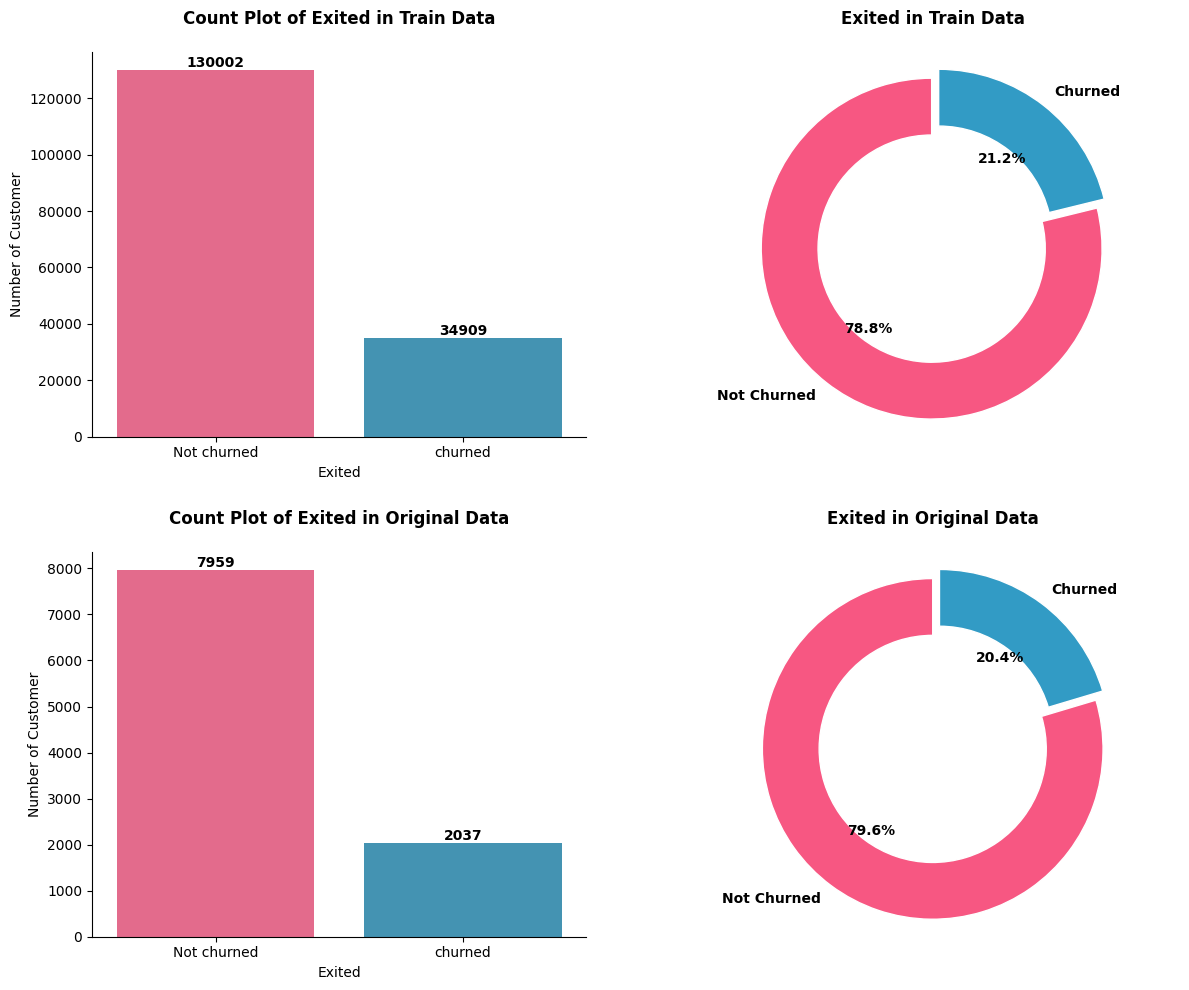

In [22]:
# Set target variable
target_variable = "Exited"

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
datasets = [("Train Data", df_train), ("Original Data", df_origin)]

for i, (title, data) in enumerate(datasets):
    ax = axes[i, 0]
    sns.countplot(x=target_variable, data=data, ax=ax, palette=color(n_colors=2))
    ax.set_title(f"Count Plot of Exited in {title}", pad=20, weight="bold")
    ax.set_ylabel("Number of Customer")
    ax.set_xlabel("Exited")
    ax.set_xticks([0, 1], ["Not churned", "churned"])

    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

    for container in ax.containers:
        ax.bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")

    loan_counts = data[target_variable].value_counts().sort_index()
    wedges, texts, autotexts = axes[i, 1].pie(
        loan_counts,
        labels = ["Not Churned", "Churned"],
        autopct="%1.1f%%",
        startangle=90,
        colors=color(n_colors=2),
        wedgeprops=dict(width=0.4, edgecolor="w"),
        radius=1.2,
        explode = (0, 0.08)
    )
    
    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight("bold")
    
    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    axes[i, 1].add_artist(centre_circle)
    axes[i, 1].set_title(f"Exited in {title}", pad=20, weight="bold")
    axes[i, 1].axis("equal") 

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

### **Distribution Analysis of Customer Churn**

**1. Overview of Class Distribution**

The visualizations compare the distribution of the target variable `Exited` (Customer Churn) across **Training Data** and **Original Data** using:

* **Count plots** showing absolute customer counts.
* **Donut charts** displaying percentage proportions.

**A. Training Data**

**Count Statistics**

* `Not Churned`: **130,002 customers**
* `Churned`: **34,909 customers**

**Percentage Distribution**

* `Not Churned`: **78.8%**
* `Churned`: **21.2%**

> **Insight**:
> The training dataset is **imbalanced**, with non-churned customers forming the majority. Roughly **1 in 5** customers have churned.

**B. Original Data**

**Count Statistics**

* `Not Churned`: **7,959 customers**
* `Churned`: **2,037 customers**

**Percentage Distribution**

* `Not Churned`: **79.6%**
* `Churned`: **20.4%**

> **Insight**:
> The original dataset shows a **similar churn ratio** to the training dataset, with around **1 in 5** customers having churned.

**2. Key Observations & Implications**

| Aspect                   | Training Data       | Original Data       | Observation                                                 |
| ------------------------ | ------------------- | ------------------- | ----------------------------------------------------------- |
| Majority Class           | Not Churned (78.8%) | Not Churned (79.6%) | Both datasets are skewed toward the “Not Churned” class     |
| Minority Class           | Churned (21.2%)     | Churned (20.4%)     | Minority class is consistent across datasets                |
| Class Imbalance Severity | Moderate            | Moderate            | Class proportions are quite similar                         |
| Risk of Bias             | Yes                 | Yes                 | Models may overpredict the majority class without balancing |

**Conclusion**

Both datasets display **moderate class imbalance**, with churned customers consistently around 20% of the population.

## Numerical Feature Distributions

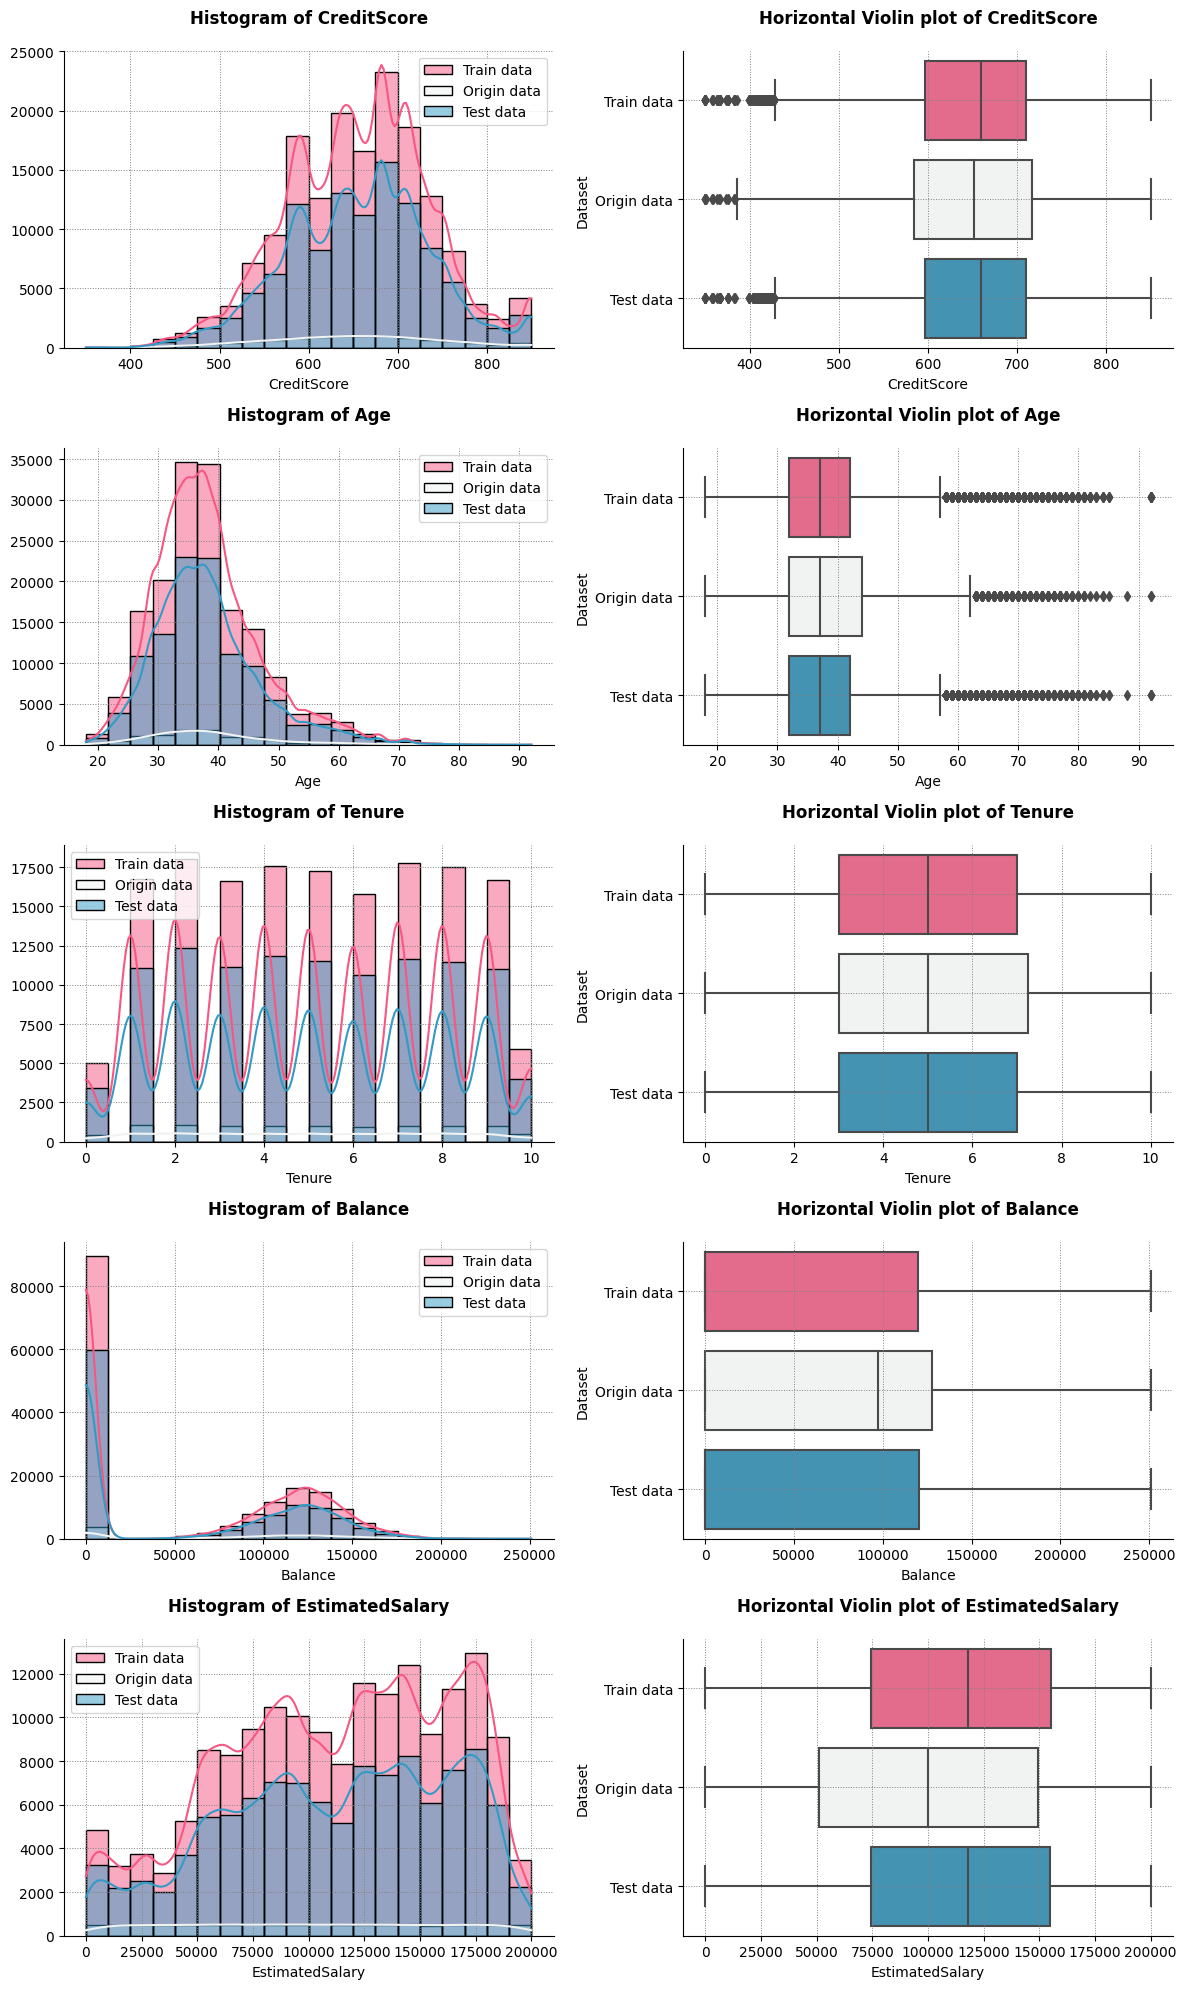

In [23]:
def plot_numerical_features(df_train, df_test, df_origin, num_features):
    colors = color(n_colors=3)
    n = len(num_features)

    fig, ax = plt.subplots(n, 2, figsize=(12, n * 4))
    ax = np.array(ax).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=ax[i, 0], label="Train data")
        sns.histplot(data=df_origin[feature], color=colors[1], bins=20, kde=True, ax=ax[i, 0], label="Origin data")
        sns.histplot(data=df_test[feature], color=colors[2], bins=20, kde=True, ax=ax[i, 0], label="Test data")
        ax[i, 0].set_title(f"Histogram of {feature}", pad=20, weight="bold")
        ax[i, 0].legend()
        ax[i, 0].set_ylabel("")
        ax[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        # ax[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        # ax[i, 0].axvline(df_origin[feature].median(), color="red", linestyle="--", label="Median Origin")
        # ax[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=ax[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Origin data", feature: df_origin[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.boxplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=ax[i, 1]
        )
        ax[i, 1].set_title(f"Horizontal Violin plot of {feature}", pad=20, weight="bold")
        ax[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=ax[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, df_origin = df_origin, num_features=num_features)

In [24]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_origin, skew_origin_df = check_skewness(df_origin, "Original Data")
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data")


🔍 Skewness for Original Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Age                            |   +1.0118 | Highly skewed
Balance                        |   -0.1408 | Approximately symmetric
CreditScore                    |   -0.0720 | Approximately symmetric
Tenure                         |   +0.0107 | Approximately symmetric
EstimatedSalary                |   +0.0016 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Age                            |   +0.9673 | Moderately skewed
Balance                        |   +0.3819 | Approximately symmetric
EstimatedSalary

### Insights on Numerical Feature Distributions

**Distribution Consistency Across Datasets**

* **Histograms** and **violin plots** of numerical features (`CreditScore`, `Age`, `Tenure`, `Balance`, `EstimatedSalary`) show that the **train**, **test**, and **original** datasets share **very similar distributions**.
* This strong alignment suggests that the data preparation or synthetic generation process successfully preserved the statistical characteristics of the original dataset, minimizing the risk of **distributional shift** and supporting better **model generalization**.

**Shape and Spread of Distributions**

* **Histograms** reveal that most variables follow approximately symmetric distributions, except for `Age`, which shows a noticeable right skew.
* **Balance** exhibits a unique pattern with a large number of zero values and a secondary peak at higher balances, hinting at two distinct customer groups: those with no account balance and those with substantial deposits.
* **Box plots** confirm consistent location, spread, and density across datasets, indicating no significant deviation between training, test, and original data.

**Skewness Analysis**

* Across all datasets:

  * `Age` shows **moderate to high positive skewness** (`+0.97` to `+1.01`), indicating that most customers are clustered in younger age ranges, with fewer older customers stretching the distribution’s tail.
  * All other features (`Balance`, `EstimatedSalary`, `CreditScore`, `Tenure`) are **approximately symmetric** (|skewness| < 0.5).

**Feature-Specific Observations**

* **CreditScore:**
  * Normally distributed, centered around 650–660, with minimal variation between datasets.

* **Age:**
  * Skewed toward younger customers (30–40 years old) with fewer older individuals.

* **Tenure:**
  * Evenly spread from 0 to 10 years, indicating a balanced distribution of customer loyalty periods.

* **Balance:**
  * Two prominent groups: customers with no balance and customers with large balances (>100k).

* **EstimatedSalary:**
  * Uniformly distributed across the full salary range, indicating no major bias in income levels.

**Conclusion**

* The high degree of similarity between the train, test, and original datasets indicates **robust data representativeness**.
* The only feature requiring potential transformation is `Age`, due to its skewness, which could be addressed via **log**, **Box-Cox**, or **Yeo-Johnson** transformations depending on modeling needs.

## Correlation Analysis of Numerical Features

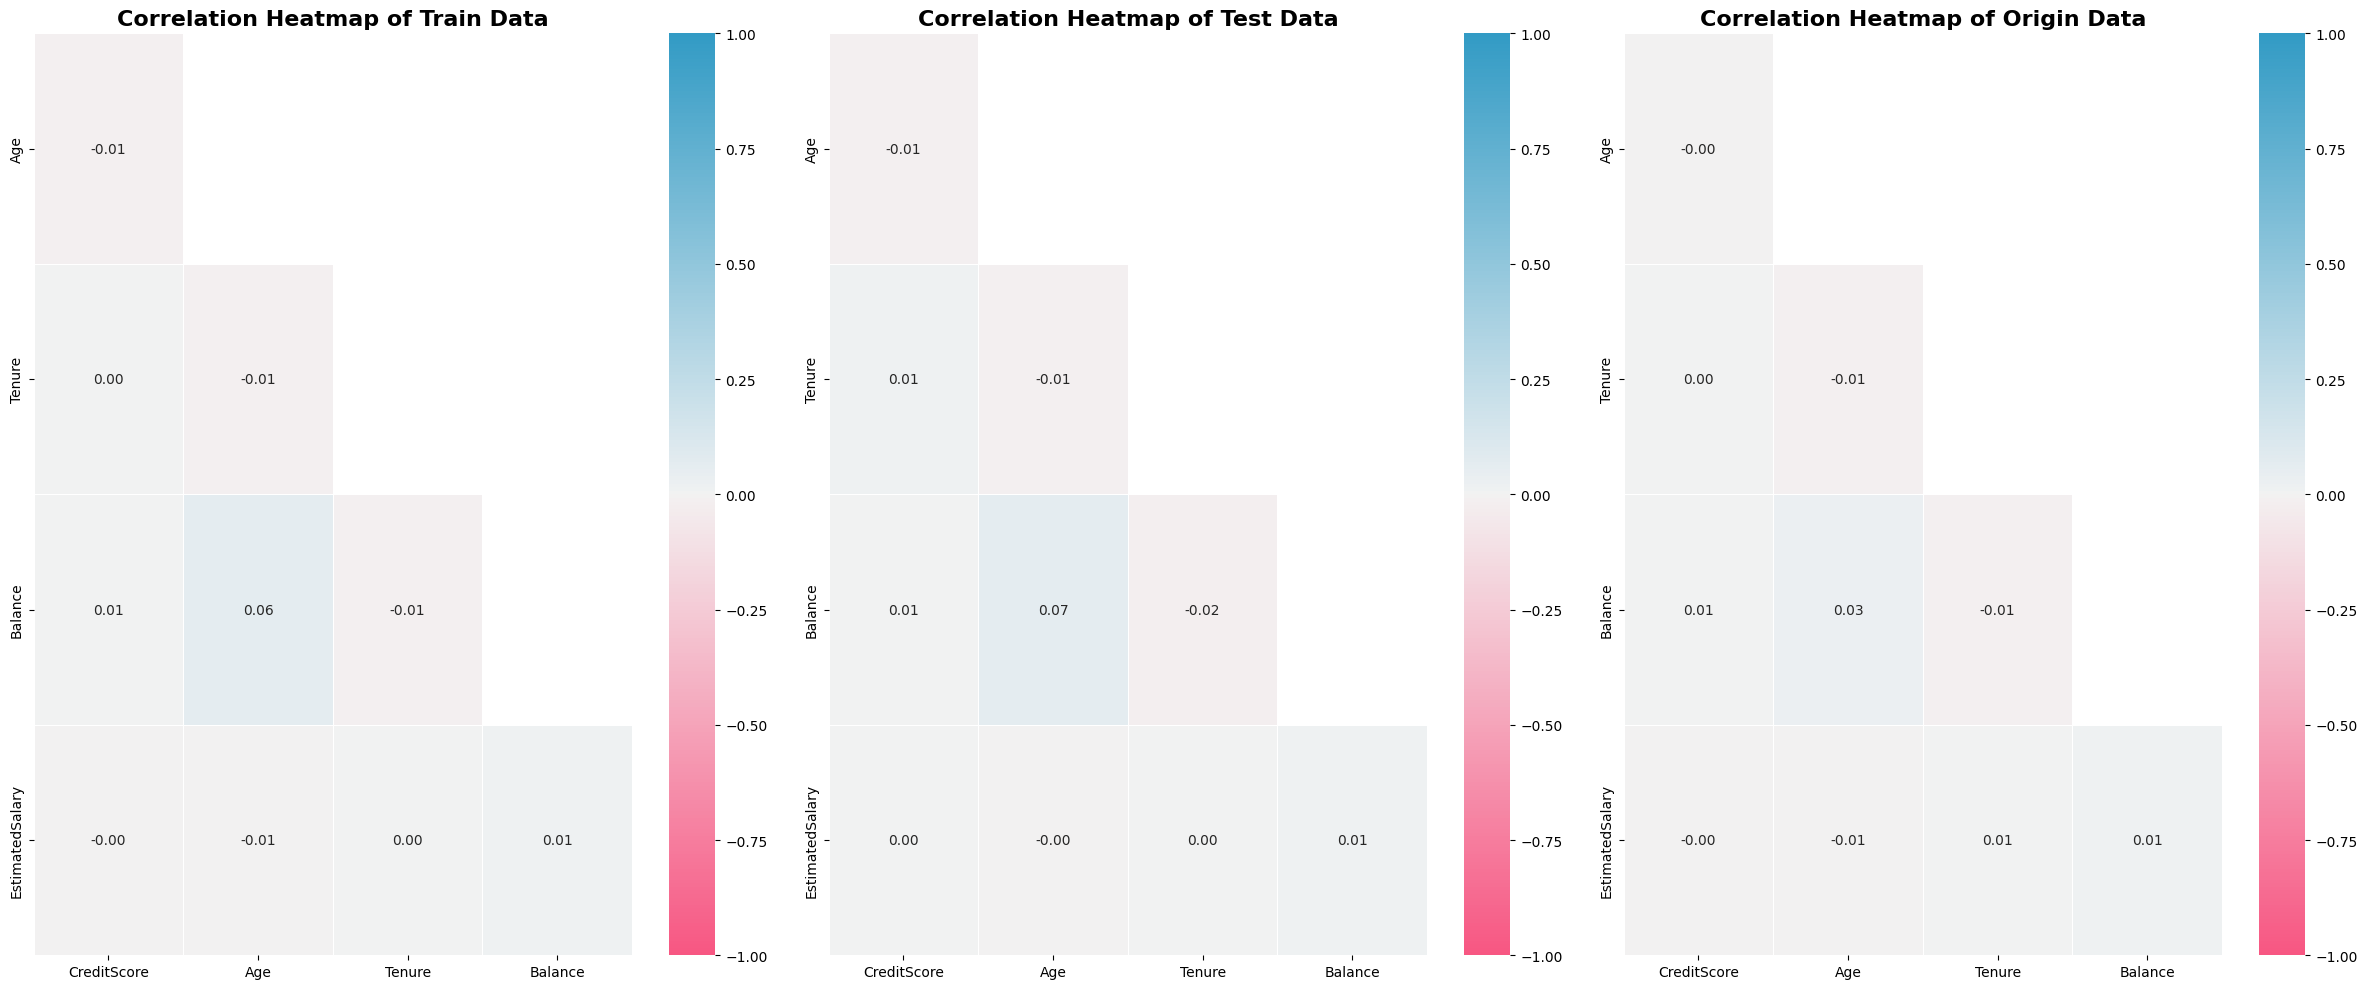

In [25]:
def plot_correlation(df_train, df_origin, df_test, origin_name="Origin Data", train_name="Train Data", test_name="Test Data"):
    corr_train = df_train.corr(numeric_only=True)
    corr_origin = df_origin.corr(numeric_only=True)
    corr_test = df_test.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_origin = np.triu(np.ones_like(corr_origin, dtype=bool))
    adjusted_mask_origin = mask_origin[1:, :-1]
    adjusted_cereal_corr_origin = corr_origin.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    fig, ax = plt.subplots(1, 3, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_origin, mask=adjusted_mask_origin,
                annot=True, fmt=".2f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[2])
    ax[2].set_title(f"Correlation Heatmap of {origin_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

plot_correlation(df_train=df_train.drop(columns="Exited", axis=1),
                 df_origin=df_origin.drop(columns="Exited", axis=1),
                 df_test=df_test)

### Insights from Correlation Analysis of Numerical Features

**Overall Weak Correlations:** Most correlation coefficients are extremely close to zero, indicating very weak or no linear relationship between the numerical features.

**Implications for Modeling**

- The near-zero correlations imply that each numerical feature provides **unique, non-redundant information**.
- Since multicollinearity is not an issue, these features can be safely used together in models like linear regression or tree-based methods.

## Categorical Feature Distributions

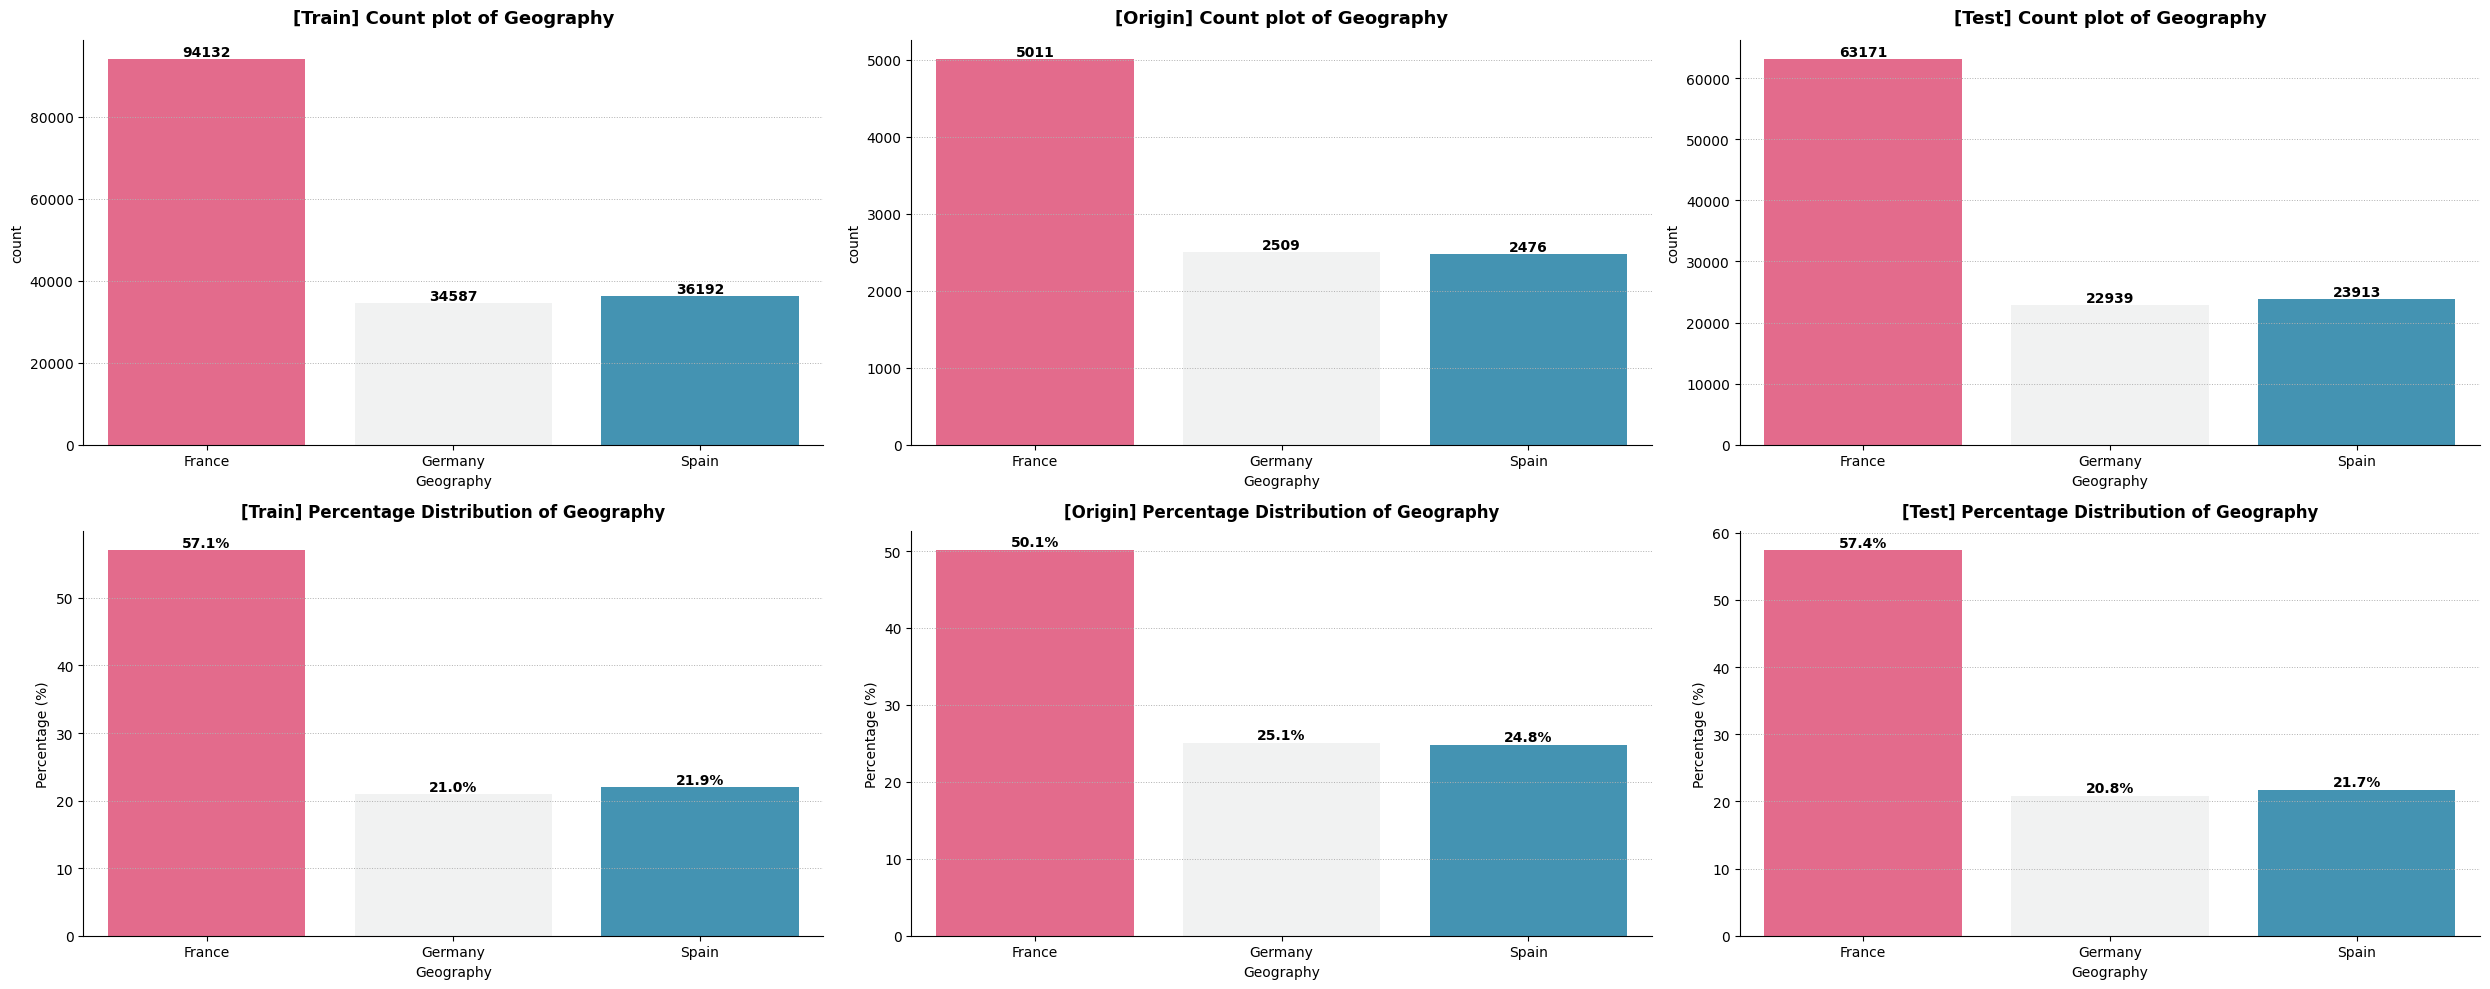

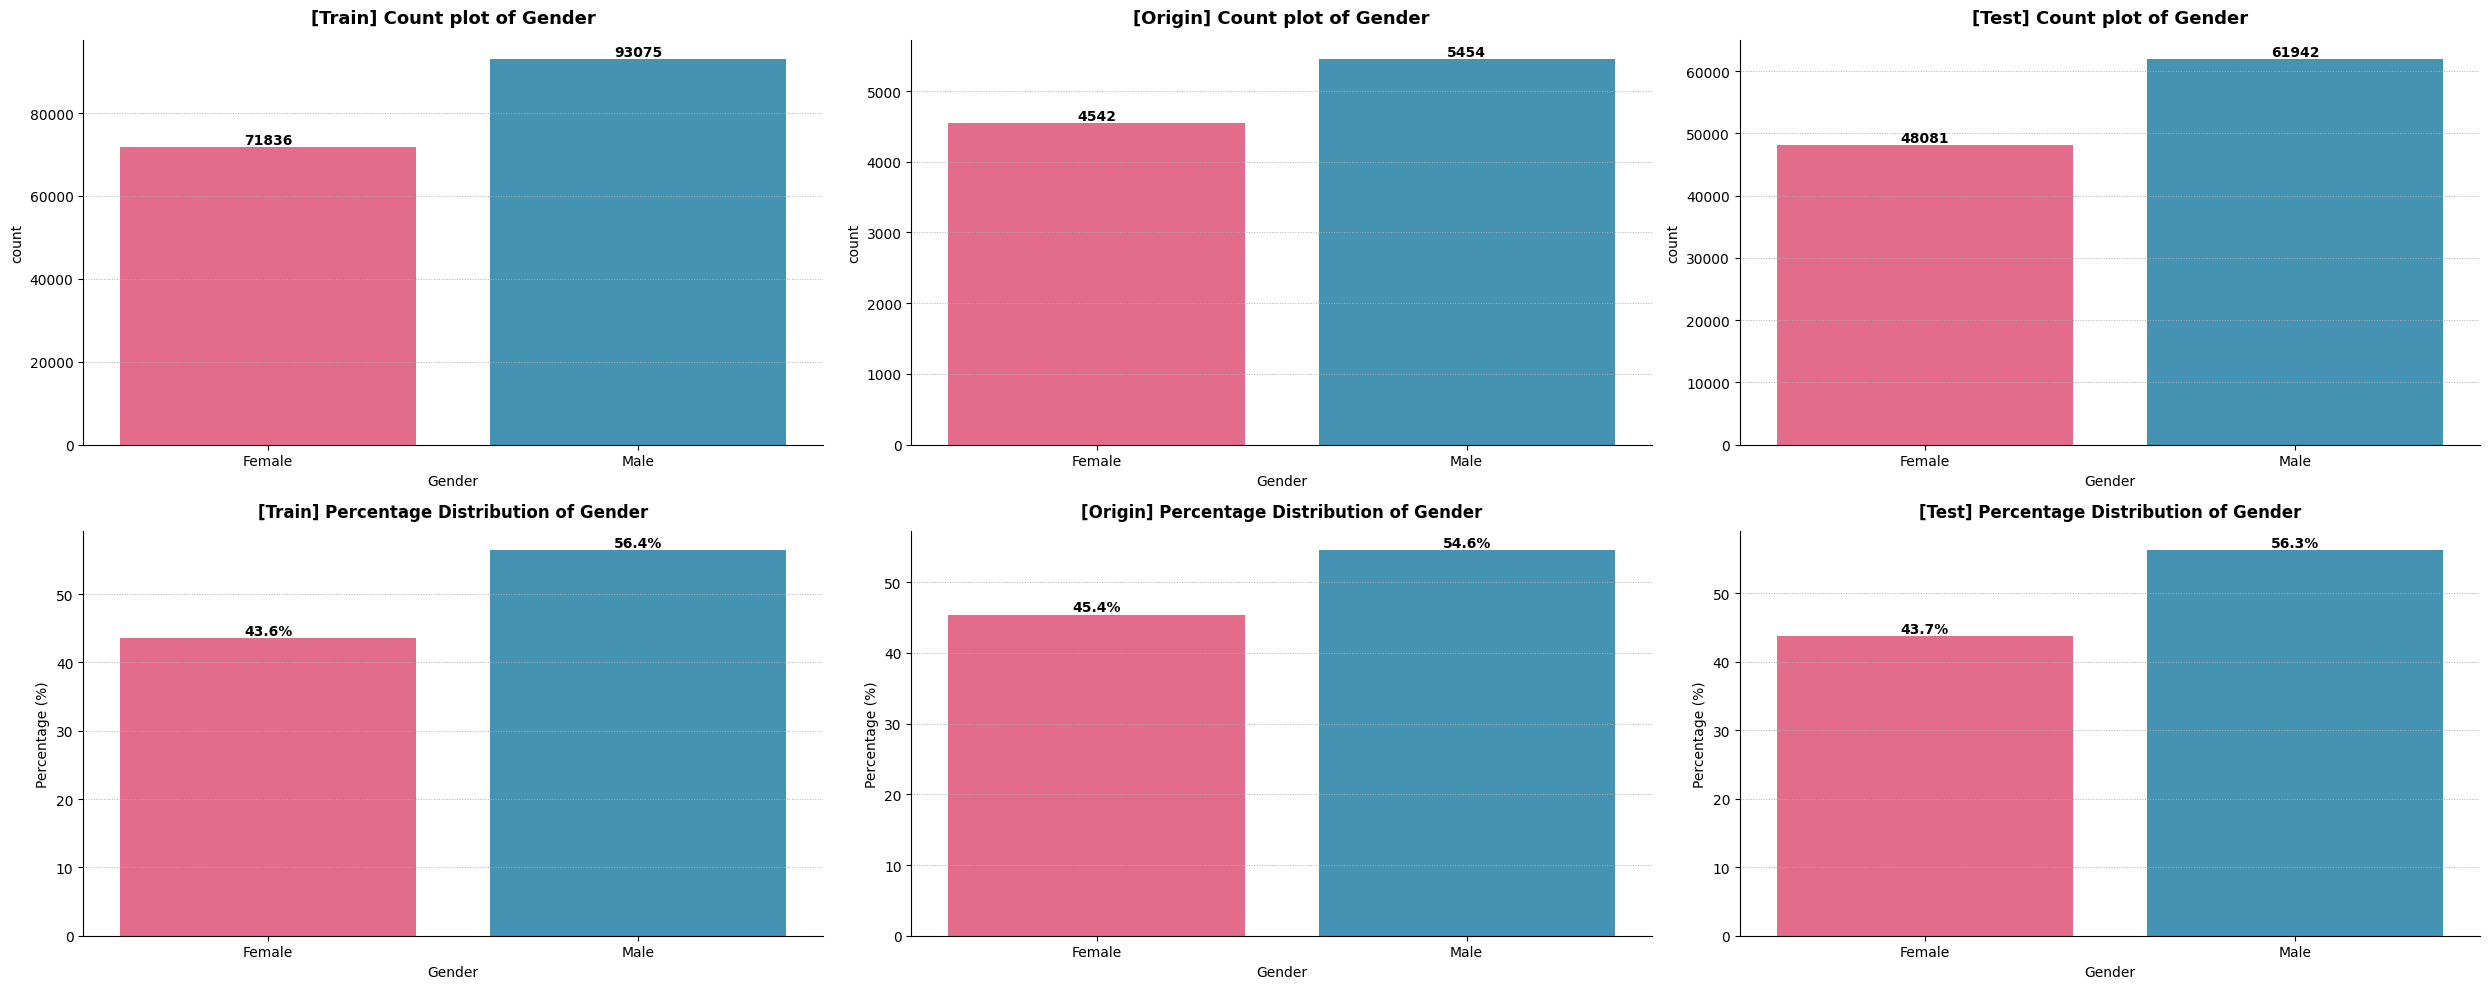

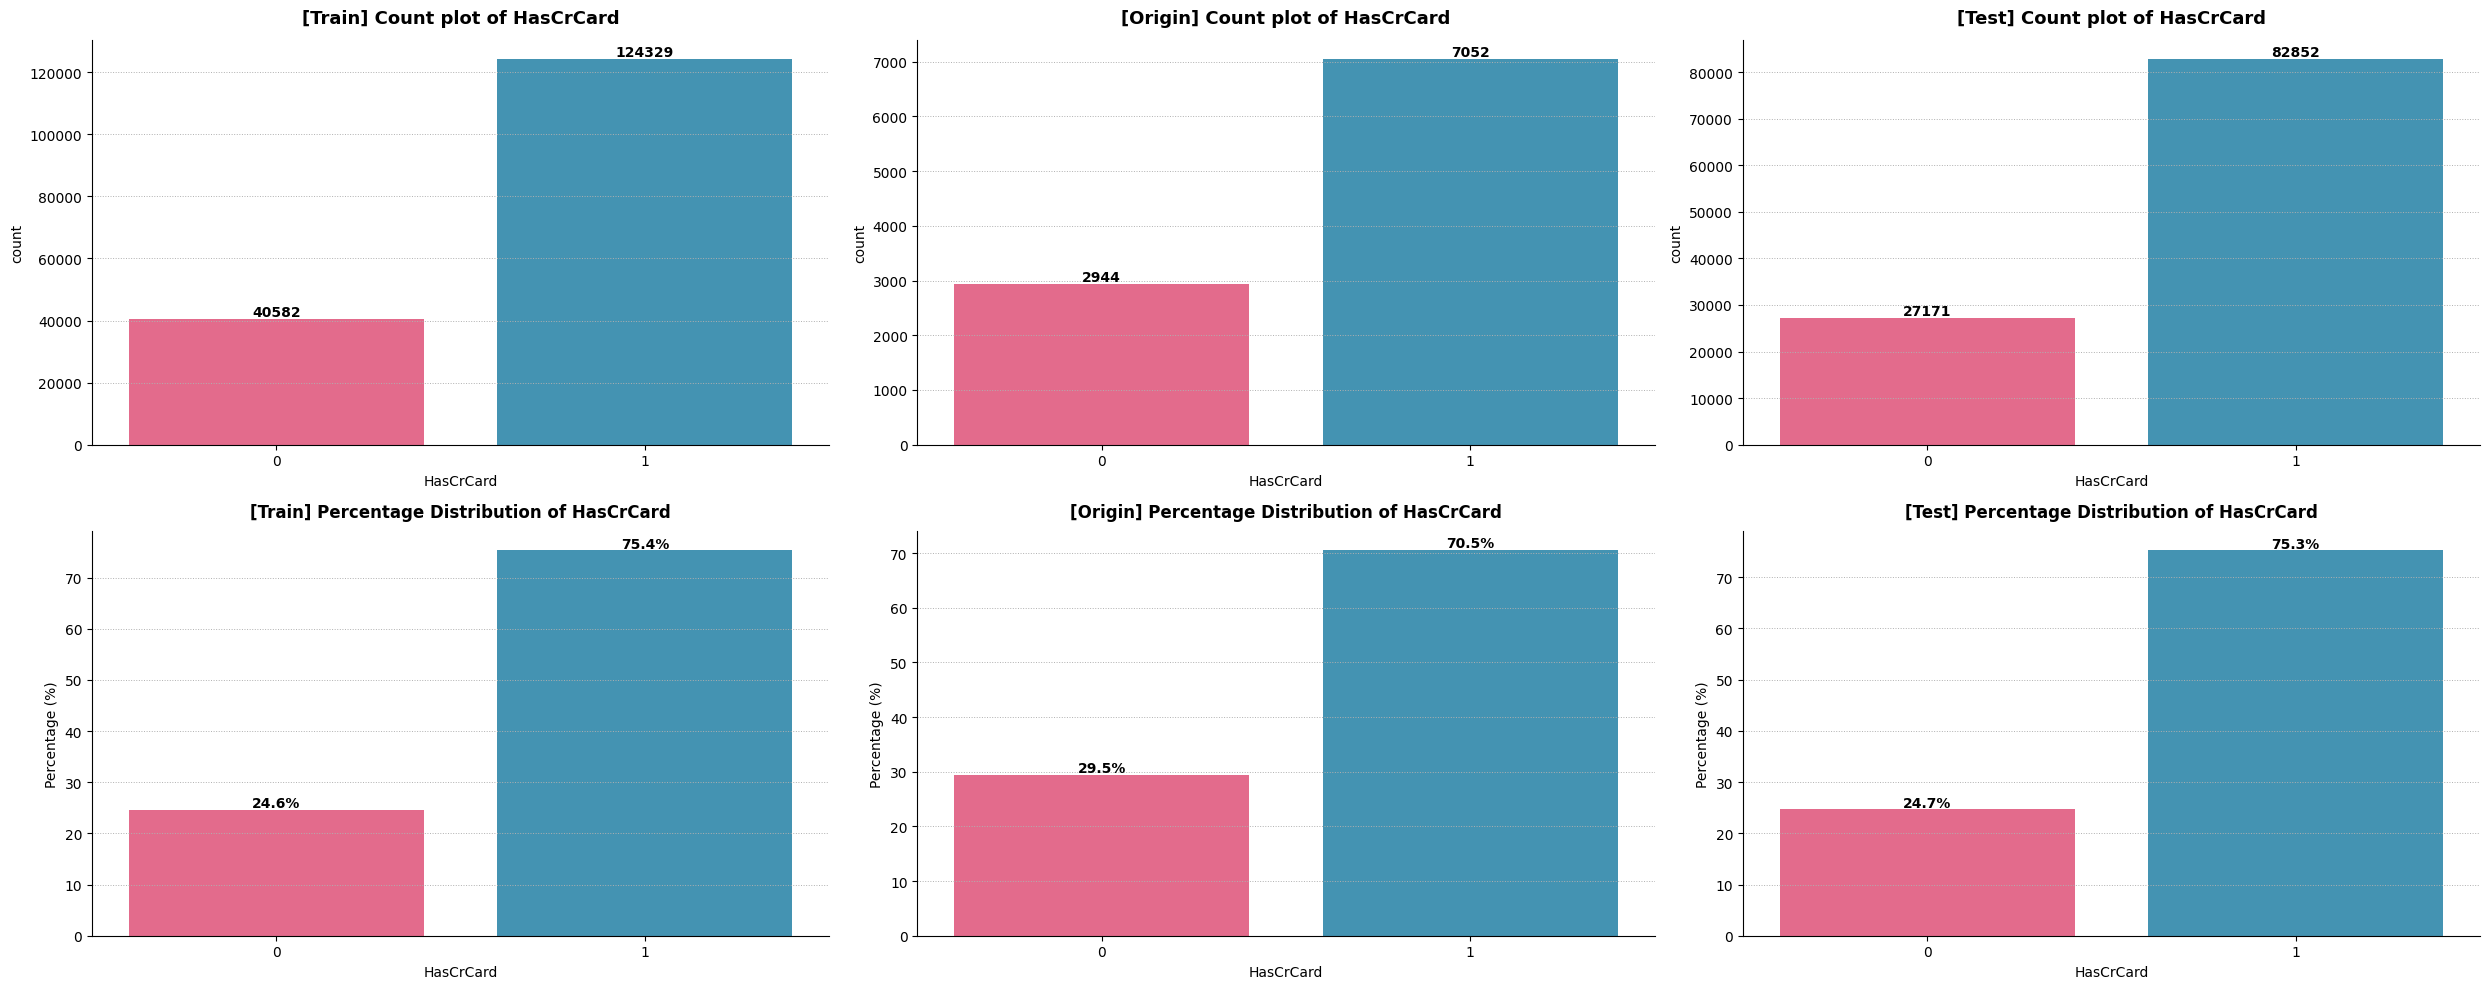

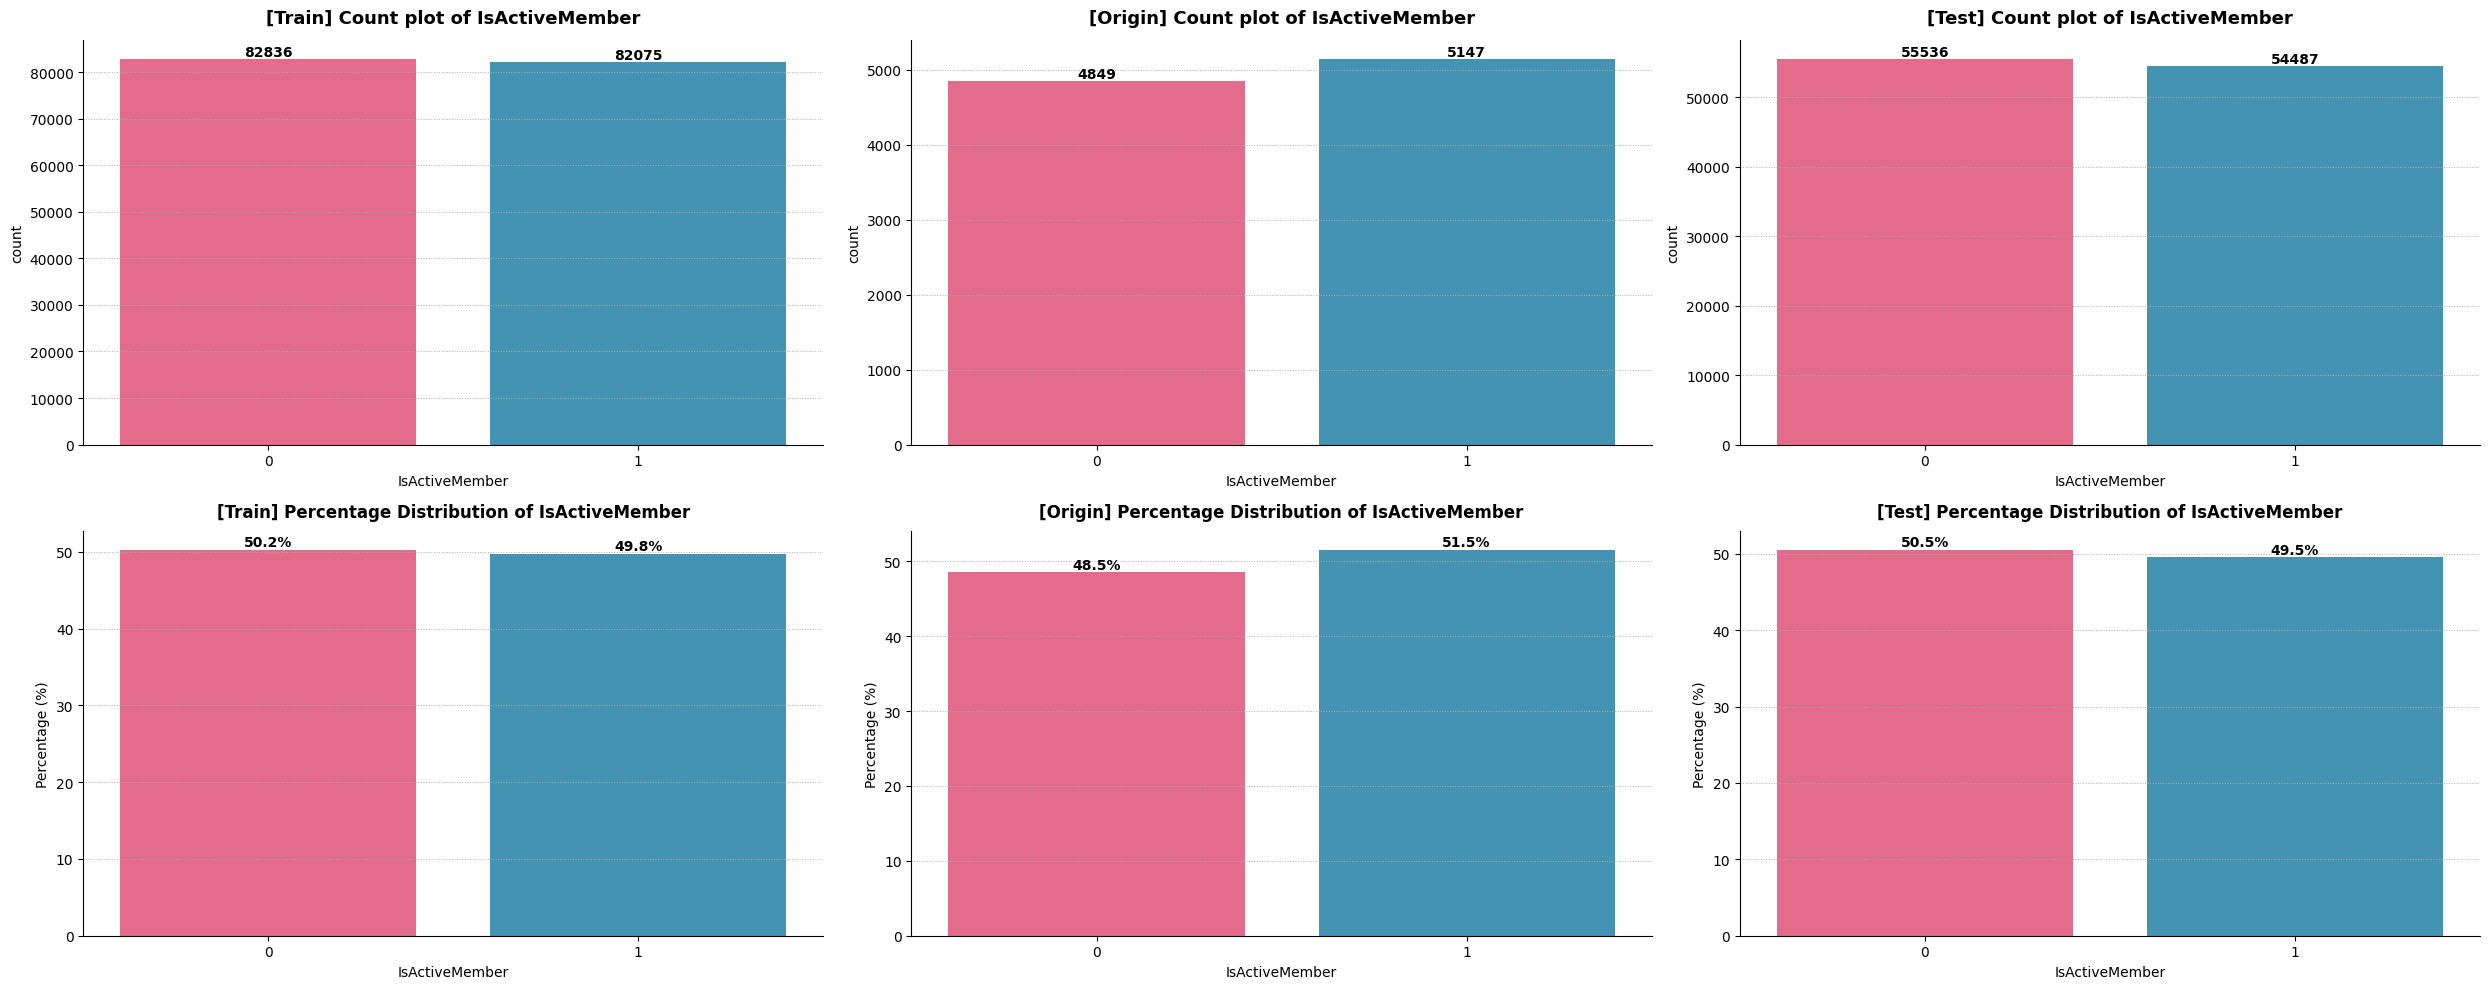

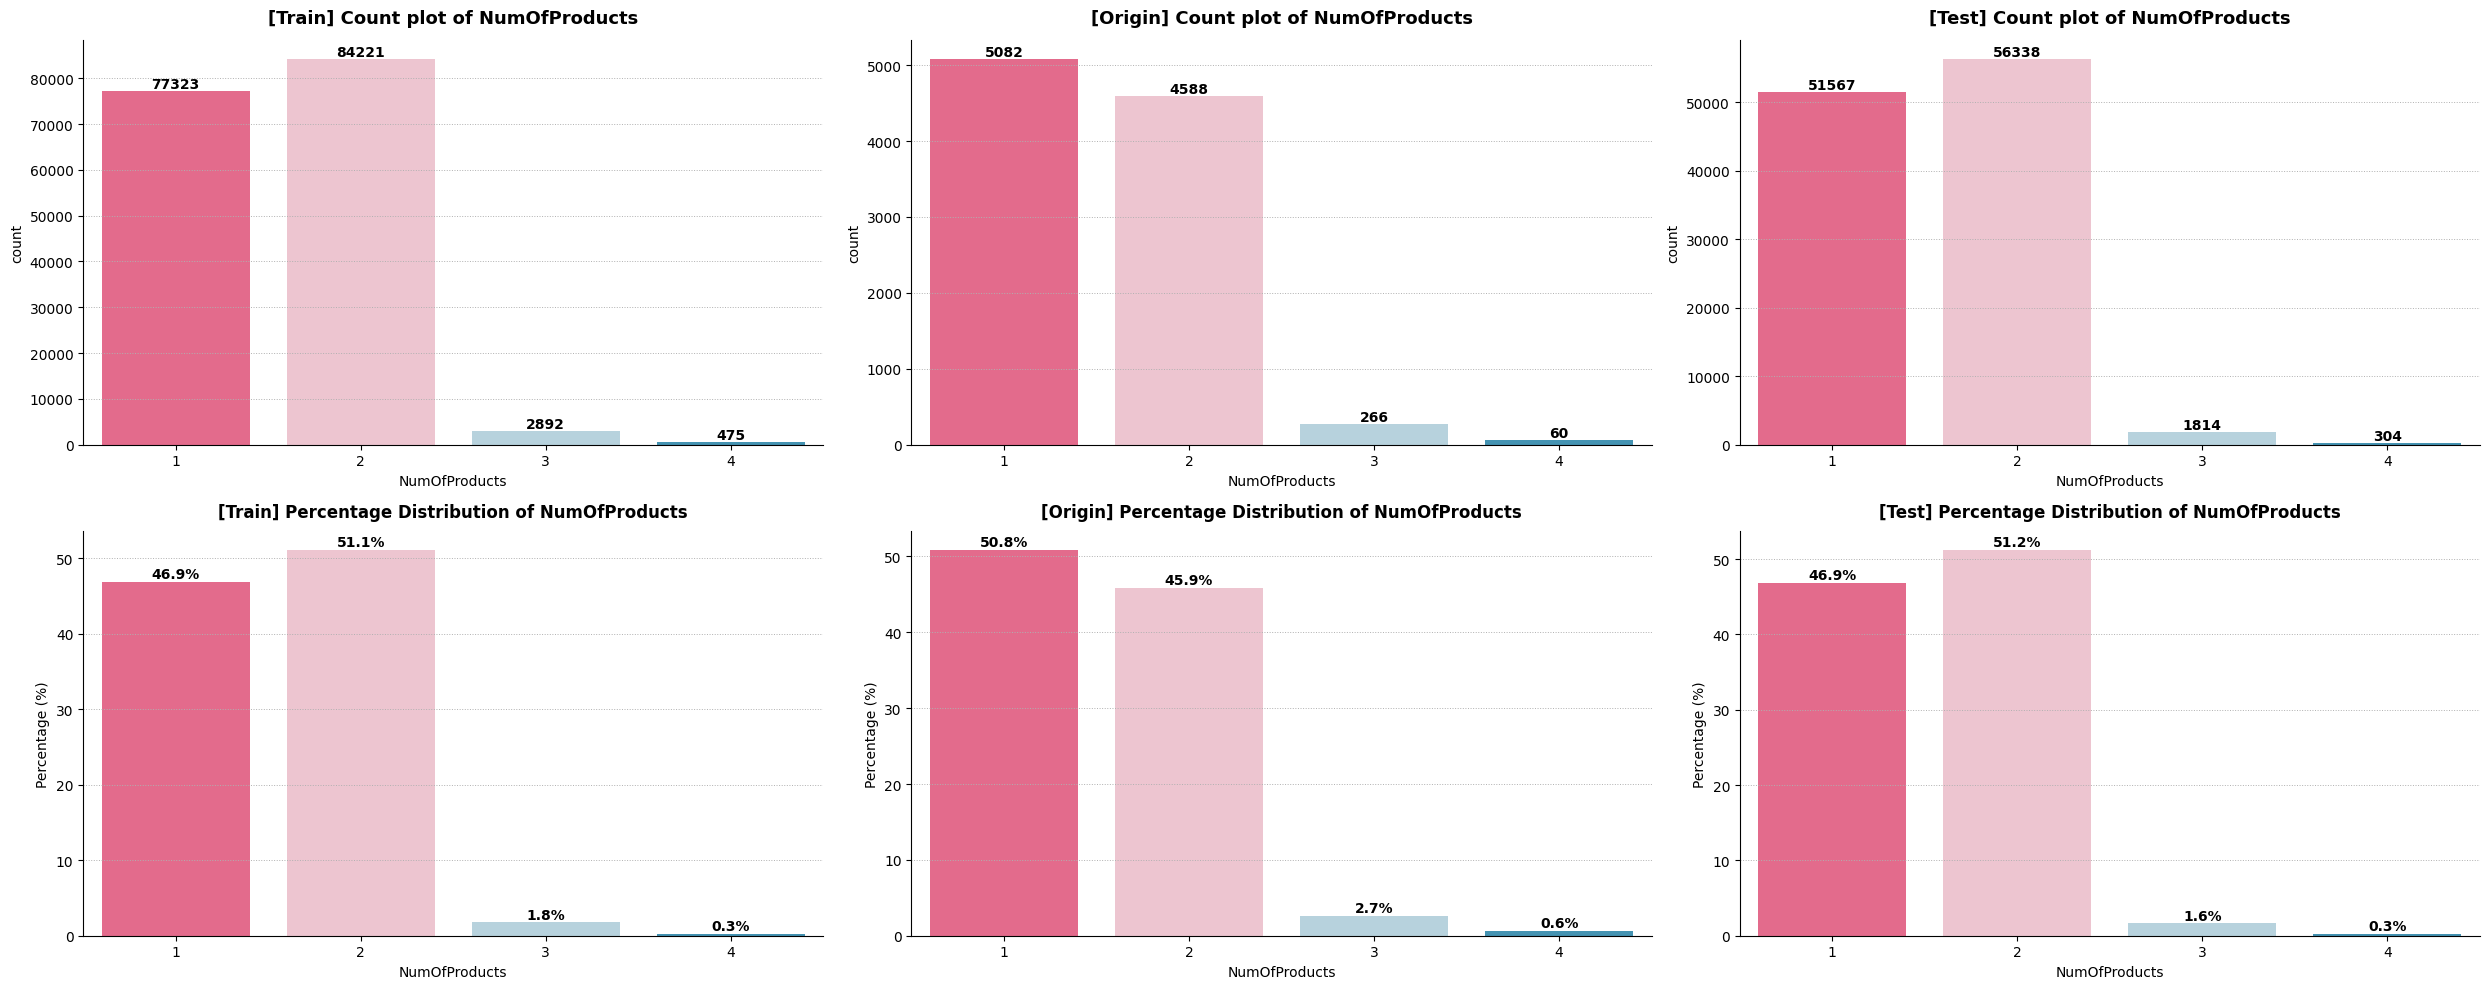

In [26]:
def plot_categorical_distribution(cat_features, df_train, df_test, df_origin, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

        # Determine order dynamically if not provided
        if order is None:
            unique_vals = sorted(df_train[feature].dropna().unique())
        else:
            unique_vals = order

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, x=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        ax[0, 0].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)
        for container in ax[0, 0].containers:
            ax[0, 0].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – ORIGIN
        sns.countplot(data=df_origin, x=feature, ax=ax[0, 1],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 1].set_title(f"[Origin] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        ax[0, 1].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)
        for container in ax[0, 1].containers:
            ax[0, 1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – TEST
        sns.countplot(data=df_test, x=feature, ax=ax[0, 2], 
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 2].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        ax[0, 2].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 2], left=False, bottom=False)
        for container in ax[0, 2].containers:
            ax[0, 2].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TRAIN
        train_percent = df_train[feature].value_counts(normalize=True) * 100
        train_percent = train_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=train_percent.index, y=train_percent.values, ax=ax[1, 0],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", pad=10, weight="bold")
        sns.despine(ax=ax[1, 0], left=False, bottom=False)
        ax[1, 0].set_ylabel("Percentage (%)")
        ax[1, 0].set_xlabel(feature)
        ax[1, 0].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(train_percent.values):
            ax[1, 0].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – ORIGIN
        origin_percent = df_origin[feature].value_counts(normalize=True) * 100
        origin_percent = origin_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=origin_percent.index, y=origin_percent.values, ax=ax[1, 1],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 1].set_title(f"[Origin] Percentage Distribution of {feature}", pad=10, weight="bold")
        sns.despine(ax=ax[1, 1], left=False, bottom=False)
        ax[1, 1].set_ylabel("Percentage (%)")
        ax[1, 1].set_xlabel(feature)
        ax[1, 1].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(origin_percent.values):
            ax[1, 1].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        # PERCENTAGE BARPLOT – TEST
        test_percent = df_test[feature].value_counts(normalize=True) * 100
        test_percent = test_percent.reindex(unique_vals).fillna(0)
        sns.barplot(x=test_percent.index, y=test_percent.values, ax=ax[1, 2],
                    palette=color(n_colors=len(unique_vals)))
        ax[1, 2].set_title(f"[Test] Percentage Distribution of {feature}", pad=10, weight="bold")
        sns.despine(ax=ax[1, 2], left=False, bottom=False)
        ax[1, 2].set_ylabel("Percentage (%)")
        ax[1, 2].set_xlabel(feature)
        ax[1, 2].grid(axis="y", linestyle=":", linewidth=0.7)
        for i, v in enumerate(test_percent.values):
            ax[1, 2].text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=10, weight="bold")

        plt.tight_layout()
        plt.show()

plot_categorical_distribution(cat_features=cat_features, df_train = df_train, df_test = df_test, df_origin=df_origin)

In [27]:
def top_ratio(df_test = df_test, df_train = df_train, df_origin=df_origin, cat_features = cat_features):
    dataset_names = ["Train", "Test", "Origin"]
    datasets = [df_train, df_origin, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Origin Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Insights on Categorical Feature Distributions

**Geography Distribution**
The `Geography` feature consists of three categories: **France**, **Germany**, and **Spain**.

* Across datasets, **France** consistently dominates with \~57% share in Train/Test, compared to \~50% in the Original dataset.
* **Germany** and **Spain** have similar but lower proportions, each around 21–25%.

**Interpretation:**
This shows a noticeable **overrepresentation of France** in the synthetic Train/Test sets compared to the Original dataset, which could slightly bias models toward patterns prevalent in the French customer segment.

> **Implication:**
> It may be worth considering stratified sampling or weighting to balance geography representation if fairness across regions is important.

**Gender Distribution**
The `Gender` variable is binary (**Female**, **Male**).

* In all datasets, **Male** customers slightly outnumber Females (\~56% vs \~44%).
* The distribution is stable between Train, Test, and Original datasets, indicating consistent gender representation.

**Interpretation:**
The gender distribution is slightly imbalanced toward Males but not excessively skewed, making it less critical to adjust during preprocessing.

**HasCrCard Distribution**
The `HasCrCard` feature is binary (0 = No, 1 = Yes).

* Majority of customers (\~75%) have a credit card in Train and Test sets, slightly higher than \~70% in the Original dataset.
* The difference suggests synthetic data has a **slightly higher proportion of credit card holders**.

**Interpretation:**
Since credit card ownership can be a key predictor in churn or credit risk analysis, this proportion shift may slightly influence model behavior toward patterns of cardholders.

**IsActiveMember Distribution**
The `IsActiveMember` variable is binary (0 = Inactive, 1 = Active).

* Distribution is **balanced** across datasets (\~50% Active, \~50% Inactive).
* Minimal differences between synthetic and original data.

**Interpretation:**
Balanced representation means no immediate need for adjustment; model training should treat both active and inactive customers fairly.

**NumOfProducts Distribution**
The `NumOfProducts` feature has four categories (1–4).

* Most customers have **1 or 2 products** (\~47–51% each in Train/Test), with only a small proportion having 3 or 4 products (<2%).
* The Original dataset has a similar pattern, though slightly more customers with 3 or 4 products.

**Interpretation:**
The **long-tail distribution** here means that higher product counts (3–4) are rare, potentially limiting model learning for those customer profiles.

> **Implication:**
> It may be beneficial to combine rare categories into a single “3+ products” group or apply target encoding with caution to avoid overfitting.

**Summary of Categorical Feature Analysis**

**Stable features across datasets:**

* `Gender` and `IsActiveMember` show consistent distributions.

**Slight shifts in synthetic data:**

* `Geography` has more **France** representation.
* `HasCrCard` has more cardholders than in the original dataset.

**Highly imbalanced features:**

* `NumOfProducts` is dominated by 1–2 products, with very few cases in higher categories.

**Modeling implications:**

* Monitor potential bias from geography and credit card ownership differences.
* Consider category grouping for rare product counts to improve model stability.

## Bivariate Analysis

In [28]:
df_train = pd.concat([df_train, df_origin], axis=0, ignore_index=True)

🔎 D’Agostino and Pearson Normality Test for 'CreditScore' across 'Exited' groups

 Group: 0 (n = 137961)
  Statistic : 156.341
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 36946)
  Statistic : 28.531
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'CreditScore' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 2652178588.0
p-value     : 2.7060702229666623e-33

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'CreditScore' than Group '1'.


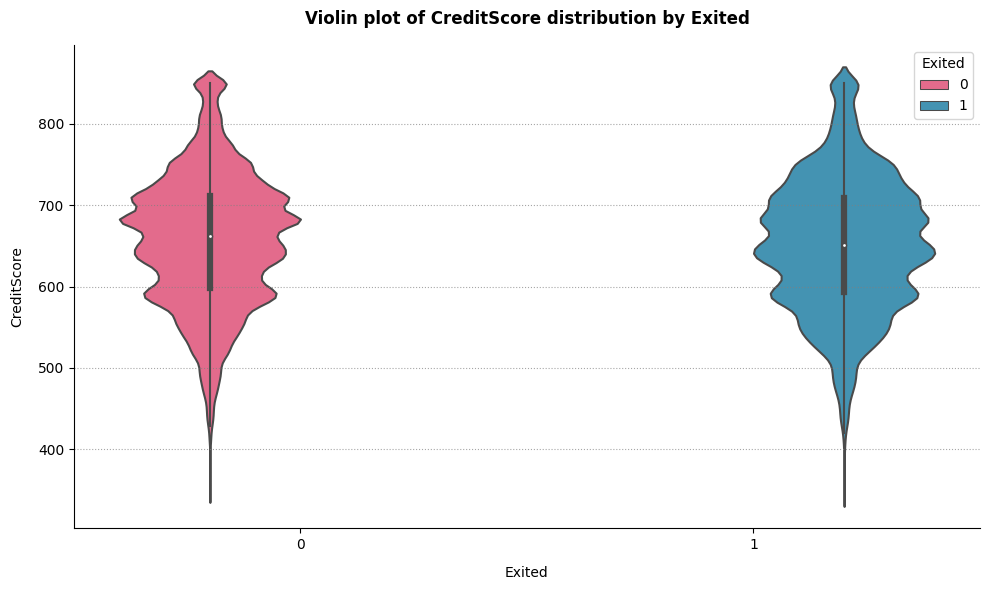

🔎 D’Agostino and Pearson Normality Test for 'Age' across 'Exited' groups

 Group: 0 (n = 137961)
  Statistic : 36054.059
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 36946)
  Statistic : 79.568
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Age' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 1277202338.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Age' than Group '0'.


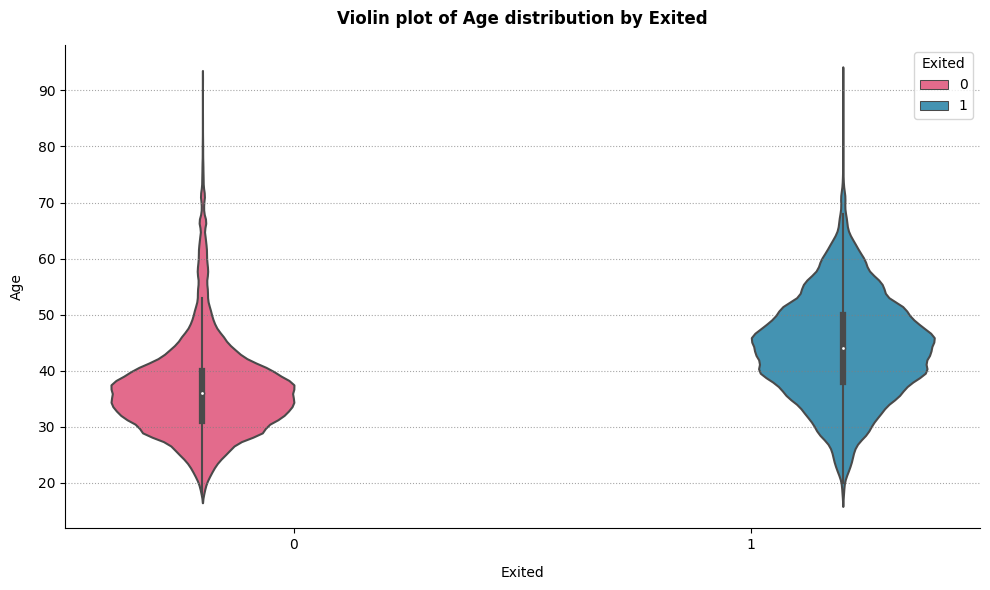

🔎 D’Agostino and Pearson Normality Test for 'Tenure' across 'Exited' groups

 Group: 0 (n = 137961)
  Statistic : 88401.013
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 36946)
  Statistic : 19933.706
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Tenure' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 2616820906.0
p-value     : 1.7115707558234369e-15

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


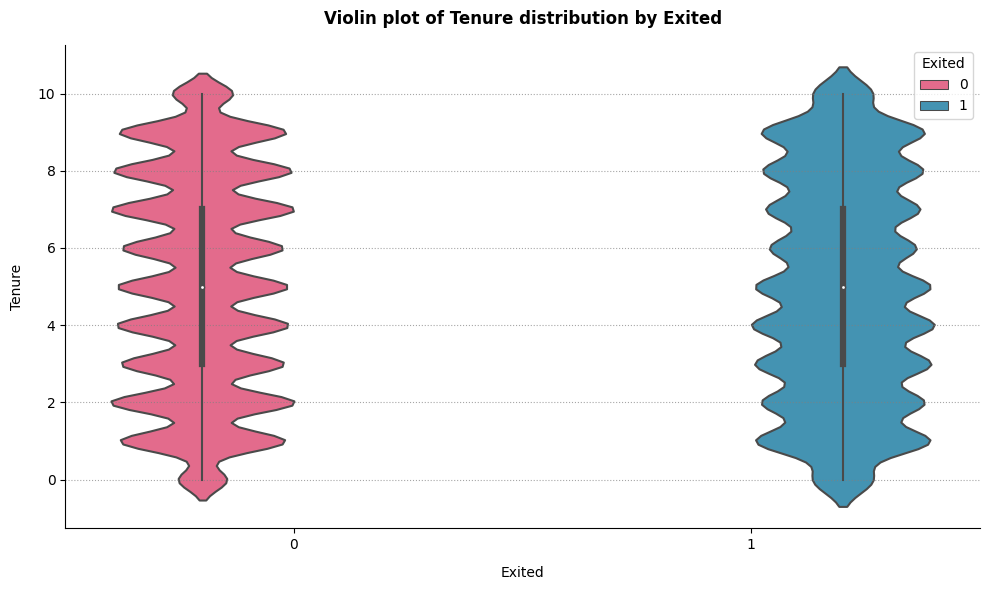

🔎 D’Agostino and Pearson Normality Test for 'Balance' across 'Exited' groups

 Group: 0 (n = 137961)
  Statistic : 824507.878
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 36946)
  Statistic : 165696.753
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Balance' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 2133818633.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Balance' than Group '0'.


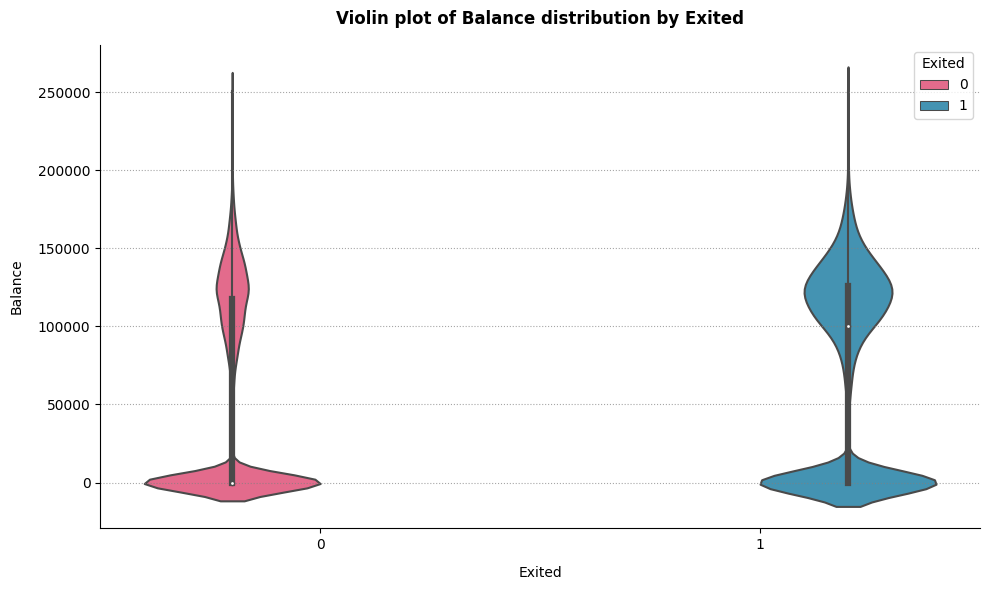

🔎 D’Agostino and Pearson Normality Test for 'EstimatedSalary' across 'Exited' groups

 Group: 0 (n = 137961)
  Statistic : 17597.833
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 36946)
  Statistic : 5105.320
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'EstimatedSalary' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 2477802171.5
p-value     : 2.241441108627862e-16

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'EstimatedSalary' than Group '0'.


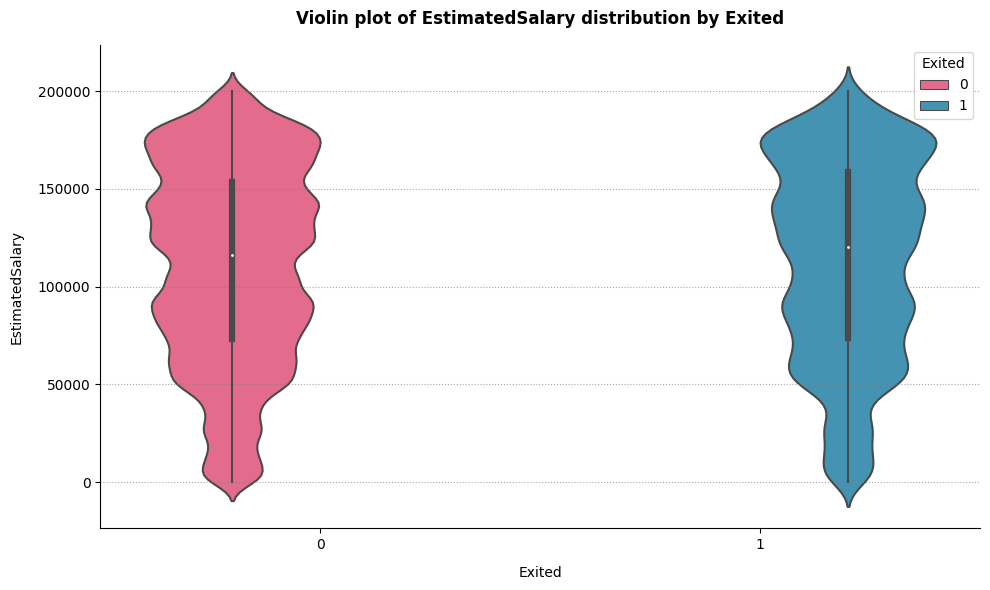

In [29]:
from IPython.core.display import HTML
target_feature = "Exited"

def perform_statical_testing(feature, df_train = df_train, total_categories = 2, target_feature = target_feature):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Exited(feature, df_train = df_train, target_feature = target_feature, order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {feature} by {target_feature}</b></h2>"))
    plot_numerical_distribution_by_Exited(feature=feature, df_train=df_train)

### Insight Numerical Features by Exited

`CreditScore` <br>
* There is a statistically significant difference in credit scores between customers who churned and those who did not (p-value ≈ 0).
* The non-churn group has a higher median credit score (662 vs. 651). <br>

-> The feature *CreditScore* appears to have some influence on churn behavior; however, the impact is relatively minor due to the small difference observed.

`Age` <br>
- There is a statistically significant difference in age between churned and retained customers.
- The median age of churned customers is higher (44 vs. 36), suggesting older individuals are more likely to leave. <br>

-> This suggests that age is a significant predictor of customer churn, with older customers being more likely to exit.

`Tenure` <br>
- Although customers in both the exited and retained groups have the same median tenure of 5 years, the distribution of `Tenure` between the two groups differs significantly in a statistical sense.

-> This indicates that tenure has some influence on churn likelihood, but it is not a strong standalone determinant.

`Balance` <br>
- The test results show a statistically significant difference in account balance between customers who stayed and those who exited.
- Customers who exited have a higher median balance (100,253 vs. 0)

-> This suggests that Balance is a significant predictor of customer churn, with higher balance being more likely to exit.

`EstimatedSalary`<br>
* There is a statistically significant difference in credit scores between customers who churned and those who did not (p-value ≈ 0).
* The churn group has a higher median estimated salary  (120378 vs. 116267).

In [30]:
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of {cat} by Exited</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Exited
    grouped = df.groupby([cat, "Exited"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
    
    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=9)

    ax[0].set_title(f"Percentage of Exited by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Exited Rate", fontsize=12)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=rot)
    ax[0].legend_.remove()
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Exited", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=percentages.index, hue_order = [0, 1])
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=9, weight="bold")

    ax[1].set_title(f"Exited by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Exited", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=rot)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Exited", df=df, show_residuals=True)

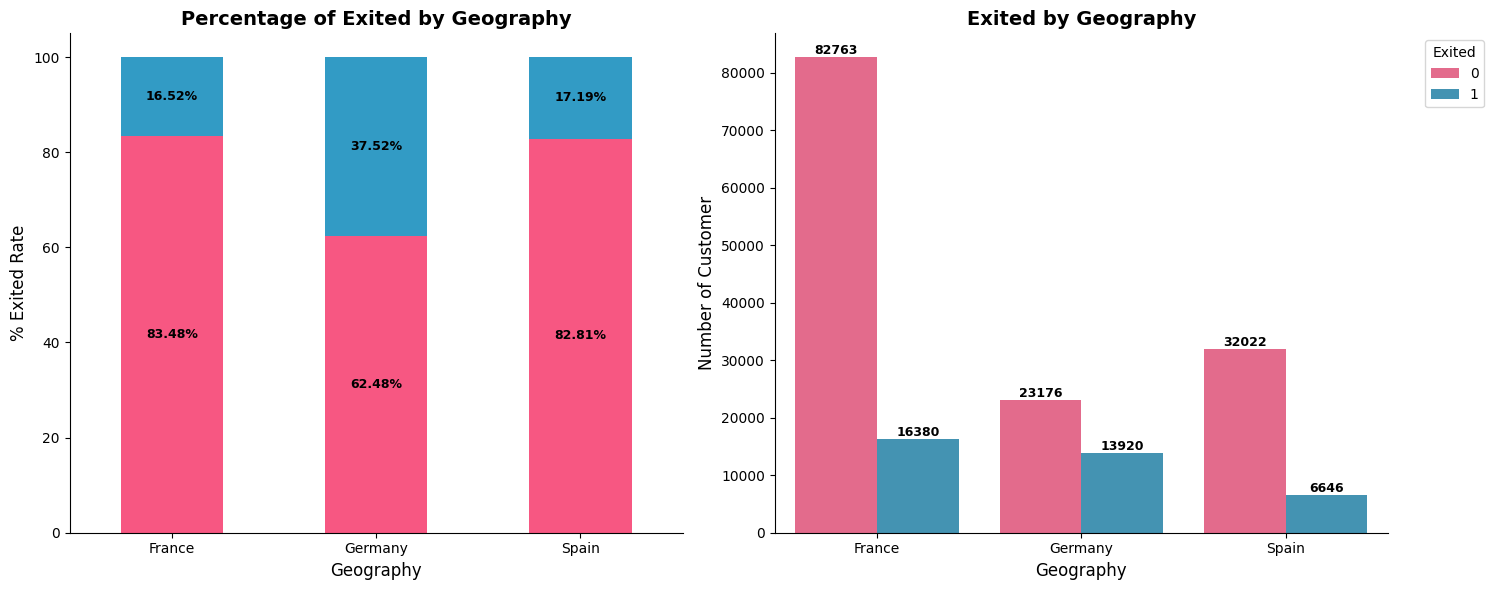


🔍 Chi-Square Test of Independence: 'Geography' vs. 'Exited'
Chi-squared statistic: 7608.625
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Geography' and 'Exited'.

📈 Standardized Residuals:
Exited         0      1
Geography              
France     16.31 -31.53
Germany   -35.57  68.73
Spain       8.71 -16.84


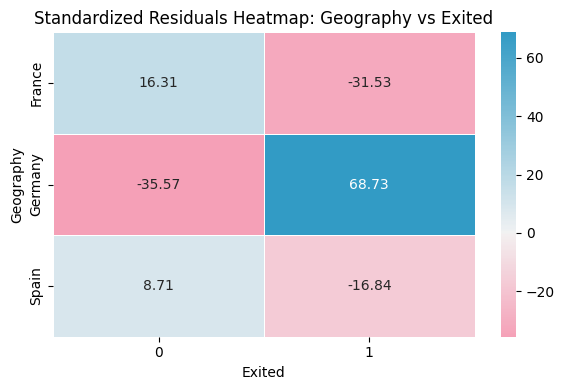

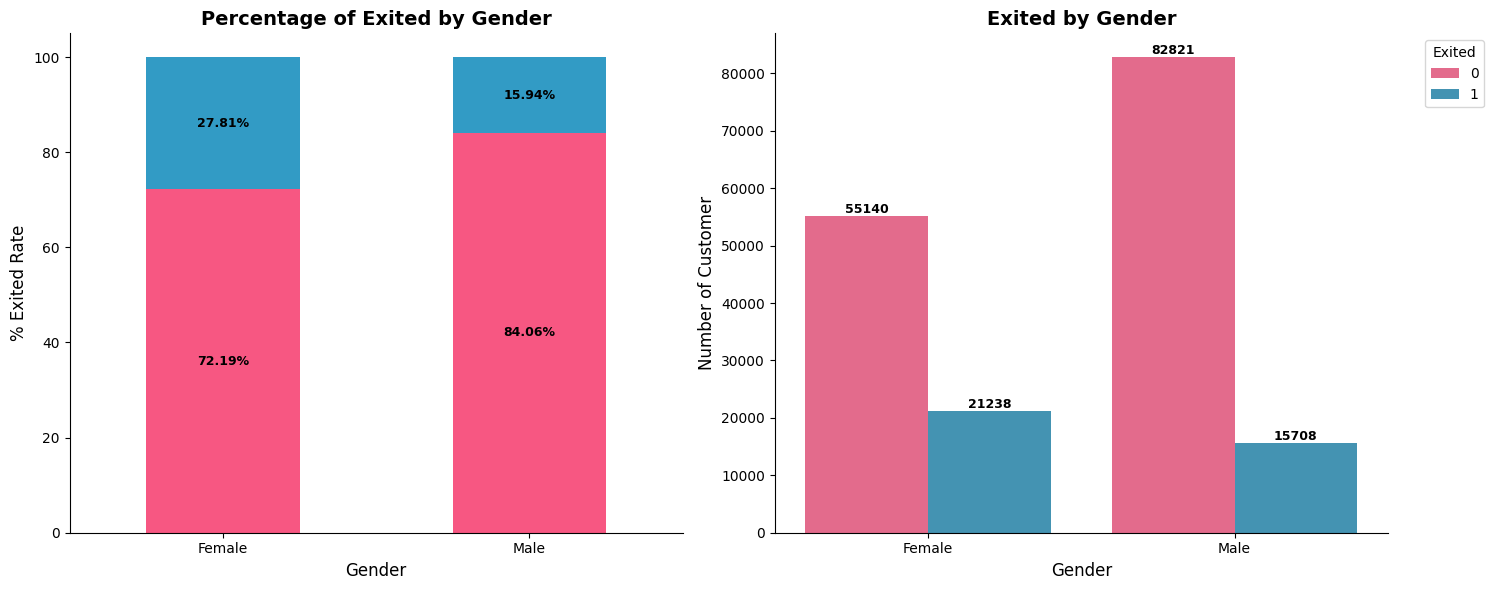


🔍 Chi-Square Test of Independence: 'Gender' vs. 'Exited'
Chi-squared statistic: 3634.020
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Gender' and 'Exited'.

📈 Standardized Residuals:
Exited      0      1
Gender              
Female -20.80  40.19
Male    18.31 -35.38


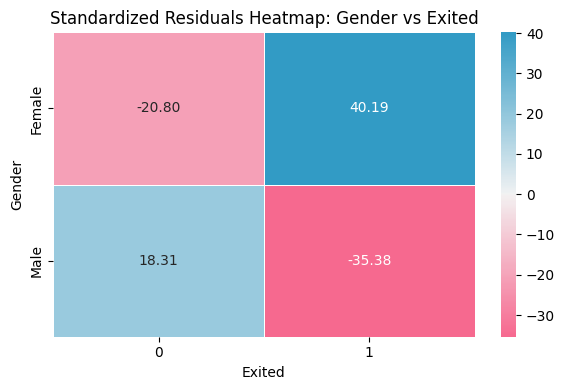

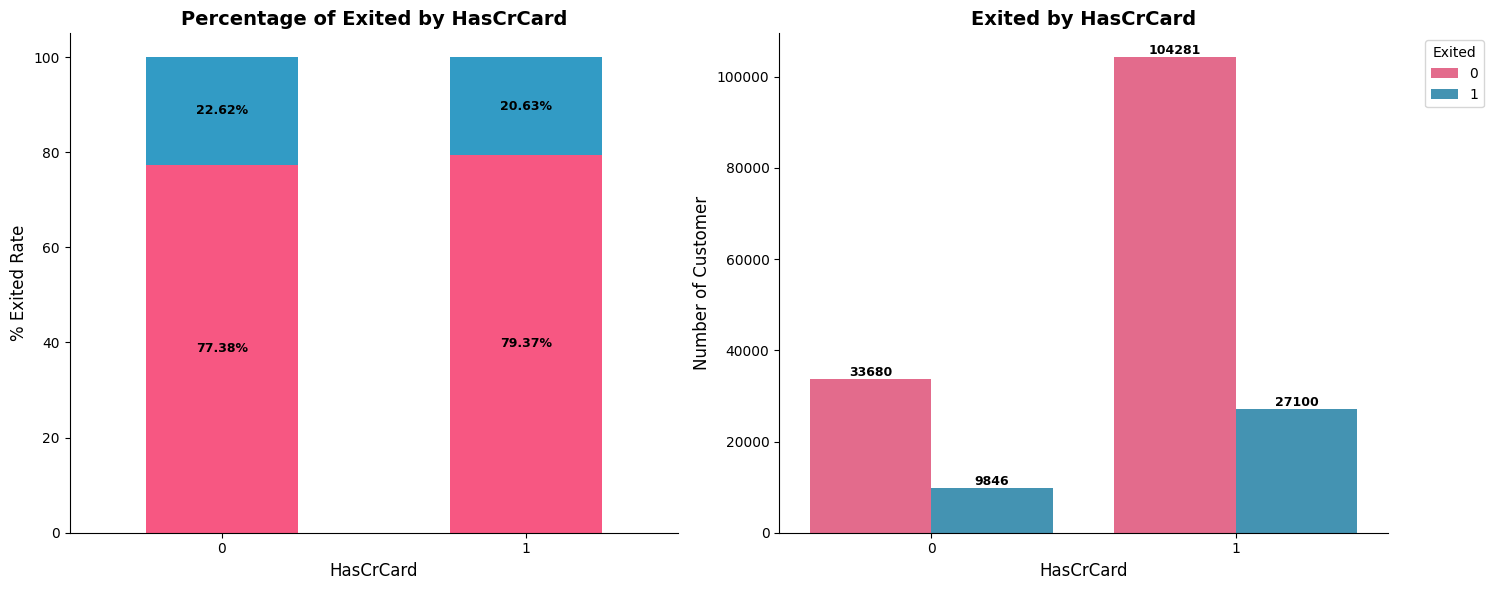


🔍 Chi-Square Test of Independence: 'HasCrCard' vs. 'Exited'
Chi-squared statistic: 77.897
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'HasCrCard' and 'Exited'.

📈 Standardized Residuals:
Exited        0     1
HasCrCard            
0         -3.52  6.80
1          2.03 -3.91


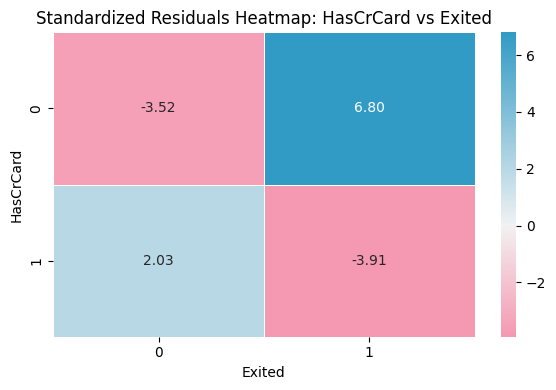

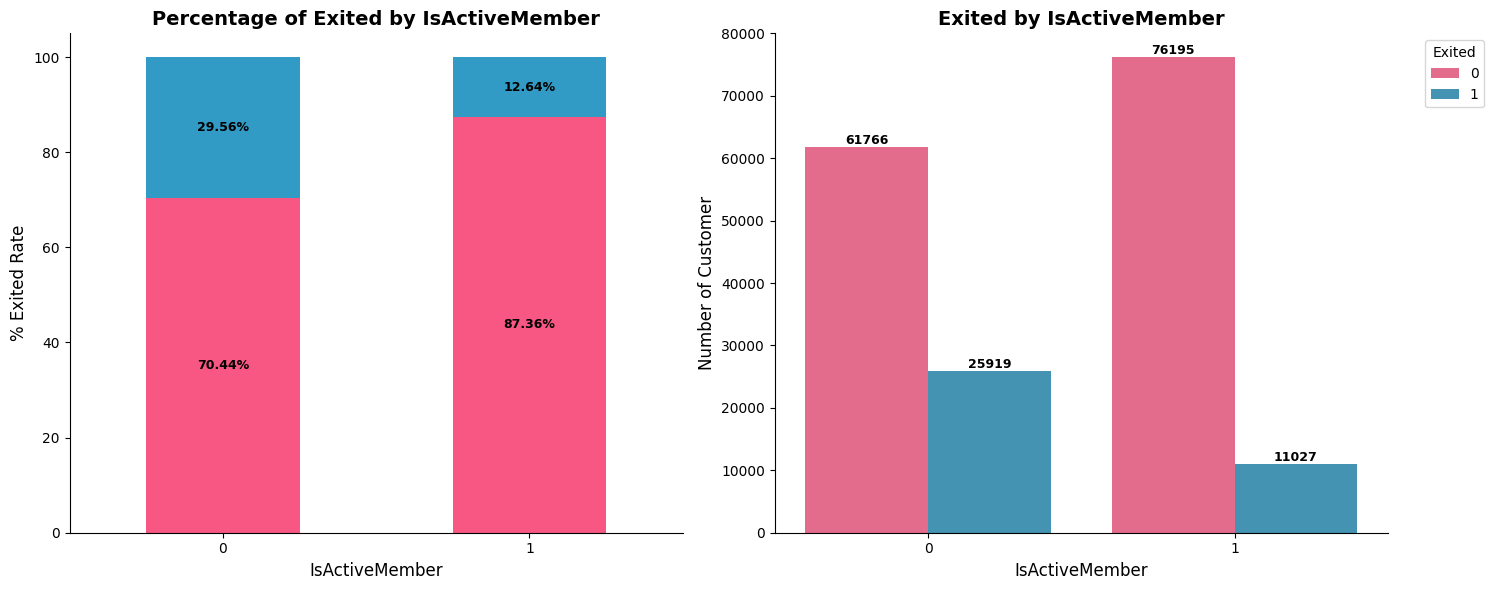


🔍 Chi-Square Test of Independence: 'IsActiveMember' vs. 'Exited'
Chi-squared statistic: 7509.494
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'IsActiveMember' and 'Exited'.

📈 Standardized Residuals:
Exited              0      1
IsActiveMember              
0              -28.13  54.35
1               28.20 -54.50


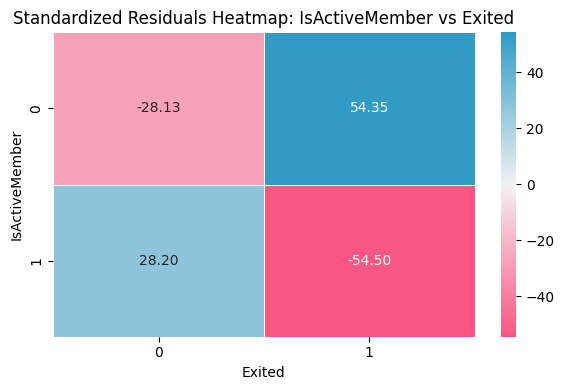

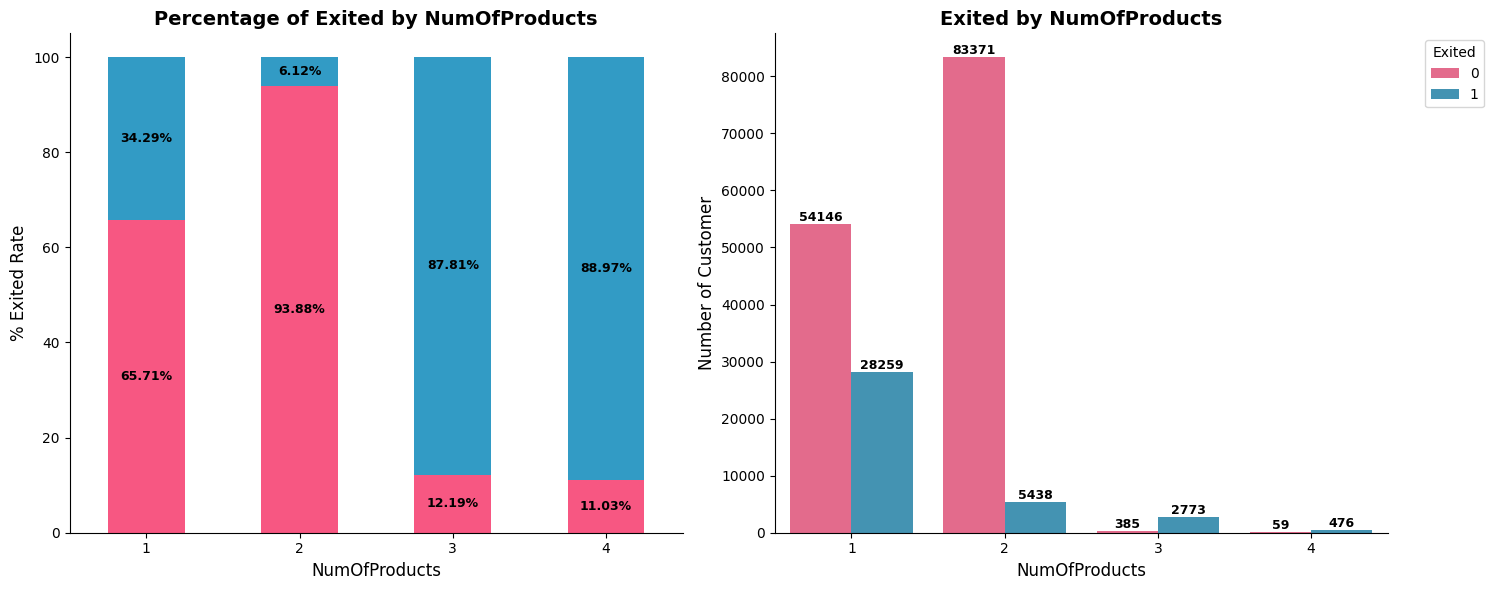


🔍 Chi-Square Test of Independence: 'NumOfProducts' vs. 'Exited'
Chi-squared statistic: 30478.062
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'NumOfProducts' and 'Exited'.

📈 Standardized Residuals:
Exited             0      1
NumOfProducts              
1             -42.57  82.26
2              50.33 -97.26
3             -42.20  81.54
4             -17.67  34.15


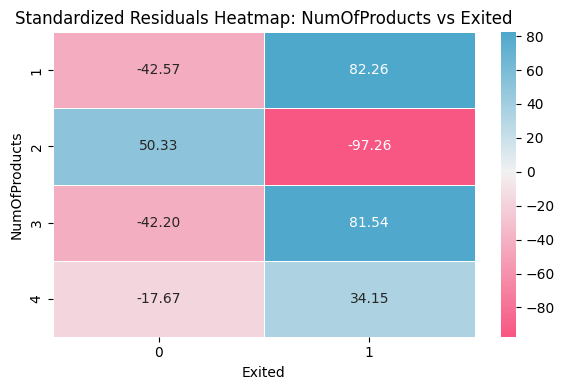

In [31]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_train)

### Insight for Categorical Features by Attrition

`Geography` <br>
- The Chi-Square test reveals a **strong and statistically significant relationship** between customers’ geographical location and their likelihood of leaving the bank.  
- Customers from **Germany show a noticeably higher tendency to leave**, as indicated by a large positive standardized residual (68.73).  
- In contrast, customers from **France and Spain tend to stay more than expected**, especially in France, which shows a large negative residual (-31.53 and -16.84).  
- Therefore, **“Geography” is a highly influential categorical variable** in churn analysis and should be carefully considered in customer retention strategies.

`Gender` <br>
* **Gender is a significant factor influencing customer churn behavior**.
* **Female customers exhibit a higher churn rate** compared to male customers.

This is a clear signal for the business to take action — companies should consider **designing customer retention strategies tailored by gender**, especially focusing on enhancing the satisfaction and engagement of female customers.

`HasCrCard`

Although the churn rate between customers **with a credit card** and **without a credit card** shows only a small difference (22.62% vs. 20.63%), the **Chi-square test** indicates that this difference is **statistically significant** (p-value ≈ 0).

**This means:**
* There is a **statistically significant association** between credit card ownership and customer churn.
* **Standardized residuals** show that customers **without a credit card** churn more than expected (6.80), while those **with a credit card** churn less than expected (-3.91).

`IsActiveMember` <br>
- The chart indicates a **strong association** between customer activity status and their likelihood of leaving the bank.
- **Inactive customers tend to leave more frequently**, while active ones are more likely to stay.
- This suggests that **"IsActiveMember" is a key factor influencing churn** and should be considered in customer retention strategies.

`NumOfProducts` <br>
- There is a **strong and statistically significant relationship** between the number of products a customer uses and their likelihood of leaving the bank.  
- Certain product groups, such as customers using **1, 3, or 4 products**, exhibit **higher-than-expected churn**, based on standardized residuals.  
- The **“NumOfProducts” variable is a critical factor** that should be considered in churn prediction models and customer retention strategies.

| Feature             | Type        | Statistical Test Used | Relationship with Exited | Summary                                                                                             |
| ------------------- | ----------- | --------------------- | ------------------------ | --------------------------------------------------------------------------------------------------- |
| **Geography**       | Categorical | Chi-Square Test       | Significant            | Customers from **Germany** are more likely to churn, **France** and **Spain** less likely to churn. |
| **Gender**          | Categorical | Chi-Square Test       | Significant            | **Female** customers have a higher churn rate than males.                                           |
| **HasCrCard**       | Categorical | Chi-Square Test       | Significant            | Customers **without a credit card** churn more than expected, those **with** churn less.            |
| **IsActiveMember**  | Categorical | Chi-Square Test       | Significant            | **Inactive** customers are more likely to churn.                                                    |
| **NumOfProducts**   | Categorical | Chi-Square Test       | Significant            | Customers with **1, 3, or 4 products** have higher-than-expected churn.                             |
| **CreditScore**     | Numerical   | Mann–Whitney U Test   | Significant            | Non-churned customers have slightly **higher median credit scores** (653 vs. 646).                  |
| **Age**             | Numerical   | Mann–Whitney U Test   | Significant            | Churned customers tend to be **older** (median 45 vs. 36).                                          |
| **Balance**         | Numerical   | Mann–Whitney U Test   | Significant            | Churned customers have a **notably higher median balance** (109,344 vs. 92,063).                    |
| **Tenure**          | Numerical   | Mann–Whitney U Test   | Significant        | The distribution of Tenure between the two groups **differs significantly in a statistical** sense.                         |
| **EstimatedSalary** | Numerical   | Mann–Whitney U Test   | Significant        | The churn group has a **higher median estimated salary**.                                  |


## Multivariate Analysis

(Let's address some business questions)

In [32]:
df_customer_churnma = df_train.copy()

###  Why is the churn rate higher among customers in Germany?

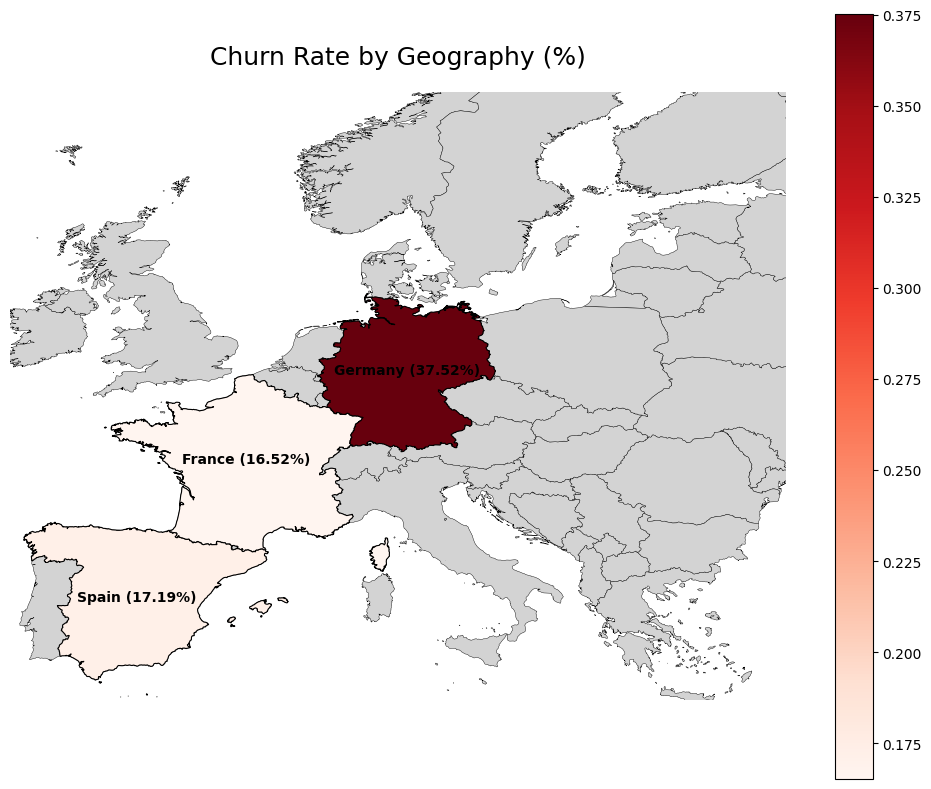

In [33]:
def geography_distribution(df=df_train):
    import geopandas as gpd
    # 1. Calculate churn rate by Geography: mean() = % of customers who exited
    churn_rate_by_geo = df.groupby("Geography")["Exited"].mean()

    # 2. Load geojson file (country names must match the "admin" column)
    world = gpd.read_file("https://raw.githubusercontent.com/daominhthuan42/PYTHON_DATA_ANALYST/refs/heads/main/14_BANK_CHURN_CUSTOMER/custom.geo.json")

    # 3. Map churn rate to each country
    world["churn_rate"] = world["admin"].map(churn_rate_by_geo)

    # 4. Plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw base map (entire Europe in grey)
    world.plot(ax=ax, color="#D3D3D3", edgecolor="black", linewidth=0.3)

    # Highlight countries that have churn data
    highlighted = world[world["churn_rate"].notnull()]
    highlighted.plot(ax=ax, column="churn_rate", cmap="Reds", edgecolor="black", linewidth=0.8, legend=True)

    # Annotate country names and churn rates
    for idx, row in highlighted.iterrows():
        point = row["geometry"].representative_point()
        plt.annotate(
            text=f"{row['admin']} ({row['churn_rate'] * 100:.2f}%)",
            xy=(point.x, point.y),
            ha="center",
            fontsize=10,
            color="black",
            weight="bold"
        )

    ax.set_xlim(-10, 30)
    ax.set_ylim(35, 65)
    ax.axis("off")
    ax.set_title("Churn Rate by Geography (%)", fontsize=18, pad=20)

    plt.tight_layout()
    plt.show()

geography_distribution()

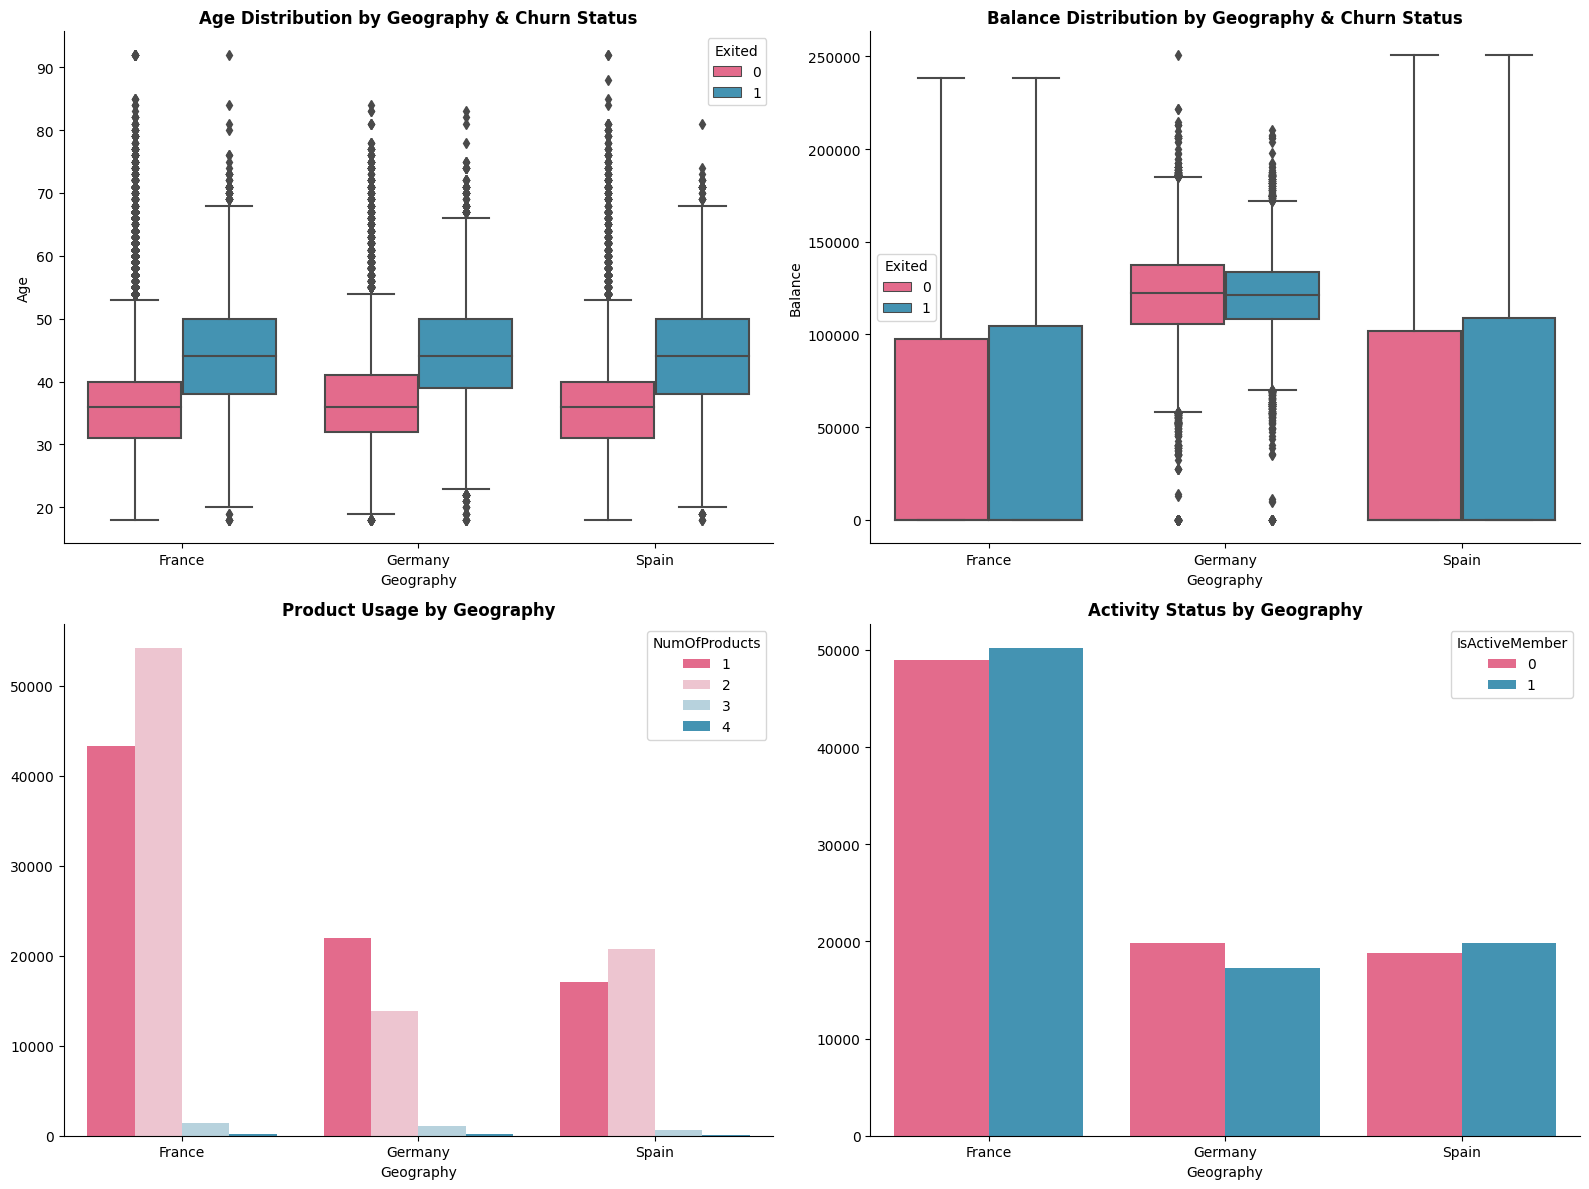

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# A. Age Distribution by Geography & Churn Status
sns.boxplot(x="Geography", y="Age", data=df_customer_churnma, ax=ax[0, 0], hue="Exited", palette=color(n_colors=2),
            order=["France", "Germany", "Spain"],)
ax[0, 0].set_title("Age Distribution by Geography & Churn Status", weight="bold")
ax[0, 0].set_xlabel("Geography")
ax[0, 0].set_ylabel("Age")
sns.despine(left=False, bottom=False, ax=ax[0, 0])

# B. Balance Distribution by Geography & Churn Status
sns.boxplot(x="Geography", y="Balance", data=df_customer_churnma, ax=ax[0, 1], hue="Exited", palette=color(n_colors=2))
ax[0, 1].set_title("Balance Distribution by Geography & Churn Status", weight="bold")
ax[0, 1].set_xlabel("Geography")
ax[0, 1].set_ylabel("Balance")
sns.despine(left=False, bottom=False, ax=ax[0, 1])

# C. Product Usage by Geography
sns.countplot(x="Geography", hue="NumOfProducts", data=df_customer_churnma, ax=ax[1, 0], palette=color(n_colors=4))
ax[1, 0].set_title("Product Usage by Geography", weight="bold")
ax[1, 0].set_xlabel("Geography")
ax[1, 0].set_ylabel("")
sns.despine(left=False, bottom=False, ax=ax[1, 0])

# D. Activity Status by Geography
sns.countplot(x="Geography", hue="IsActiveMember", data=df_customer_churnma, ax=ax[1, 1], palette=color(n_colors=2))
ax[1, 1].set_title("Activity Status by Geography", weight="bold")
ax[1, 1].set_xlabel("Geography")
ax[1, 1].set_ylabel("")
sns.despine(left=False, bottom=False, ax=ax[1, 1])

plt.tight_layout()
plt.show()

**1. Age Profile**

* The **median age** of churned customers in Germany is relatively high (\~45 years), similar to France and Spain.
* However, the **proportion of older customers** (40+) who churn in Germany is more pronounced, and older customers are more likely to leave according to earlier statistical tests.

**2. Balance Levels**

* Churned customers in Germany have **higher account balances** than non-churned ones.
* This aligns with earlier findings that higher balance correlates with higher churn — possibly due to these customers seeking better investment/interest opportunities elsewhere.

**3. Product Usage**

* A **large proportion of German customers** hold **only 1 product**, which is a profile linked with higher churn in the Chi-square analysis.
* Lower product engagement often indicates weaker ties to the bank, making these customers easier to lose.

**4. Activity Status**

* Germany has a **smaller proportion of active members** compared to France, and inactivity is strongly associated with churn.
* This suggests customer engagement in Germany is generally lower.

**Conclusion**

The **higher churn rate in Germany (37.52%)** appears to be driven by a combination of:

1. **Older age distribution** among churned customers.
2. **Higher balances** among those who leave, making them attractive targets for competitors.
3. **Lower product diversity**, with many customers holding only 1 product.
4. **Lower engagement** (activity rates) compared to other regions.

### Should we implement **dedicated retention campaigns** for Germany?

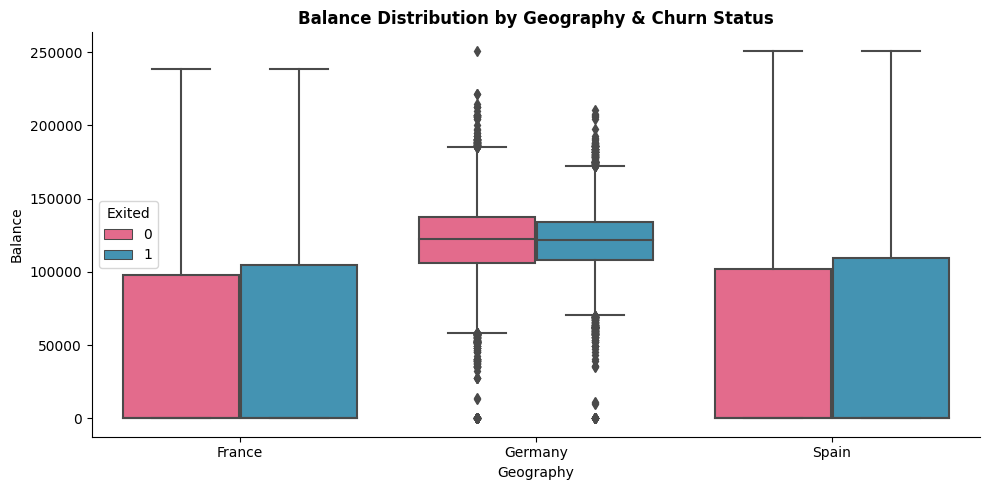

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))

# A. Age Distribution by Geography & Churn Status
sns.boxplot(x="Geography", y="Balance", data=df_customer_churnma, ax=ax, hue="Exited", palette=color(n_colors=2))
ax.set_title("Balance Distribution by Geography & Churn Status", weight="bold")
ax.set_xlabel("Geography")
ax.set_ylabel("Balance")
sns.despine(left=False, bottom=False, ax=ax)

plt.tight_layout()
plt.show()

From the **Balance Distribution by Geography & Churn Status** chart, it is clear that:

* **Customers in Germany** have a **notably higher median account balance** compared to France and Spain, in both churned and non-churned groups.
* The churn rate in Germany is also **significantly higher** (\~37.5%) compared to France (\~16.5%) and Spain (\~17.2%).
* This means there is a **greater risk of losing high-value customers** in Germany.

**Business Conclusion:**

* A **dedicated retention campaign** should be implemented for German customers, especially those with large account balances.
* Campaigns may include **personalized offers, VIP customer service, and enhanced customer experiences** to reduce attrition.

### How do the **needs, expectations, or experiences** of female customers differ from males?

In [36]:
# Create summary table by gender
def gender_churn_summary(df):
    summary = df.groupby("Gender").agg(
        ChurnRate=("Exited", "mean"),
        Avg_Balance=("Balance", "mean"),
        Percent_Inactive=("IsActiveMember", lambda x: (x == 0).mean()),
        Avg_Age=("Age", "mean"),
        Avg_CreditScore = ("CreditScore", "mean"),
        Avg_EstimatedSalary = ("EstimatedSalary", "mean"),
        Count=("Exited", "count")
    ).reset_index()

    # Format percentages for readability
    summary["ChurnRate"] = (summary["ChurnRate"] * 100).round(2)
    summary["Percent_Inactive"] = (summary["Percent_Inactive"] * 100).round(2)
    summary["Avg_Balance"] = summary["Avg_Balance"].round(0)
    summary["Avg_CreditScore"] = summary["Avg_CreditScore"].round(0)
    summary["Avg_EstimatedSalary"] = summary["Avg_EstimatedSalary"].round(0)
    summary["Avg_Age"] = summary["Avg_Age"].round(1)

    return summary

# Apply to the entire dataset
summary_all = gender_churn_summary(df_customer_churnma)

from tabulate import tabulate
print(tabulate(summary_all, headers="keys", tablefmt="github", showindex=False))

| Gender   |   ChurnRate |   Avg_Balance |   Percent_Inactive |   Avg_Age |   Avg_CreditScore |   Avg_EstimatedSalary |   Count |
|----------|-------------|---------------|--------------------|-----------|-------------------|-----------------------|---------|
| Female   |       27.81 |         57661 |              52.01 |      38.8 |               656 |                112287 |   76378 |
| Male     |       15.94 |         55921 |              48.68 |      37.7 |               656 |                111541 |   98529 |


**Gender-based Churn Insights**

* **Churn Rate**: Female customers have a **significantly higher** churn rate compared to male customers (27.81% vs. 15.94%), indicating that gender is an important factor in churn behavior.
* **Account Balance**: On average, female customers have a **slightly higher** account balance than male customers (57,661 vs. 55,921).
* **Activity Level**: Female customers have a higher inactivity rate (52.01% vs. 48.68%), which may contribute to their higher churn rate.
* **Other factors** (Age, CreditScore, EstimatedSalary): Relatively similar between genders.

### Should we design **products/services** better suited for female customers?

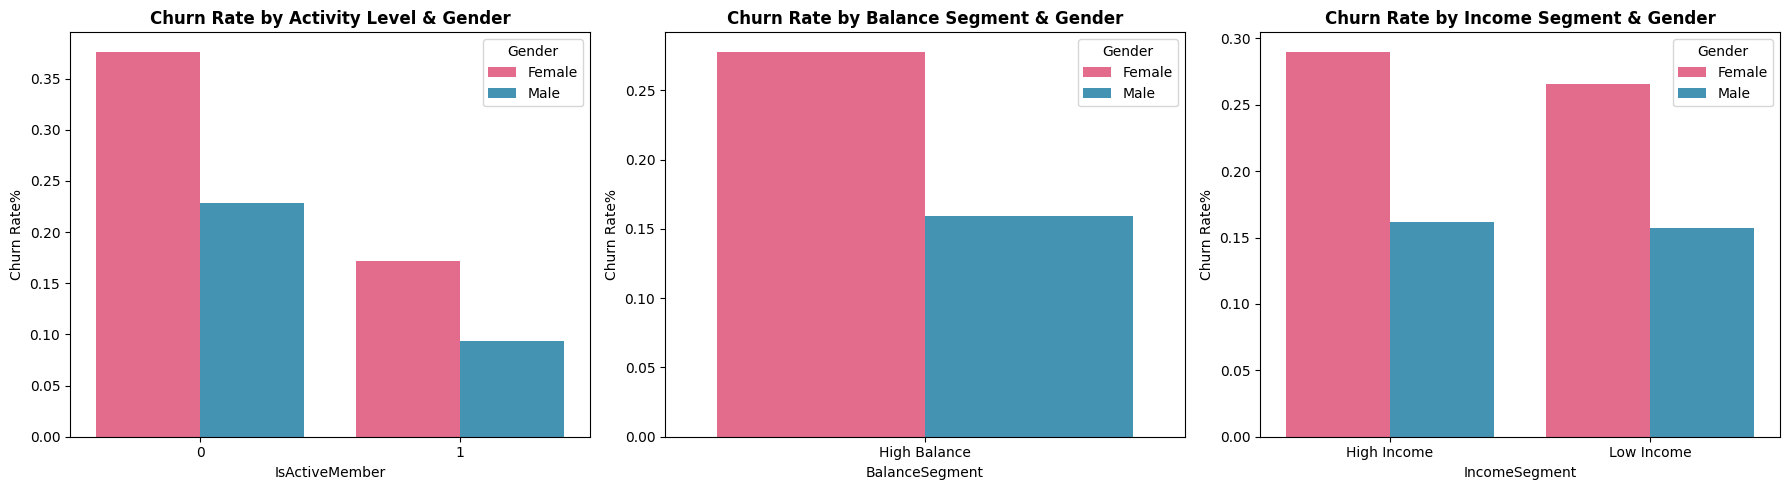

In [37]:
# 1. Create Balance & Income segments (high/low based on median)
balance_median = df_customer_churnma["Balance"].median()
income_median = df_customer_churnma["EstimatedSalary"].median()

df_customer_churnma["BalanceSegment"] = df_customer_churnma["Balance"].apply(lambda x: "High Balance" if x >= balance_median else "Low Balance")
df_customer_churnma["IncomeSegment"] = df_customer_churnma["EstimatedSalary"].apply(lambda x: "High Income" if x >= income_median else "Low Income")

# 2. Churn rate by activity level & gender
churn_activity_gender = (
    df_customer_churnma.groupby(["IsActiveMember", "Gender"])["Exited"]
    .mean()
    .reset_index()
)

# 3. Churn rate by customer value (Balance) & gender
churn_balance_gender = (
    df_customer_churnma.groupby(["BalanceSegment", "Gender"])["Exited"]
    .mean()
    .reset_index()
)

# 4. Churn rate by customer value (Income) & gender
churn_income_gender = (
    df_customer_churnma.groupby(["IncomeSegment", "Gender"])["Exited"]
    .mean()
    .reset_index()
)

# 5. Plot the charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A. Activity vs Gender
sns.barplot(data=churn_activity_gender, x="IsActiveMember", y="Exited", hue="Gender", ax=axes[0], palette=color(n_colors=2))
axes[0].set_title("Churn Rate by Activity Level & Gender", weight="bold")
axes[0].set_ylabel("Churn Rate%")

# B. Balance vs Gender
sns.barplot(data=churn_balance_gender, x="BalanceSegment", y="Exited", hue="Gender", ax=axes[1], palette=color(n_colors=2))
axes[1].set_title("Churn Rate by Balance Segment & Gender", weight="bold")
axes[1].set_ylabel("Churn Rate%")

# C. Income vs Gender
sns.barplot(data=churn_income_gender, x="IncomeSegment", y="Exited", hue="Gender", ax=axes[2], palette=color(n_colors=2))
axes[2].set_title("Churn Rate by Income Segment & Gender", weight="bold")
axes[2].set_ylabel("Churn Rate%")

plt.tight_layout()
plt.show()

* Across all segments, **female customers** consistently exhibit **higher churn rates** than male customers.
* The difference is most pronounced among:

  * **Inactive members**: Female churn rate \~37%, significantly higher than males (\~23%).
  * **High-balance customers**: Female churn rate \~28% vs. male \~16%.
  * **High-income customers**: Female churn rate \~29% vs. male \~16%.
* These segments represent **high-value customers** at greater risk of leaving.

**Recommendation – Tailored Offerings for Female Customers**
* Design **dedicated retention programs** targeting female customers, especially in the inactive, high-balance, and high-income segments.

### Do customers without credit cards share certain characteristics in Balance, Age, NumOfProducts, or IsActiveMember?

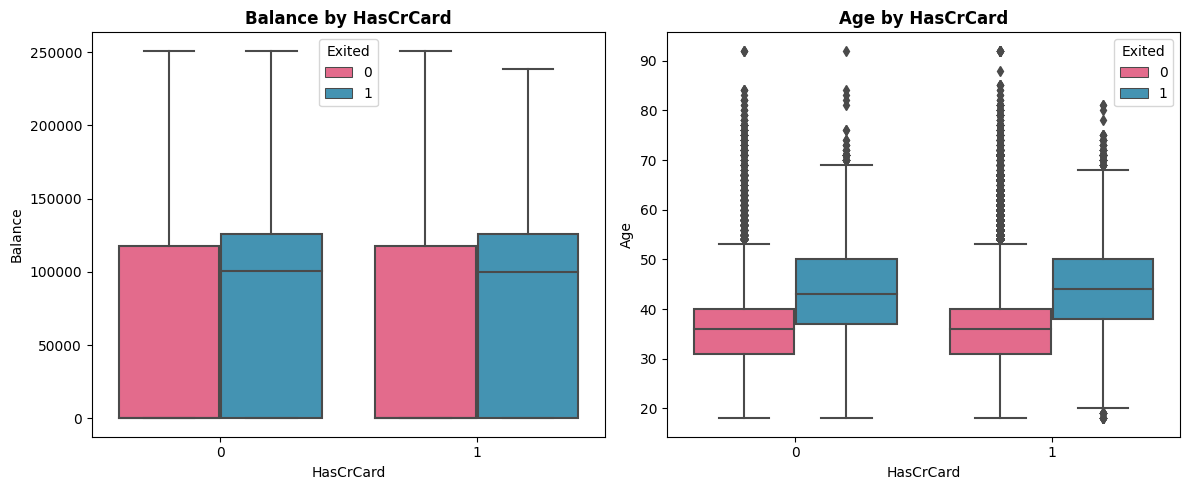

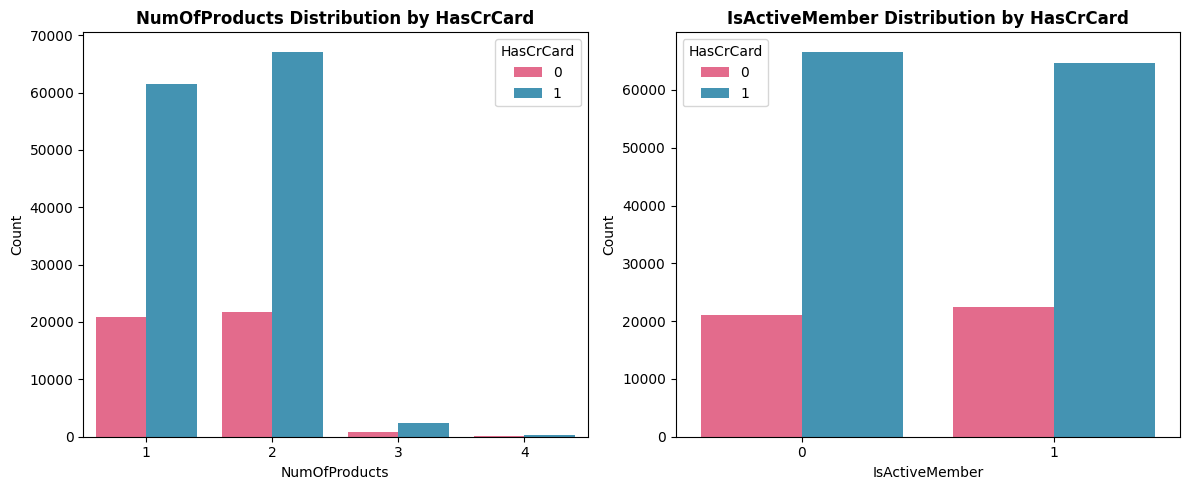

In [38]:
# 2. Boxplot cho Balance và Age
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_customer_churnma, x="HasCrCard", y="Balance", palette=color(n_colors=2), hue="Exited")
plt.title("Balance by HasCrCard", weight="bold")
plt.xlabel("HasCrCard")
plt.ylabel("Balance")

plt.subplot(1,2,2)
sns.boxplot(data=df_customer_churnma, x="HasCrCard", y="Age", palette=color(n_colors=2), hue="Exited")
plt.title("Age by HasCrCard", weight="bold")
plt.xlabel("HasCrCard")
plt.ylabel("Age")

plt.tight_layout()
plt.show()

# 3. Barplot cho NumOfProducts và IsActiveMember
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
num_prod_dist = df_customer_churnma.groupby(["HasCrCard", "NumOfProducts"]).size().reset_index(name="Count")
sns.barplot(data=num_prod_dist, x="NumOfProducts", y="Count", hue="HasCrCard", palette=color(n_colors=2))
plt.title("NumOfProducts Distribution by HasCrCard", weight="bold")

plt.subplot(1,2,2)
active_dist = df_customer_churnma.groupby(["HasCrCard", "IsActiveMember"]).size().reset_index(name="Count")
sns.barplot(data=active_dist, x="IsActiveMember", y="Count", hue="HasCrCard", palette=color(n_colors=2))
plt.title("IsActiveMember Distribution by HasCrCard", weight="bold")

plt.tight_layout()
plt.show()

**Summary answer to the question**

> **Customers without credit cards** do not show significant differences in **Balance** or **Age** compared to those with credit cards. However, they:
>
> * Are less likely to have more than 2 products
> * Have a slightly higher proportion of inactive members.

### Do inactive customers share specific characteristics in CreditScore, Balance, Age, and NumOfProducts?

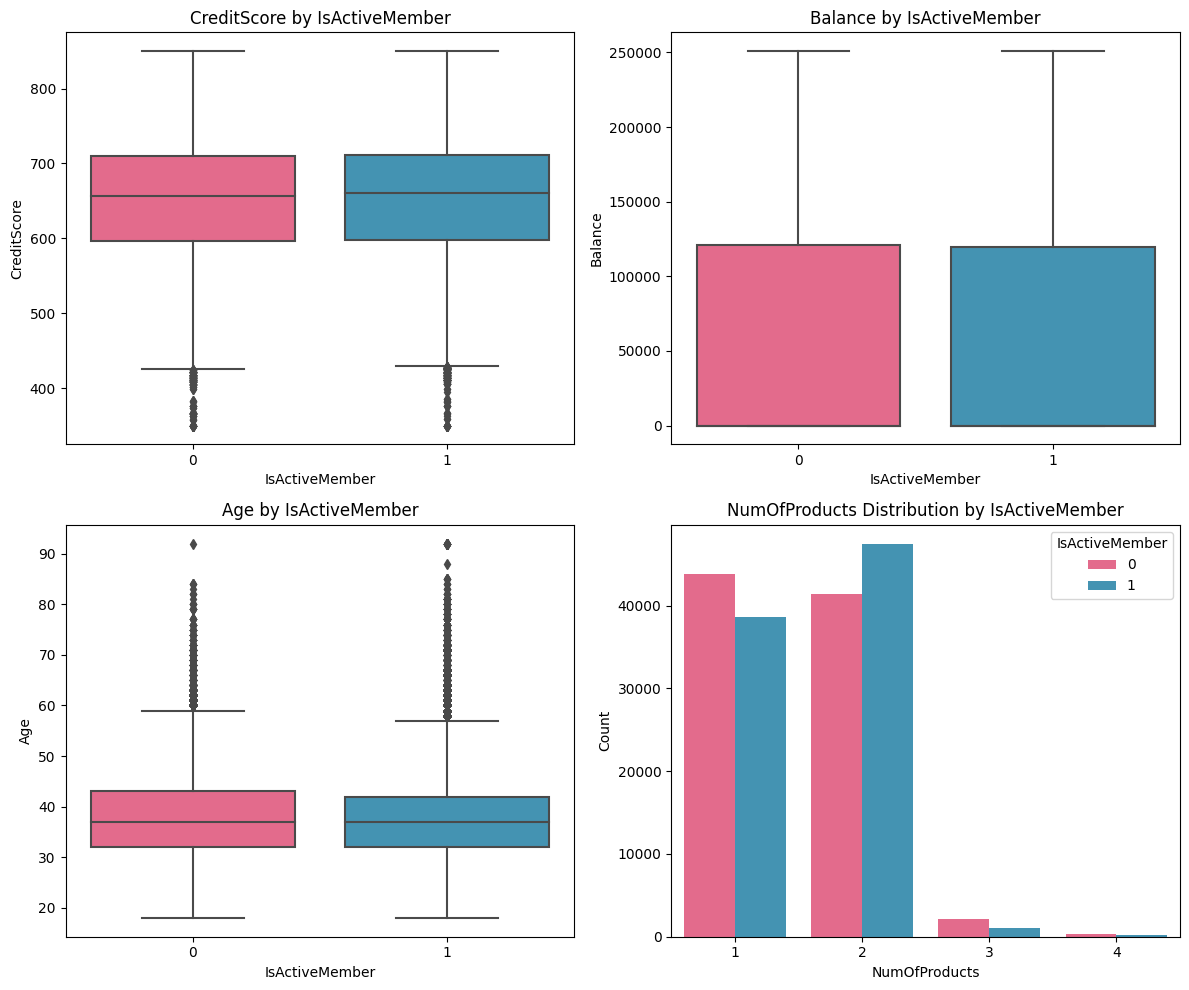

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. CreditScore by IsActiveMember
sns.boxplot(data=df_customer_churnma, x="IsActiveMember", y="CreditScore", palette=color(n_colors=2), ax=axes[0,0])
axes[0,0].set_title("CreditScore by IsActiveMember")
axes[0,0].set_xlabel("IsActiveMember")
axes[0,0].set_ylabel("CreditScore")

# 2. Balance by IsActiveMember
sns.boxplot(data=df_customer_churnma, x="IsActiveMember", y="Balance", palette=color(n_colors=2), ax=axes[0,1])
axes[0,1].set_title("Balance by IsActiveMember")
axes[0,1].set_xlabel("IsActiveMember")
axes[0,1].set_ylabel("Balance")

# 3. Age by IsActiveMember
sns.boxplot(data=df_customer_churnma, x="IsActiveMember", y="Age", palette=color(n_colors=2), ax=axes[1,0])
axes[1,0].set_title("Age by IsActiveMember")
axes[1,0].set_xlabel("IsActiveMember")
axes[1,0].set_ylabel("Age")

# 4. NumOfProducts distribution by IsActiveMember
num_prod_dist = df_customer_churnma.groupby(["IsActiveMember", "NumOfProducts"]).size().reset_index(name="Count")
sns.barplot(data=num_prod_dist, x="NumOfProducts", y="Count", hue="IsActiveMember", palette=color(n_colors=2), ax=axes[1,1])
axes[1,1].set_title("NumOfProducts Distribution by IsActiveMember")
axes[1,1].set_xlabel("NumOfProducts")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()


**Summary answer to the question**

> **Inactive customers** (IsActiveMember = 0) are not significantly different from active customers in terms of **CreditScore**, **Age** and **Balance**.
> However, they:
>
> * Are more concentrated in the single-product segment.

### Are customers with only 1 product typically those with lower CreditScore or lower Balance? 

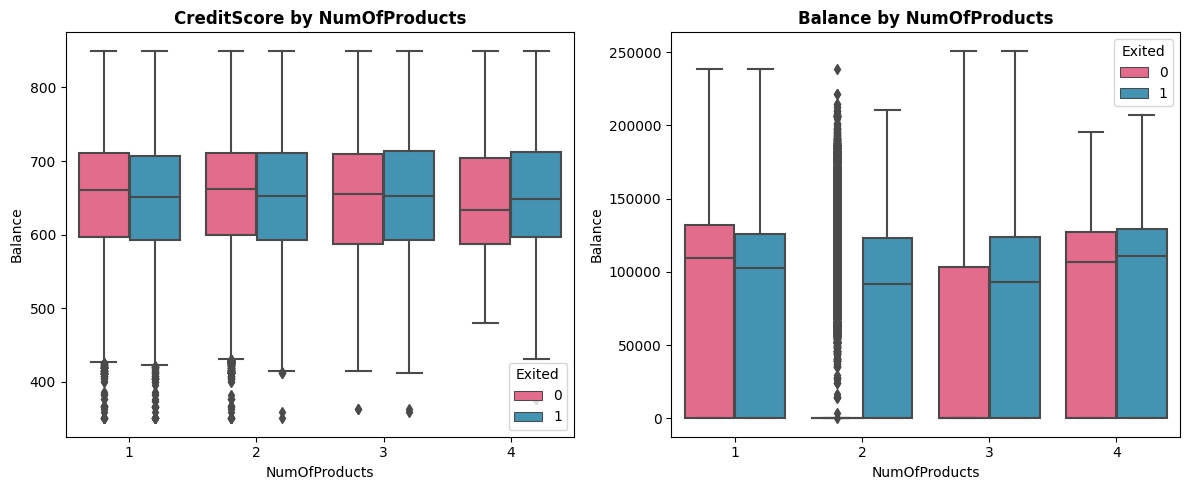

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_customer_churnma, x="NumOfProducts", y="CreditScore", palette=color(n_colors=2), hue="Exited")
plt.title("CreditScore by NumOfProducts", weight="bold")
plt.xlabel("NumOfProducts")
plt.ylabel("Balance")

plt.subplot(1,2,2)
sns.boxplot(data=df_customer_churnma, x="NumOfProducts", y="Balance", palette=color(n_colors=2), hue="Exited")
plt.title("Balance by NumOfProducts", weight="bold")
plt.xlabel("NumOfProducts")
plt.ylabel("Balance")

plt.tight_layout()
plt.show()

**1. CreditScore by NumOfProducts**

* Customers with **only 1 product** do not have noticeably lower CreditScores compared to other groups.
* The median CreditScore for this group is quite similar to those with 2–4 products (\~650–670).

**2. Balance by NumOfProducts**

* The **1-product** group actually has a **high median Balance**, not low — in fact, it’s higher than the 2-product group (since the latter has many customers with a Balance of 0).
* This indicates that having only 1 product **does not imply** weaker financial capacity.

**Conclusion**

> Customers with only 1 product are **not** a group with low CreditScores or low Balances.

### Do customers with 3–4 products have different characteristics compared to the 2-product (low churn) group?

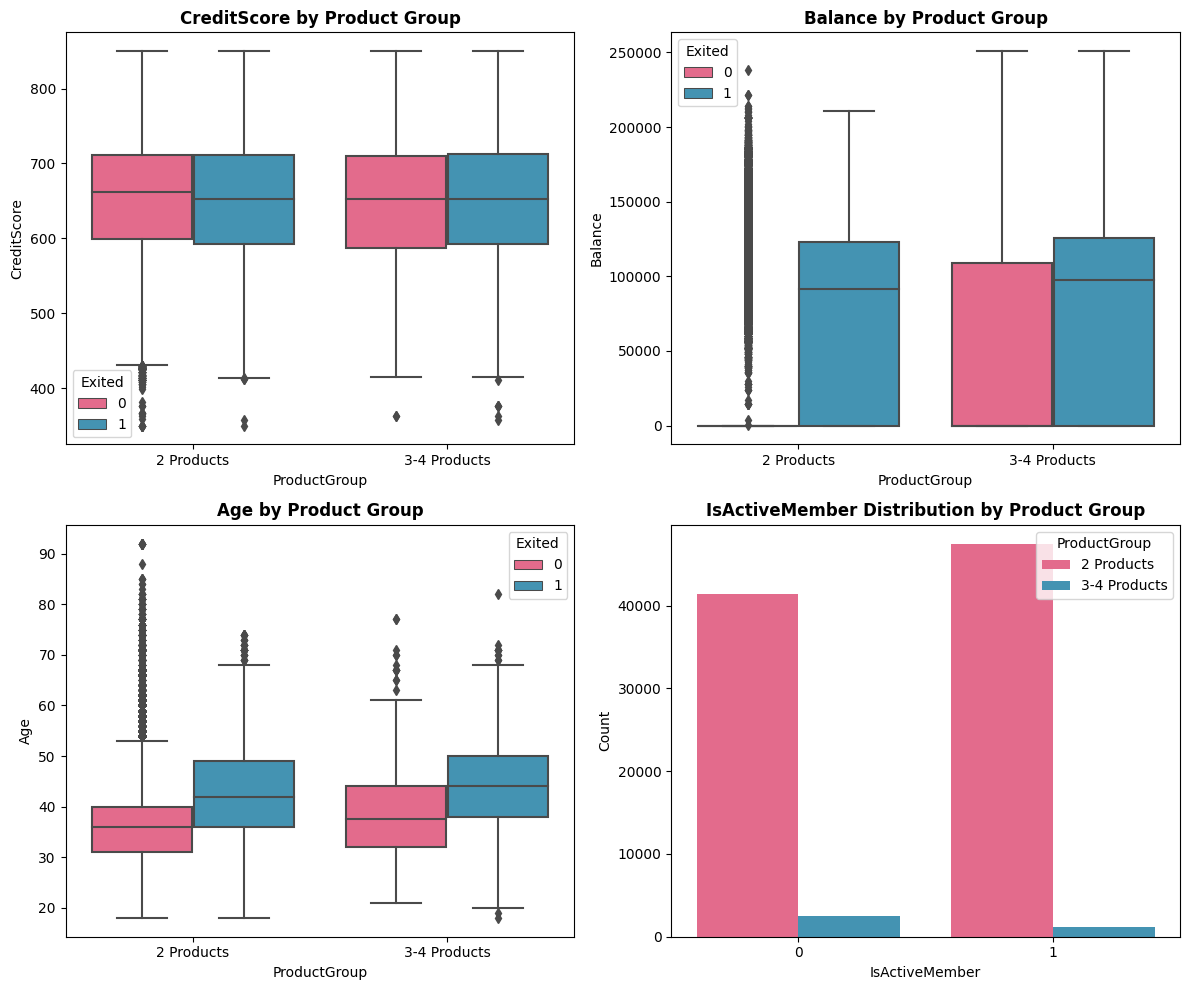

In [41]:
# Filter only the 2-product group and the 3–4 product group
df_compare = df_customer_churnma[df_customer_churnma["NumOfProducts"].isin([2, 3, 4])].copy()
df_compare["ProductGroup"] = df_compare["NumOfProducts"].apply(lambda x: "3-4 Products" if x >= 3 else "2 Products")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. CreditScore
sns.boxplot(data=df_compare, x="ProductGroup", y="CreditScore", palette=color(n_colors=2), hue="Exited", ax=axes[0,0])
axes[0,0].set_title("CreditScore by Product Group", weight="bold")

# 2. Balance
sns.boxplot(data=df_compare, x="ProductGroup", y="Balance", palette=color(n_colors=2), hue="Exited", ax=axes[0,1])
axes[0,1].set_title("Balance by Product Group", weight="bold")

# 3. Age
sns.boxplot(data=df_compare, x="ProductGroup", y="Age", palette=color(n_colors=2), hue="Exited", ax=axes[1,0])
axes[1,0].set_title("Age by Product Group", weight="bold")

# 4. IsActiveMember distribution
active_dist = df_compare.groupby(["ProductGroup", "IsActiveMember"]).size().reset_index(name="Count")
sns.barplot(data=active_dist, x="IsActiveMember", y="Count", hue="ProductGroup", palette=color(n_colors=2), ax=axes[1,1])
axes[1,1].set_title("IsActiveMember Distribution by Product Group", weight="bold")

plt.tight_layout()
plt.show()

**1. CreditScore**

* The median CreditScore for the **3–4 products** group is almost the same as for the **2 products** group.
* In both groups, churned customers (Exited = 1) tend to have lower CreditScores than retained customers.

**2. Balance**

* Both groups have similar Balance distributions, with no significant difference in the median.
* In both groups, churned customers generally have lower Balances than those who stayed.

**3. Age**

* The **3–4 products** group has a **slightly higher** median age compared to the 2 products group.
* In both groups, churned customers tend to be older than retained customers.

**4. IsActiveMember**

* The **3–4 products** group is predominantly **inactive** (IsActiveMember = 0), which is a stark contrast to the 2 products group.
* This is the most notable difference between the two groups and could be the main reason for the higher churn rate in the 3–4 products group.

**Summary Conclusion**

> Compared to the 2 products group (low churn), the 3–4 products group does not differ much in **CreditScore** and **Balance**, and only has a slightly higher **Age**.
> The key difference is that the 3–4 products group has an **high inactive rate**, which could explain its higher churn rate.

### Does churn rate consistently decrease as CreditScore increases?

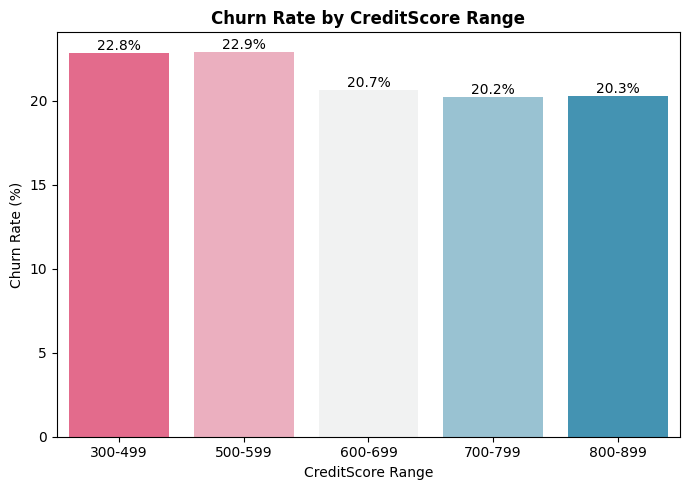

In [42]:
# Divide CreditScore into ranges (bins)
bins = [300, 500, 600, 700, 800, 900]  # adjust as needed
labels = ["300-499", "500-599", "600-699", "700-799", "800-899"]
df_customer_churnma["CS_group"] = pd.cut(df_customer_churnma["CreditScore"], bins=bins, labels=labels, right=False)

# Calculate churn rate for each group
churn_by_group = df_customer_churnma.groupby("CS_group")["Exited"].mean().reset_index()
churn_by_group["Exited"] *= 100  # convert to percentage

# Plot barplot
plt.figure(figsize=(7,5))
sns.barplot(data=churn_by_group, x="CS_group", y="Exited",palette=color(n_colors=5))
plt.title("Churn Rate by CreditScore Range", weight="bold")
plt.ylabel("Churn Rate (%)")
plt.xlabel("CreditScore Range")

# Display percentage values
for i, v in enumerate(churn_by_group["Exited"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

* **Churn rate does not consistently decrease** as CreditScore increases.
* The first two ranges (**300–499** and **500–599**) have similar churn rates (\~22.8–22.9%).
* There is a small drop for **600–699** (\~20.7%) and **700–799** (\~20.2%), but it slightly increases again for **800–899** (\~20.3%).
* Overall, the difference between the highest and lowest churn rate ranges is small (\~2.7 percentage points), suggesting that CreditScore alone is not a strong predictor of churn in this dataset.

### Are there notable patterns when combining CreditScore with Geography or Age?

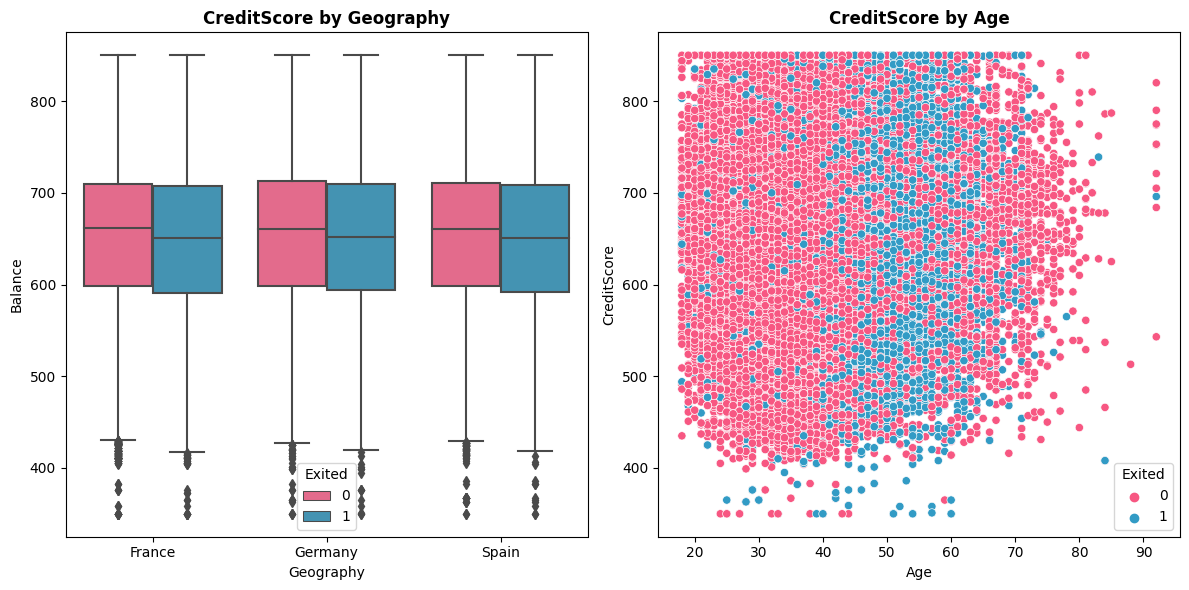

In [43]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data=df_customer_churnma, x="Geography", y="CreditScore", palette=color(n_colors=2), hue="Exited")
plt.title("CreditScore by Geography", weight="bold")
plt.xlabel("Geography")
plt.ylabel("Balance")

plt.subplot(1,2,2)
sns.scatterplot(data=df_customer_churnma, x="Age", y="CreditScore", palette=color(n_colors=2), hue="Exited")
plt.title("CreditScore by Age", weight="bold")
plt.xlabel("Age")
plt.ylabel("CreditScore")

plt.tight_layout()
plt.show()

**1. CreditScore by Geography** (boxplot)

* The median CreditScore is **quite similar** across France, Germany, and Spain.
* In all three countries, churned customers (Exited = 1) tend to have **slightly lower CreditScores** than retained customers, but the difference is small.
* There is **no clear country-specific pattern** in CreditScore that could explain churn rate differences across geographies — meaning Germany’s higher churn rate is likely driven by factors other than CreditScore.

**2. CreditScore by Age** (scatter plot)

* Churned customers (blue) are more concentrated in **middle-aged and older segments**, especially ages **40–65**, regardless of CreditScore.
* There is no strong visible pattern of churn clustering in either **high** or **low** CreditScore bands — churn appears across the entire score range.
* Younger customers (<30) have lower churn density in general, even at lower CreditScores.

**Conclusion**

> When combining CreditScore with Geography or Age:
>
> * Geography: CreditScore distribution is similar across countries; differences in churn rates between countries are likely due to other variables.
> * Age: Churn is more prevalent in middle-aged/older customers, independent of CreditScore level. CreditScore alone does not appear to strongly drive churn in any specific age group.

### Is churn rate linearly related to Age, or is it higher only in certain age groups?

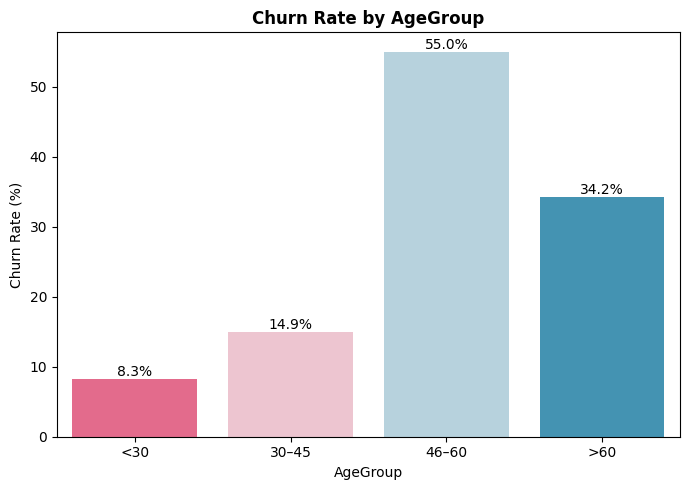

In [44]:
bins = [0, 30, 45, 60, 100]
labels = ["<30", "30–45", "46–60", ">60"]
df_customer_churnma["AgeGroup"] = pd.cut(df_customer_churnma["Age"], bins=bins, labels=labels, right=False)

# Calculate churn rate for each group
churn_by_group = df_customer_churnma.groupby("AgeGroup")["Exited"].mean().reset_index()
churn_by_group["Exited"] *= 100  # convert to percentage

# Plot barplot
plt.figure(figsize=(7,5))
sns.barplot(data=churn_by_group, x="AgeGroup", y="Exited",palette=color(n_colors=4))
plt.title("Churn Rate by AgeGroup", weight="bold")
plt.ylabel("Churn Rate (%)")
plt.xlabel("AgeGroup")

# Display percentage values
for i, v in enumerate(churn_by_group["Exited"]):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

Based on the chart you provided:

* **The churn rate does not increase linearly with age.**
* Churn is low among customers **under 30** (8.3%), rises slightly in the **30–45** group (14.9%), **spikes** in the **46–60** group (55.0%), and then **drops** in the **over 60** group (34.2%).
* This indicates that churn is highest among **middle-aged customers (46–60 years)** rather than increasing steadily with age.

**Conclusion**: The churn rate by age follows a “peak” pattern in the 46–60 group, then decreases for customers over 60. Retention strategies should focus on the 46–60 segment, as it is the highest-risk group.

### Does the high-balance group churn more in all Geographies?

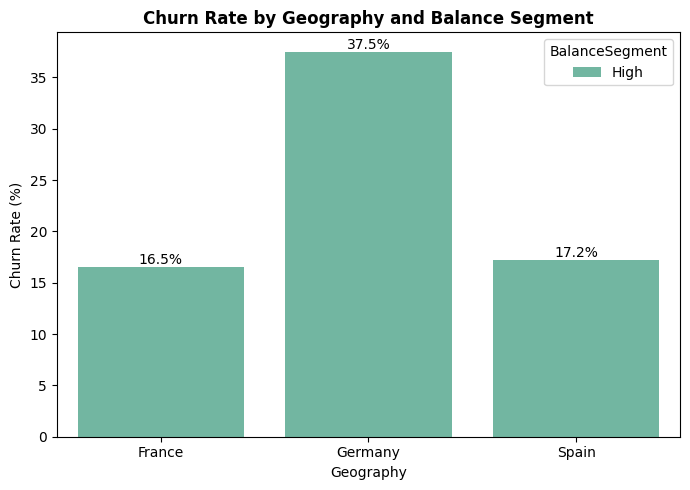

In [45]:
# Split Balance into High/Low based on the overall median
bal_median = df_customer_churnma["Balance"].median()
df_customer_churnma["BalanceSegment"] = np.where(df_customer_churnma["Balance"] >= bal_median, "High", "Low")

# Calculate churn rate
churn_rate = (
    df_customer_churnma.groupby(["Geography", "BalanceSegment"])["Exited"]
    .mean()
    .reset_index()
)
churn_rate["Exited"] *= 100  # convert to percentage

# Plot bar chart
plt.figure(figsize=(7,5))
sns.barplot(data=churn_rate, x="Geography", y="Exited", hue="BalanceSegment", palette="Set2")
plt.title("Churn Rate by Geography and Balance Segment", weight="bold")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Geography")

# Display percentage values
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.text(p.get_x() + p.get_width()/2, p.get_height(),
                 f'{p.get_height():.1f}%',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


Based on the chart you provided:

* In **Germany** and **Spain**, the **high-balance group** does churn more compared to the low-balance group.
* In **France**, the churn rate for the high-balance group is higher than zero, but the low-balance group shows almost no churn (0%), so the gap is significant there as well.
* This suggests that across **all three geographies**, customers with higher balances tend to have a higher churn rate.

**Conclusion**: Yes — the high-balance group has a higher churn rate in all geographies, with the effect being especially pronounced in **Germany**.

### How does the relationship between Balance and IsActiveMember affect churn?

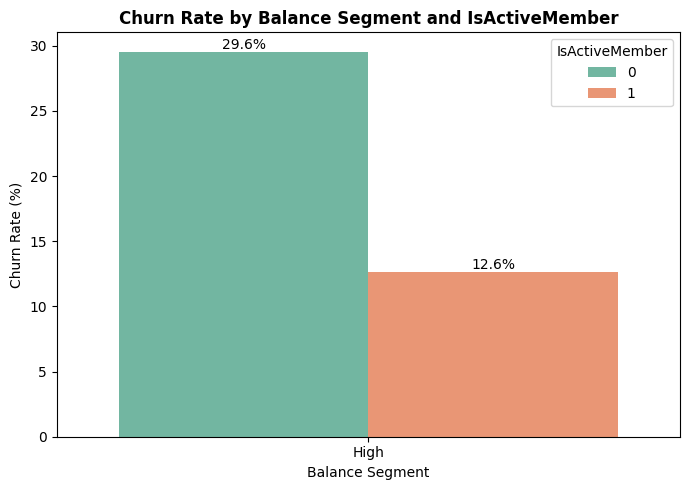

In [46]:
# Create Balance Segment based on the median
bal_median = df_customer_churnma["Balance"].median()
df_customer_churnma["BalanceSegment"] = np.where(df_customer_churnma["Balance"] >= bal_median, "High", "Low")

# Calculate churn rate by BalanceSegment and IsActiveMember
churn_data = (
    df_customer_churnma.groupby(["BalanceSegment", "IsActiveMember"])["Exited"]
    .mean()
    .reset_index()
)
churn_data["Exited"] *= 100  # convert to percentage

# Plot the chart
plt.figure(figsize=(7,5))
sns.barplot(data=churn_data, x="BalanceSegment", y="Exited", hue="IsActiveMember", palette="Set2")
plt.title("Churn Rate by Balance Segment and IsActiveMember", weight="bold")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Balance Segment")

# Display percentage labels
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.text(p.get_x() + p.get_width()/2, p.get_height(), f"{p.get_height():.1f}%",
                 ha="center", va="bottom")

plt.tight_layout()
plt.show()

The chart shows that:

* Within the **High Balance** group, **inactive** customers (IsActiveMember = 0) have a churn rate of **29.6%**, nearly double that of **active** customers (12.6%).
* This indicates that **activity level** is a more critical factor than **account balance** when assessing churn risk.
* In other words, even if customers have high balances, if they are not active, their likelihood of leaving remains high.

### Are there specific Tenure ranges (0–2 years, 7–10 years) with abnormal churn when combined with Geography or Age?

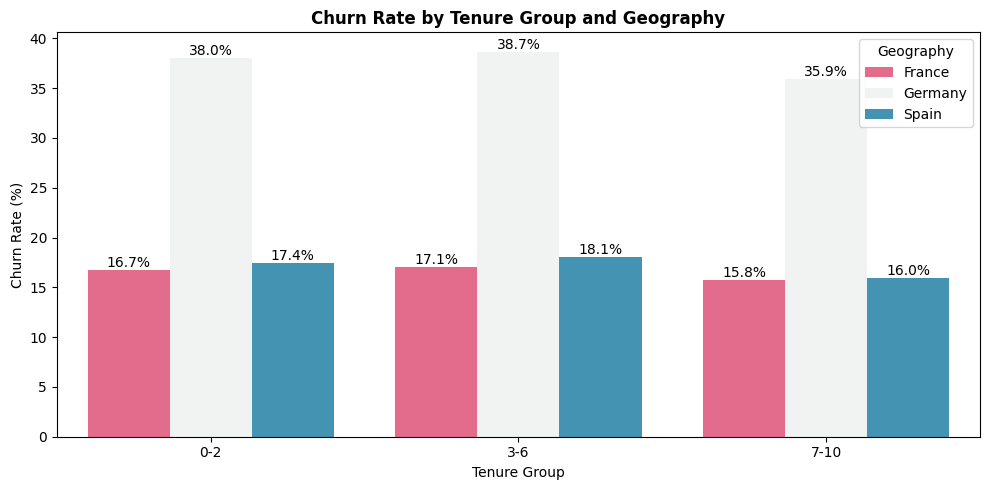

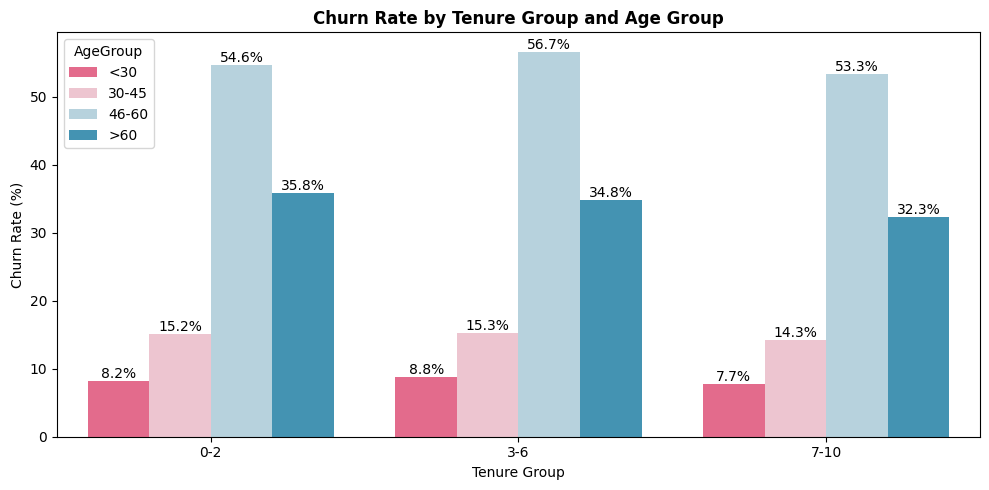

In [47]:
# Tạo TenureGroup
bins = [0, 2, 6, 10]
labels = ["0-2", "3-6", "7-10"]
df_customer_churnma["TenureGroup"] = pd.cut(df_customer_churnma["Tenure"], bins=bins, labels=labels, right=True, include_lowest=True)

# Tạo AgeGroup
bins_age = [0, 30, 45, 60, 100]
labels_age = ["<30", "30-45", "46-60", ">60"]
df_customer_churnma["AgeGroup"] = pd.cut(df_customer_churnma["Age"], bins=bins_age, labels=labels_age, right=False)

# ===== 1) Churn rate theo TenureGroup × Geography =====
churn_geo = (
    df_customer_churnma.groupby(["TenureGroup", "Geography"])["Exited"]
    .mean()
    .reset_index()
)
churn_geo["Exited"] *= 100

plt.figure(figsize=(10,5))
sns.barplot(data=churn_geo, x="TenureGroup", y="Exited", hue="Geography", palette=color(n_colors=3))
plt.title("Churn Rate by Tenure Group and Geography", weight="bold")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Tenure Group")
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.text(p.get_x() + p.get_width()/2, p.get_height(), f"{p.get_height():.1f}%",
                 ha="center", va="bottom")
plt.tight_layout()
plt.show()

# ===== 2) Churn rate theo TenureGroup × AgeGroup =====
churn_age = (
    df_customer_churnma.groupby(["TenureGroup", "AgeGroup"])["Exited"]
    .mean()
    .reset_index()
)
churn_age["Exited"] *= 100

plt.figure(figsize=(10,5))
sns.barplot(data=churn_age, x="TenureGroup", y="Exited", hue="AgeGroup", palette=color(n_colors=4))
plt.title("Churn Rate by Tenure Group and Age Group", weight="bold")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Tenure Group")
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.text(p.get_x() + p.get_width()/2, p.get_height(), f"{p.get_height():.1f}%",
                 ha="center", va="bottom")
plt.tight_layout()
plt.show()

* For **Geography**, both **0–2 years** and **7–10 years** Tenure groups show no significant churn differences across countries — the pattern is fairly stable, with Germany consistently having higher churn.
* For **Age**, the **46–60** and **>60** age groups have high churn regardless of Tenure length, so there’s no specific Tenure group that stands out as “unusual” when combined with Age.

**In summary**: <br>
**There is no clear evidence of an unusual Tenure group when combined with Geography or Age** — churn seems to be mainly driven by Age and Geography themselves.

### Is there any relationship between EstimatedSalary and other variables (Balance, CreditScore) that helps explain churn?

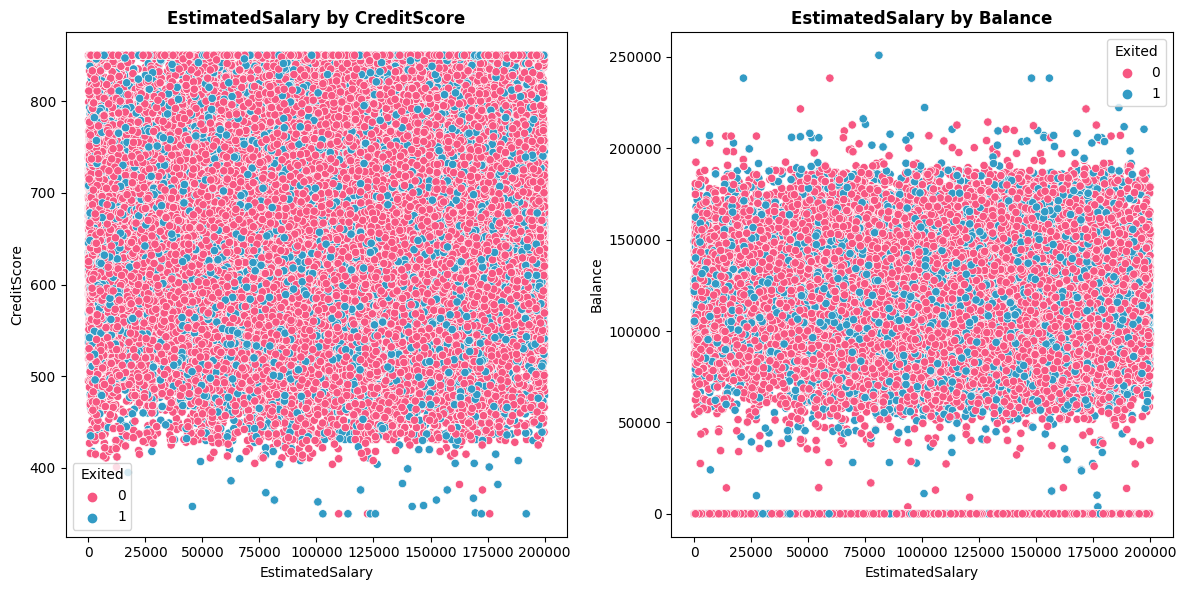

In [48]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_customer_churnma, x="EstimatedSalary", y="CreditScore", palette=color(n_colors=2), hue="Exited")
plt.title("EstimatedSalary by CreditScore", weight="bold")
plt.xlabel("EstimatedSalary")
plt.ylabel("CreditScore")

plt.subplot(1,2,2)
sns.scatterplot(data=df_customer_churnma, x="EstimatedSalary", y="Balance", palette=color(n_colors=2), hue="Exited")
plt.title("EstimatedSalary by Balance", weight="bold")
plt.xlabel("EstimatedSalary")
plt.ylabel("Balance")

plt.tight_layout()
plt.show()

* **EstimatedSalary vs CreditScore**: The data points are evenly distributed, with no clear trend. Both churned and non-churned customers are spread across all salary levels and credit scores.
* **EstimatedSalary vs Balance**: Similarly, there is no strong correlation; the distribution is scattered and uniform, with no distinct clusters for churned customers.

**Conclusion**: <br>
**There is no significant relationship between EstimatedSalary and either Balance or CreditScore that explains churn**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>

## Feature Engineering

In [49]:
# Credit Utilization
df_train["CreditUtilization"] = df_train["Balance"] / df_train["EstimatedSalary"]
df_test["CreditUtilization"] = df_test["Balance"] / df_test["EstimatedSalary"]

# CreditScore per Age
df_train["CreditScorePerAge"] = df_train["CreditScore"] / df_train["Age"]
df_test["CreditScorePerAge"] = df_test["CreditScore"] / df_test["Age"]

# HighBalance_Inactive
bal_median_train = df_train["Balance"].median()
bal_median_test = df_test["Balance"].median()
df_train["HighBalance_Inactive"] = ((df_train["Balance"] >= bal_median_train) & (df_train["IsActiveMember"] == 0)).astype(int)
df_test["HighBalance_Inactive"] = ((df_test["Balance"] >= bal_median_test) & (df_test["IsActiveMember"] == 0)).astype(int)

🔎 D’Agostino and Pearson Normality Test for 'CreditUtilization' across 'Exited' groups

 Group: 0 (n = 137961)
  Statistic : 580496.991
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 36946)
  Statistic : 150603.017
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'CreditUtilization' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 2149684232.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'CreditUtilization' than Group '0'.


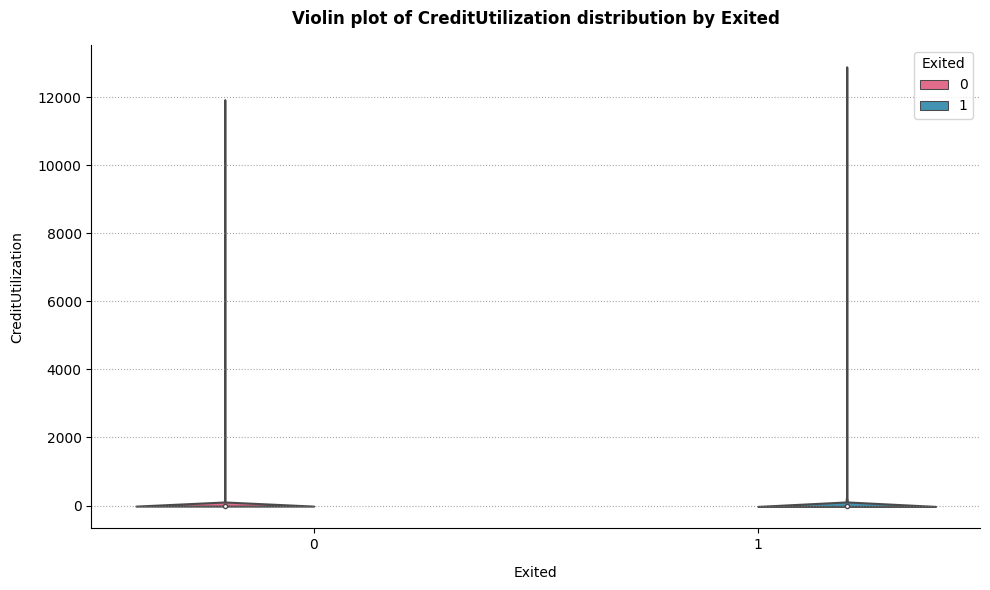

In [50]:
display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of CreditUtilization by Exited</b></h2>"))
plot_numerical_distribution_by_Exited(feature="CreditUtilization", df_train=df_train, target_feature="Exited")

🔎 D’Agostino and Pearson Normality Test for 'CreditScorePerAge' across 'Exited' groups

 Group: 0 (n = 137961)
  Statistic : 11483.485
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 36946)
  Statistic : 8030.257
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'CreditScorePerAge' by 'Exited'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 3685073838.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '0' has a higher median 'CreditScorePerAge' than Group '1'.


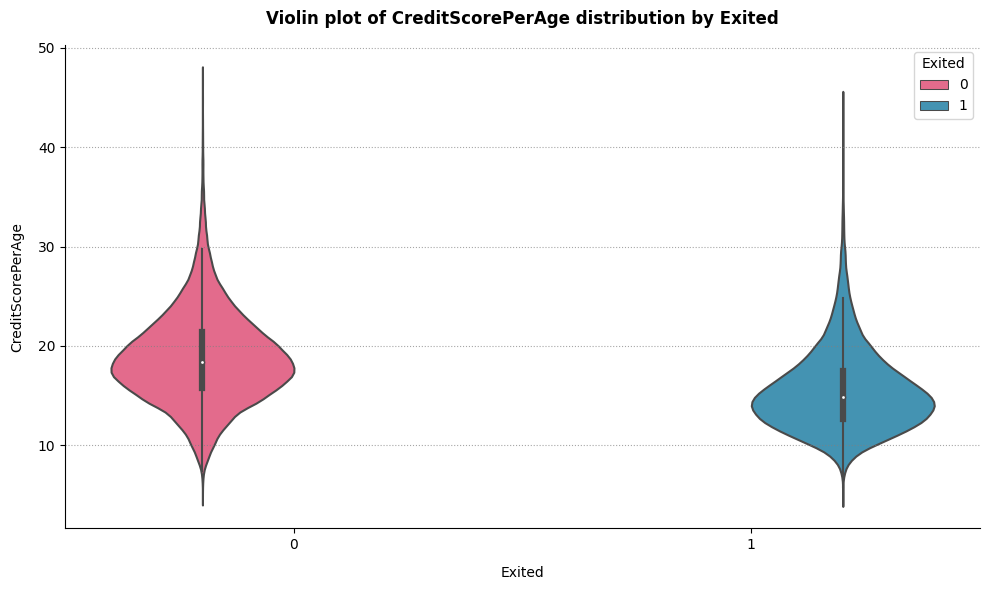

In [51]:
display(HTML(f"<h2 style='text-align:center; font-size:22px; color:green;'><b>Distribution of CreditScorePerAge by Exited</b></h2>"))
plot_numerical_distribution_by_Exited(feature="CreditScorePerAge", df_train=df_train, target_feature="Exited")

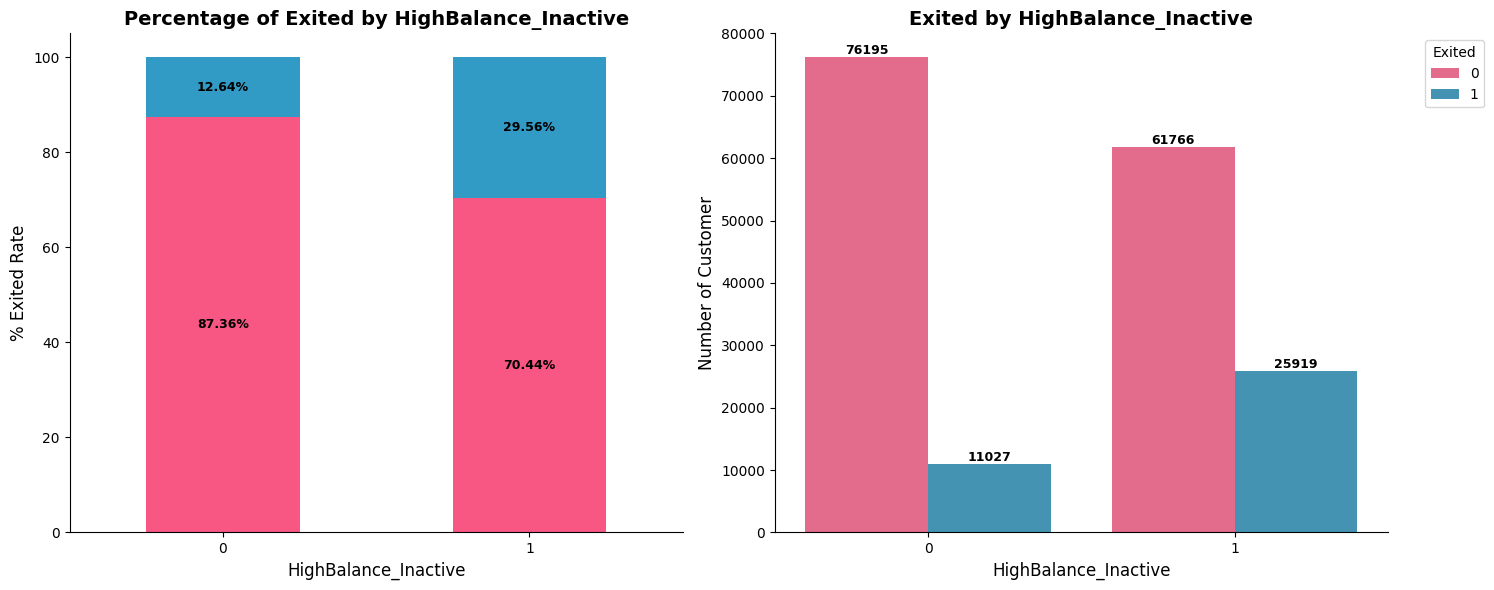


🔍 Chi-Square Test of Independence: 'HighBalance_Inactive' vs. 'Exited'
Chi-squared statistic: 7509.494
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'HighBalance_Inactive' and 'Exited'.

📈 Standardized Residuals:
Exited                    0      1
HighBalance_Inactive              
0                     28.20 -54.50
1                    -28.13  54.35


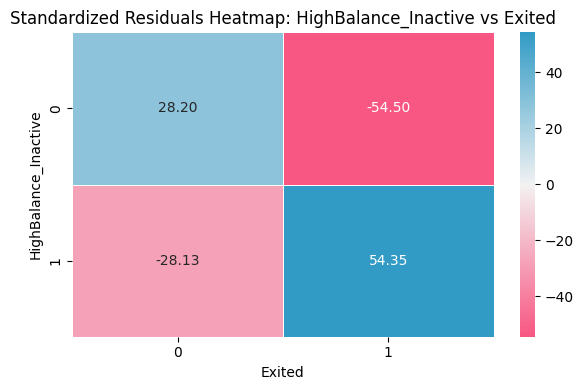

In [52]:
bivariate_percent_plot(cat="HighBalance_Inactive", df=df_train)

`CreditUtilization` <br>
* There is a statistically significant difference in credit utilization between customers who churned and those who did not (p-value ≈ 0).
* The churn group has a higher median credit utilization  (0.689 vs. 0).

-> This indicates that the exited group has a higher level of credit compared to the retained group.

`CreditScorePerAge` <br>
* There is a statistically significant difference in CreditScorePerAge between the two groups, with the retained group having a higher CreditScorePerAge than the exited group.

`HighBalance_Inactive` <br>
* There is a significant association between `HighBalance_Inactive` and churn. Customers with high account balances but inactive status churn at a much higher rate than expected.

| Feature                   | Type        | Statistical Test Used | Relationship with Exited | Summary                                                                                                 |
| ------------------------- | ----------- | --------------------- | ------------------------ | ------------------------------------------------------------------------------------------------------- |
| **Geography**             | Categorical | Chi-Square Test       | Significant              | Customers from **Germany** are more likely to churn, **France** and **Spain** less likely to churn.     |
| **Gender**                | Categorical | Chi-Square Test       | Significant              | **Female** customers have a higher churn rate than males.                                               |
| **HasCrCard**             | Categorical | Chi-Square Test       | Significant              | Customers **without a credit card** churn more than expected, those **with** churn less.                |
| **IsActiveMember**        | Categorical | Chi-Square Test       | Significant              | **Inactive** customers are more likely to churn.                                                        |
| **NumOfProducts**         | Categorical | Chi-Square Test       | Significant              | Customers with **1, 3, or 4 products** have higher-than-expected churn.                                 |
| **HighBalance\_Inactive** | Categorical | Chi-Square Test       | Significant              | Customers with **high account balances but inactive status** churn at a much higher rate than expected. |
| **CreditScore**           | Numerical   | Mann–Whitney U Test   | Significant              | Non-churned customers have slightly **higher median credit scores** (653 vs. 646).                      |
| **CreditUtilization**     | Numerical   | Mann–Whitney U Test   | Significant              | Churned customers have a **higher median credit utilization** (0.689 vs. 0).                            |
| **CreditScorePerAge**     | Numerical   | Mann–Whitney U Test   | Significant              | Non-churned customers have a **higher median CreditScorePerAge** than churned customers.                |
| **Age**                   | Numerical   | Mann–Whitney U Test   | Significant              | Churned customers tend to be **older** (median 45 vs. 36).                                              |
| **Balance**               | Numerical   | Mann–Whitney U Test   | Significant              | Churned customers have a **notably higher median balance** (109,344 vs. 92,063).                        |
| **Tenure**                | Numerical   | Mann–Whitney U Test   | Significant              | The distribution of Tenure between the two groups **differs significantly** in a statistical sense.     |
| **EstimatedSalary**       | Numerical   | Mann–Whitney U Test   | Significant              | The churn group has a **higher median estimated salary**.                                               |

## Handling Skewness

In [53]:
num_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "CreditUtilization", "CreditScorePerAge"]
skew_feature_train, skew_train_df = check_skewness(data=df_train, dataset_name="Train Data",
                                                   numerical_features=num_features)


🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
CreditUtilization              | +118.0873 | Highly skewed
Age                            |   +0.9793 | Moderately skewed
CreditScorePerAge              |   +0.6833 | Moderately skewed
Balance                        |   +0.3505 | Approximately symmetric
EstimatedSalary                |   -0.2949 | Approximately symmetric
CreditScore                    |   -0.0660 | Approximately symmetric
Tenure                         |   +0.0066 | Approximately symmetric
----------------------------------------------------------------------


In [54]:
skew_feature_test, skew_test_df = check_skewness(data=df_test, dataset_name="Test Data",
                                                 numerical_features=num_features)


🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
CreditUtilization              | +119.4261 | Highly skewed
Age                            |   +0.9724 | Moderately skewed
CreditScorePerAge              |   +0.6891 | Moderately skewed
Balance                        |   +0.3852 | Approximately symmetric
EstimatedSalary                |   -0.3053 | Approximately symmetric
CreditScore                    |   -0.0624 | Approximately symmetric
Tenure                         |   +0.0213 | Approximately symmetric
----------------------------------------------------------------------


In [55]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()
    
    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            print("AAA")
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [56]:
processed_train_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_train, num_features=skew_feature_train)
num_features = ["CreditScore", "PT_Age", "Tenure", "Balance", "EstimatedSalary", "PT_CreditUtilization", "PT_CreditScorePerAge"]
skew_feature_train, skew_train_df = check_skewness(data=processed_train_df, dataset_name="Train Data", numerical_features=num_features)


🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_CreditUtilization           |   +0.4110 | Approximately symmetric
Balance                        |   +0.3505 | Approximately symmetric
EstimatedSalary                |   -0.2949 | Approximately symmetric
CreditScore                    |   -0.0660 | Approximately symmetric
Tenure                         |   +0.0066 | Approximately symmetric
PT_Age                         |   -0.0061 | Approximately symmetric
PT_CreditScorePerAge           |   +0.0024 | Approximately symmetric
----------------------------------------------------------------------


In [57]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test = handle_skewed_features(df=df_test, num_features=skew_feature_test)
skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=num_features, dataset_name= "Test data")


🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_CreditUtilization           |   +0.4307 | Approximately symmetric
Balance                        |   +0.3852 | Approximately symmetric
EstimatedSalary                |   -0.3053 | Approximately symmetric
CreditScore                    |   -0.0624 | Approximately symmetric
Tenure                         |   +0.0213 | Approximately symmetric
PT_Age                         |   -0.0063 | Approximately symmetric
PT_CreditScorePerAge           |   +0.0026 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_combined_df` and `processed_test_df`):**

🔴 **Skewed**:

* The features `CreditUtilization`, `CreditScorePerAge`, `Age` exhibit skewness.

✅ **Approximately Symmetric**:

* Several features, such as:

  * `PT_CreditScorePerAge `, `PT_Age` and `PT_CreditUtilization` close to zero.
  * This indicates that **Yeo-Johnson transformation was effective** for this feature.

## Re-check Outlier

In [58]:
checking_outlier(list_feature=num_features, df=processed_train_df, dataset_name="Training data")

🔍 Training data Checking outlier


Feature  Outlier Count
0           CreditScore            330
1                PT_Age           3503
2  PT_CreditScorePerAge           2024

In [59]:
checking_outlier(list_feature=num_features, df=processed_test_df, dataset_name="Test data")

🔍 Test data Checking outlier


Feature  Outlier Count
0           CreditScore            176
1                PT_Age           2091
2  PT_CreditScorePerAge           1321

**Insight**

***Both the training and test datasets contain outliers in four features: `CreditScore`, `PT_Age`, `PT_CreditScorePerAge`. We will use RobustScaler to reduce the impact of these outliers.***

## Create Test Set

Suppose we chatted with experts who told us that the **EstimatedSalary** is a very important attribute to predict **Exited**. We may want to ensure that the test set is representative of the various categories of **EstimatedSalary** in the whole dataset. Since the **EstimatedSalary** is a continuous numerical attribute, we first need to create an category attribute.

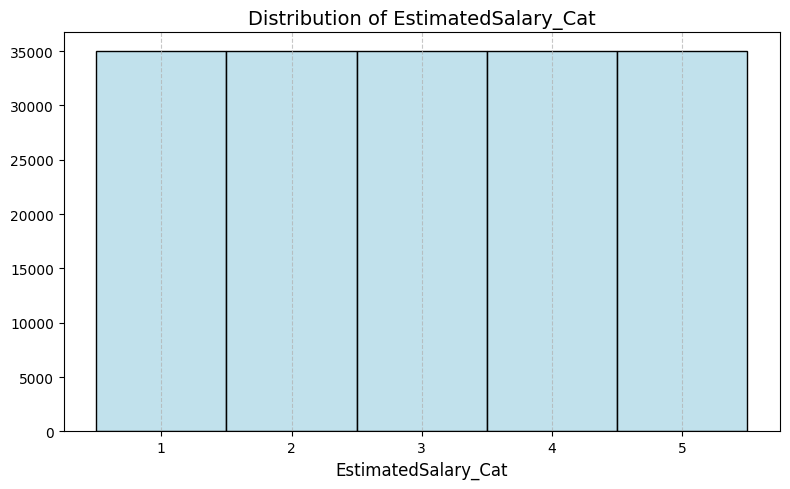

In [60]:
processed_train_df["EstimatedSalary_Cat"] = pd.qcut(processed_train_df["EstimatedSalary"],
                                              q=5,
                                              labels=[1, 2, 3, 4, 5])

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_train_df, x="EstimatedSalary_Cat", color="lightblue", edgecolor="black")

plt.title("Distribution of EstimatedSalary_Cat", fontsize=14)
plt.xlabel("EstimatedSalary_Cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [61]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_train_df, processed_train_df["EstimatedSalary_Cat"]):
    start_train_set = processed_train_df.iloc[train_index]
    start_test_set = processed_train_df.iloc[test_index]

## Scale and Ecode

In [62]:
# Now we should remove the EstimatedSalary_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("EstimatedSalary_Cat", axis=1, inplace=True)

In [63]:
df_train_new = start_train_set.drop("Exited", axis=1)
df_train_label_new = start_train_set["Exited"].copy()

In [64]:
list_feature_num_robust = ["CreditScore","PT_Age", "PT_CreditScorePerAge"]
list_feature_num_stand = ["Tenure", "Balance", "EstimatedSalary", "PT_CreditUtilization"]
list_feature_cat_onehot = ["Geography", "Gender", "NumOfProducts"]
list_feature_cat_keep = ["HasCrCard", "IsActiveMember", "HighBalance_Inactive"]

In [65]:
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

cat_keep_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

In [66]:
preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot),
    ("cat_keep", cat_keep_transformer, list_feature_cat_keep),
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['CreditScore', 'PT_Age',
                                  'PT_CreditScorePerAge']),
                                ('num_standard',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Tenure', 'Balance', 'EstimatedSalary',
                                  'PT_CreditUtilization']),
                                ('cat_onehot',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Geography', 'Gender', 'NumOfProducts']),
                                ('cat_keep',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['HasCrCard', 'IsActiveMember',
                                  'HighBalance_Inactive'])])

In [67]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__CreditScore',
 'num_robust__PT_Age',
 'num_robust__PT_CreditScorePerAge',
 'num_standard__Tenure',
 'num_standard__Balance',
 'num_standard__EstimatedSalary',
 'num_standard__PT_CreditUtilization',
 'cat_onehot__Geography_France',
 'cat_onehot__Geography_Germany',
 'cat_onehot__Geography_Spain',
 'cat_onehot__Gender_Female',
 'cat_onehot__Gender_Male',
 'cat_onehot__NumOfProducts_1',
 'cat_onehot__NumOfProducts_2',
 'cat_onehot__NumOfProducts_3',
 'cat_onehot__NumOfProducts_4',
 'cat_keep__HasCrCard',
 'cat_keep__IsActiveMember',
 'cat_keep__HighBalance_Inactive']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Comparison Models</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Comparison Models
    </h1>
</div>

In [68]:
class_1 = df_train_label_new.sum()
class_0 = len(df_train_label_new) - class_1
scale_pos_weight = class_0 / class_1

In [69]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=seed, class_weight="balanced"),    
    SVC(kernel="rbf", random_state=seed, class_weight="balanced"),
    KNeighborsClassifier(metric="minkowski", p=2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed, class_weight="balanced"),
    DecisionTreeClassifier(max_depth=5, random_state=seed, class_weight="balanced"),
    RandomForestClassifier(n_estimators=100, random_state=seed, class_weight="balanced"),
    ExtraTreesClassifier(random_state=seed, class_weight="balanced"),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(
        n_estimators=2000, max_depth=4, eval_metric="logloss", random_state=seed,
        min_child_weight=2, gamma=0.9, subsample=0.8, colsample_bytree=0.8,
        objective="binary:logistic", nthread=-1, scale_pos_weight=scale_pos_weight 
    ),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter, class_weight="balanced"),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold, class_weight="balanced"),
    CatBoostClassifier(verbose=0, random_seed=seed, auto_class_weights="Balanced"),
    BaggingClassifier(random_state=seed),
    HistGradientBoostingClassifier(random_state=seed, class_weight="balanced", max_iter=max_iter)
]

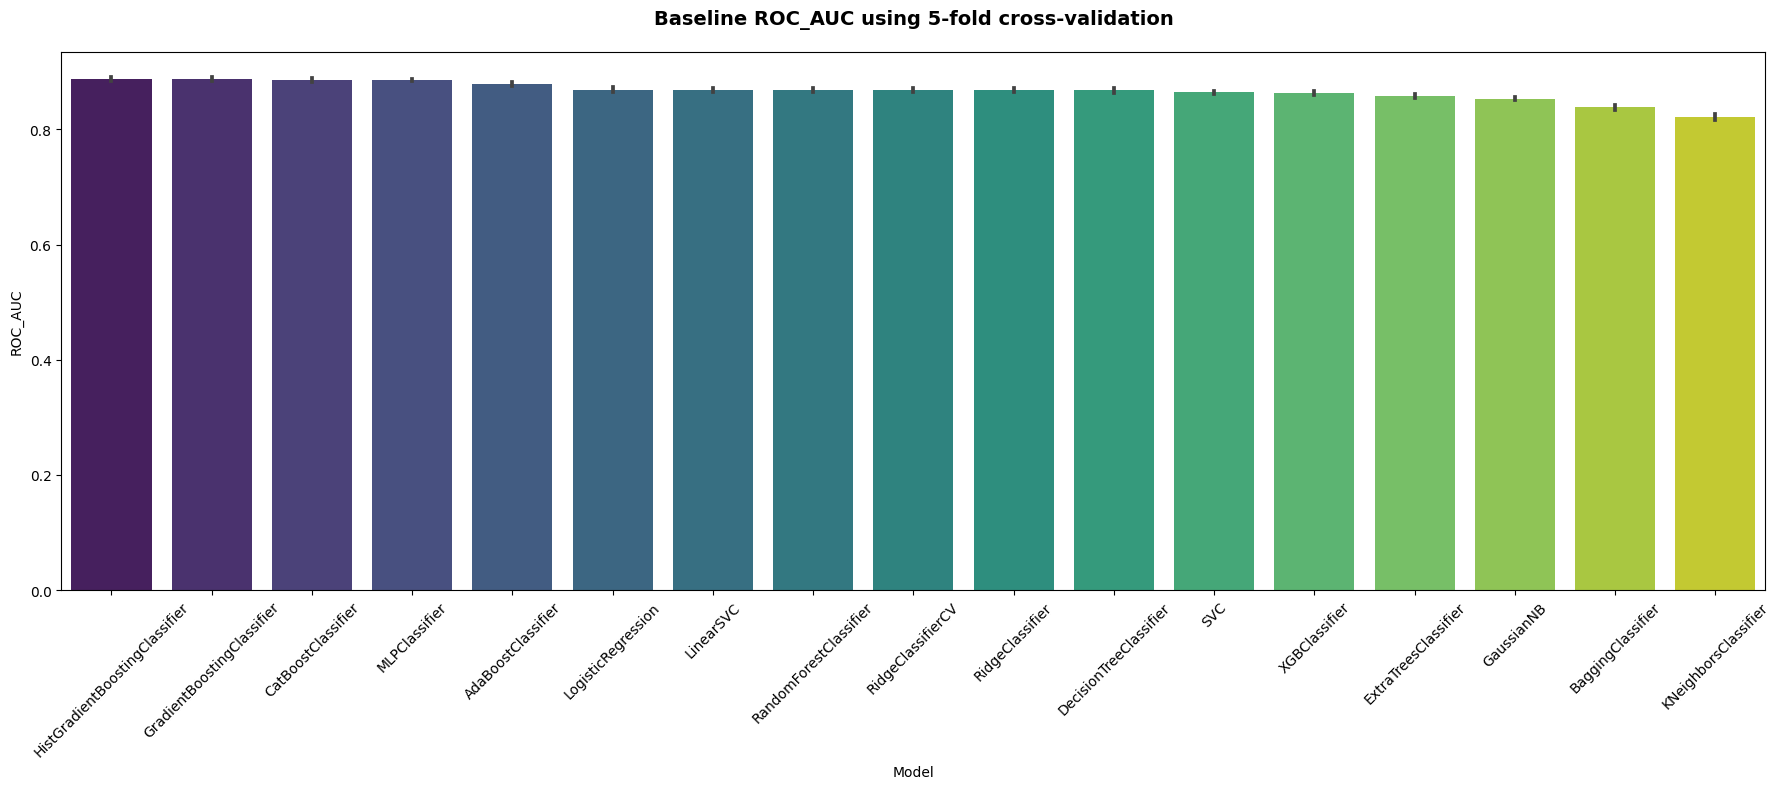

Mean       Std  N
model_name                                           
HistGradientBoostingClassifier  0.887435  0.002811  5
GradientBoostingClassifier      0.887321  0.002826  5
CatBoostClassifier              0.886228  0.003094  5
MLPClassifier                   0.885836  0.002404  5
AdaBoostClassifier              0.878429  0.003352  5
LogisticRegression              0.869023  0.003737  5
LinearSVC                       0.868836  0.003817  5
RandomForestClassifier          0.867988  0.003245  5
RidgeClassifierCV               0.867958  0.003867  5
RidgeClassifier                 0.867957  0.003867  5
DecisionTreeClassifier          0.867636  0.003672  5
SVC                             0.864491  0.002475  5
XGBClassifier                   0.863928  0.003446  5
ExtraTreesClassifier            0.857210  0.003455  5
GaussianNB                      0.853388  0.003146  5
BaggingClassifier               0.838281  0.004833  5
KNeighborsClassifier            0.821612  0.004535  5

In [70]:
def generate_baseline_results(models=models, X=df_train_new_prepared, y=df_train_label_new,
                              metric="roc_auc", cv=kfold, plot_result=False):
    entries = []
    for model in models:
        model_name = getattr(model, "name", model.__class__.__name__)
        scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, s in enumerate(scores, start=1):
            entries.append((model_name, fold_idx, s))

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "score"])

    summary = (cv_df.groupby("model_name")["score"]
                    .agg(Mean="mean", Std="std", N="size")
                    .sort_values("Mean", ascending=False))

    if plot_result:
        order = summary.index.tolist()
        plt.figure(figsize=(18, 8))
        sns.barplot(data=cv_df, x="model_name", y="score", order=order, errorbar=("sd"), palette="viridis")
        title_metric = metric.upper() if isinstance(metric, str) else "Score"
        nfolds = getattr(cv, "n_splits", "CV")
        plt.title(f"Baseline {title_metric} using {nfolds}-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model"); plt.ylabel(title_metric)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    return summary

generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #2e7d32; 
    padding: 20px; 
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [71]:
def shap_plot(model, X_test, list_feature, type = None):
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [72]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)

    # Plot 1
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", fontsize=14, weight="bold", pad=20)
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve", fontsize=14, weight="bold", pad=20)
    ax[1, 0].legend()

    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))
    return rocScore

In [73]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    rocScore = plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)
    return rocScore

In [74]:
X_val = start_test_set.drop("Exited", axis=1)
y_val = start_test_set["Exited"].copy()
X_val_prepared = preprocessor.transform(X_val)

## Class Imbalance Handling

- The dataset has ~80% 'Not Churned' in the target, so models may be biased toward the majority class.
- To mitigate this, we explicitly calculate a **`scale_pos_weight`** to emphasize the minority class (Introverts) during training:

**Breakdown of Class Imbalance Calculation**

| Line                                   | What It Does     | Why It's Useful                      |
| -------------------------------------- | ---------------- | ------------------------------------ |
| `class_1 = df_train_label_new.sum()`                    | Count of class 1 | Needed for imbalance calculation     |
| `class_0 = len(df_train_label_new) - class_1`           | Count of class 0 | Complement of class 1                |
| `scale_pos_weight = class_0 / class_1` | Weight factor    | Penalizes minority class errors more |

**Class Imbalance Strategies by Model**

- We instantiate five high-performance gradient boosting models, each tuned using Optuna and configured to handle class imbalance natively.

| Model                            | Class Imbalance Handling                   |
| -------------------------------- | ------------------------------------------ |
| `CatBoostClassifier`             | `class_weights={1: scale_pos_weight}`       |
| `LGBMClassifier`          | `class_weight={0: 1, 1: scale_pos_weight}` |
| `XGBClassifier`           | `scale_pos_weight=scale_pos_weight`        |
| `HistGradientBoostingClassifier` | `class_weight="balanced"`                  |

- These configurations ensure that each model gives proportional attention to both personality classes.

## CatBoostClassifier

In [75]:
param_cb = {
"bootstrap_type": "Bernoulli",
"colsample_bylevel": 0.7658926065030167,
"iterations": 1984,
"depth": 5,
"learning_rate": 0.015171349611571652,
"l2_leaf_reg": 1.337578073889382,
"min_data_in_leaf": 76,
"subsample": 0.7280698256173038,
"eval_metric": "AUC",
"class_weights": [1, scale_pos_weight],
"verbose": False,
"random_seed": seed,
"loss_function": "Logloss",
"allow_writing_files": False
}

model_cb = CatBoostClassifier(**param_cb)
model_cb

Evaluating CatBoostClassifier...


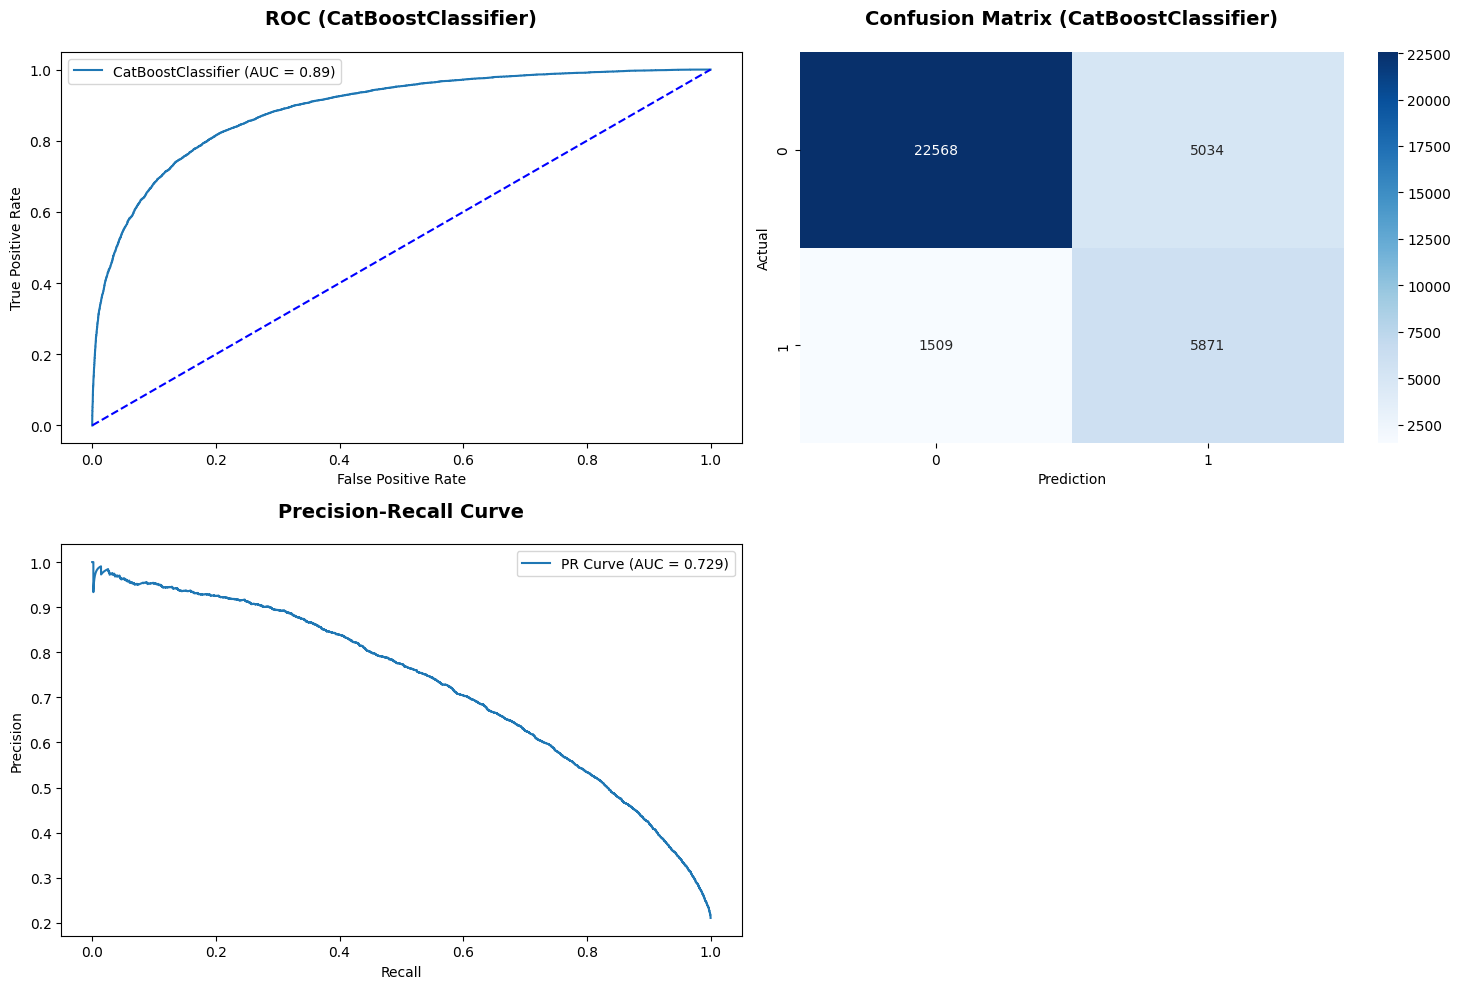

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     27602
           1       0.54      0.80      0.64      7380

    accuracy                           0.81     34982
   macro avg       0.74      0.81      0.76     34982
weighted avg       0.85      0.81      0.82     34982



In [76]:
rocScore_cat = evaluate_model(model = model_cb, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## XGBClassifier

In [77]:
param_xgb = {
"n_estimators": 1637,
"learning_rate": 0.013448370696239944,
"max_depth": 5,
"min_child_weight": 0.03159892617906292,
"subsample": 0.7185805327584004,
"colsample_bytree": 0.6611176553575923,
"gamma": 5.256647828620208,
"reg_alpha": 1.8881089265623683e-07,
"reg_lambda": 3.3879565314300123e-07,
"n_jobs": -1,
"random_state": seed,
"scale_pos_weight": scale_pos_weight,
"objective": "binary:logistic",
"eval_metric": "auc"
}

model_xgb = XGBClassifier(**param_xgb)
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6611176553575923, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=5.256647828620208,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.013448370696239944,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=0.03159892617906292, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1637,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

Evaluating XGBClassifier...


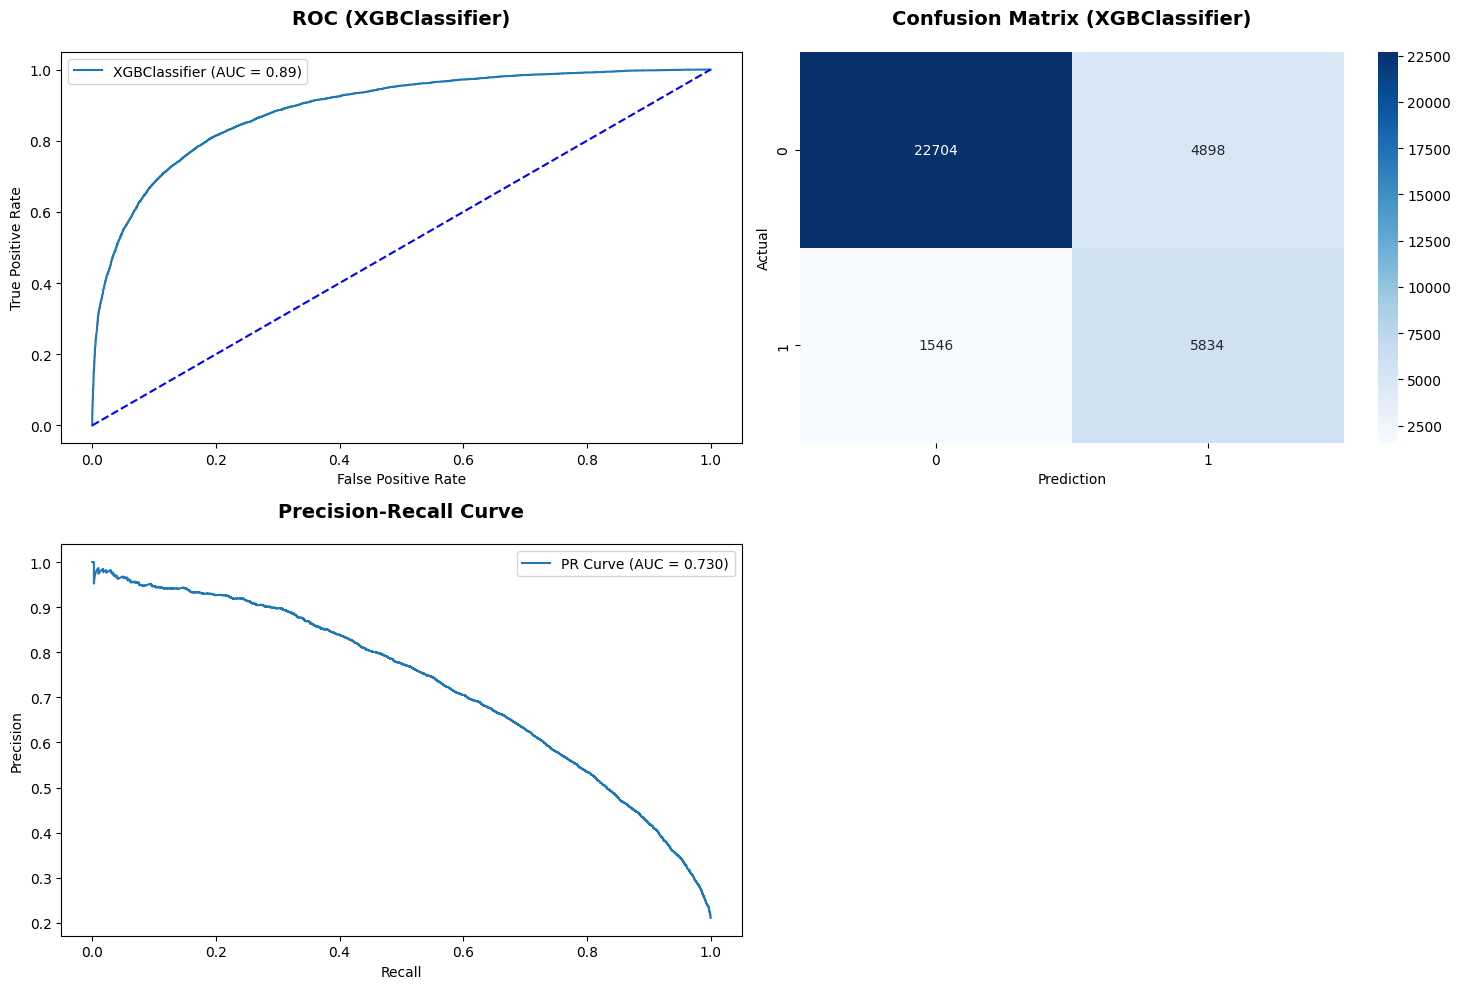

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     27602
           1       0.54      0.79      0.64      7380

    accuracy                           0.82     34982
   macro avg       0.74      0.81      0.76     34982
weighted avg       0.85      0.82      0.83     34982



In [78]:
rocScore_xgb = evaluate_model(model = model_xgb, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## LGBMClassifier

In [79]:
from lightgbm import LGBMClassifier

param_lgbm = {
"n_estimators": 1530,
"learning_rate": 0.0030804807162494864,
"num_leaves": 345,
"max_depth": 5,
"min_child_samples": 62,
"min_split_gain": 0.6369464169580782,
"feature_fraction": 0.7846216887053435,
"bagging_fraction": 0.7647361784813704,
"reg_alpha": 0.3212093236745268,
"reg_lambda": 0.0006563052961663804,
"max_bin": 243,
"bagging_freq": 7,
"objective": "binary",
"metric": "AUC",
"random_state": seed,
"n_jobs": -1,
"verbosity": -1
}

model_lgbm = LGBMClassifier(**param_lgbm)
model_lgbm

LGBMClassifier(bagging_fraction=0.7647361784813704, bagging_freq=7,
               feature_fraction=0.7846216887053435,
               learning_rate=0.0030804807162494864, max_bin=243, max_depth=5,
               metric='AUC', min_child_samples=62,
               min_split_gain=0.6369464169580782, n_estimators=1530, n_jobs=-1,
               num_leaves=345, objective='binary', random_state=42,
               reg_alpha=0.3212093236745268, reg_lambda=0.0006563052961663804,
               verbosity=-1)

Evaluating LGBMClassifier...


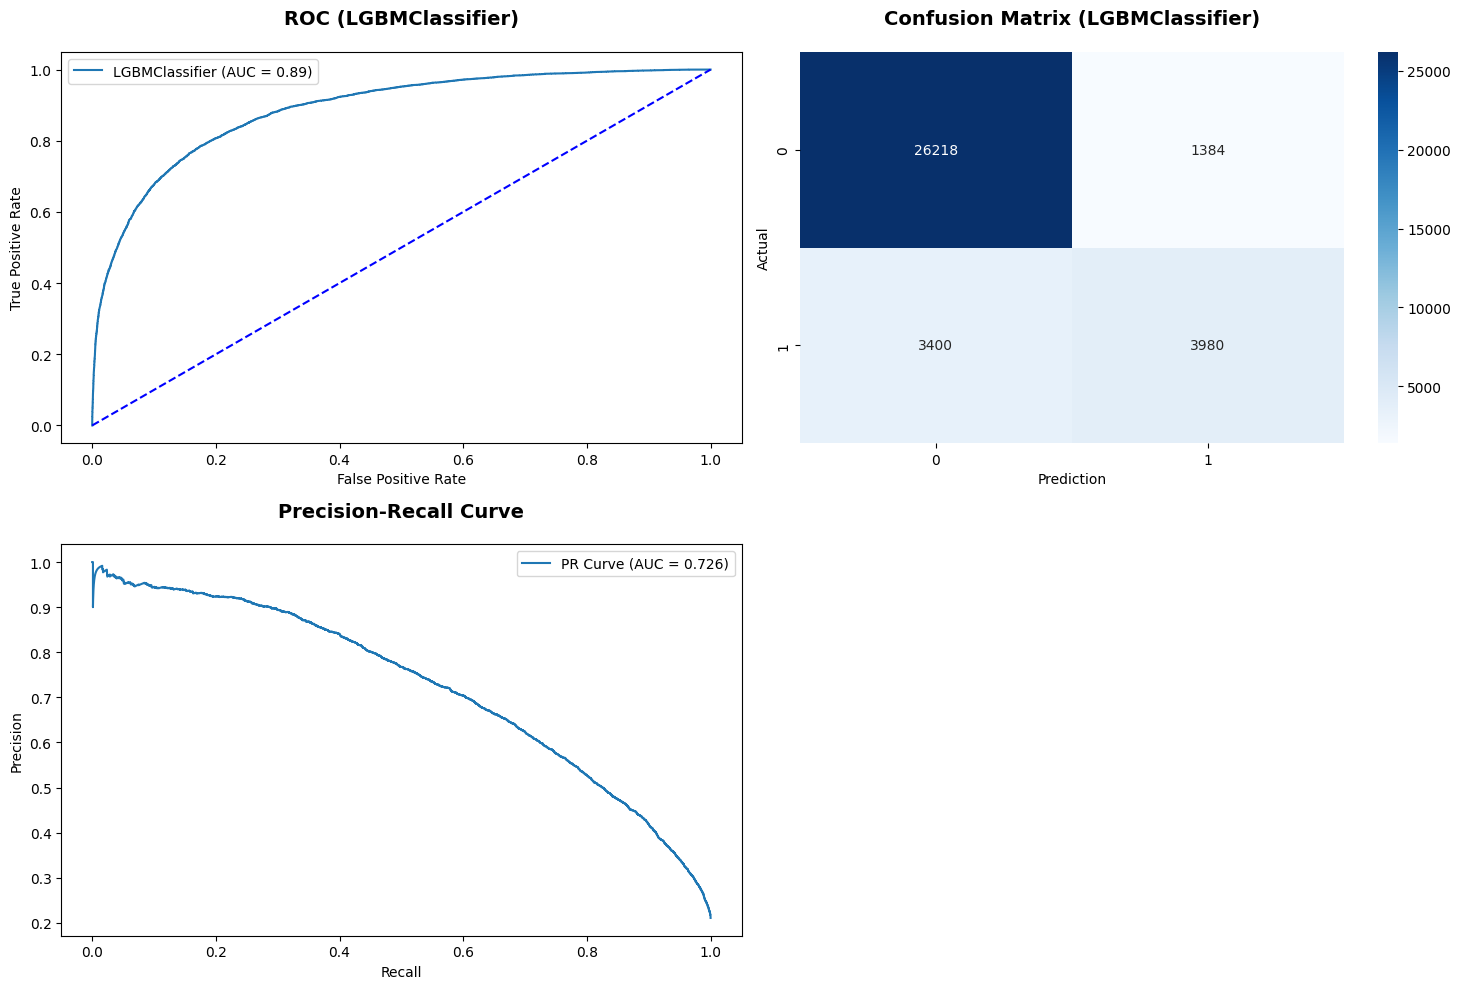

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     27602
           1       0.74      0.54      0.62      7380

    accuracy                           0.86     34982
   macro avg       0.81      0.74      0.77     34982
weighted avg       0.85      0.86      0.85     34982



In [80]:
rocScore_lgbm = evaluate_model(model = model_lgbm, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

## HistGradientBoostingClassifier

In [81]:
from sklearn.ensemble import HistGradientBoostingClassifier

param_hgb = {
"learning_rate": 0.0323356329876002,
"max_iter": max_iter,
"max_leaf_nodes": 15,
"min_samples_leaf": 254,
"l2_regularization": 0.00011009865934208523,
"max_bins": 117,
"early_stopping": True,
"validation_fraction": 0.1,
"random_state": seed,
"verbose": 0,
"class_weight": "balanced",
"loss": "log_loss"
}

model_hgb = HistGradientBoostingClassifier(**param_hgb)
model_hgb

HistGradientBoostingClassifier(class_weight='balanced', early_stopping=True,
                               l2_regularization=0.00011009865934208523,
                               learning_rate=0.0323356329876002, max_bins=117,
                               max_iter=50000, max_leaf_nodes=15,
                               min_samples_leaf=254, random_state=42)

Evaluating HistGradientBoostingClassifier...


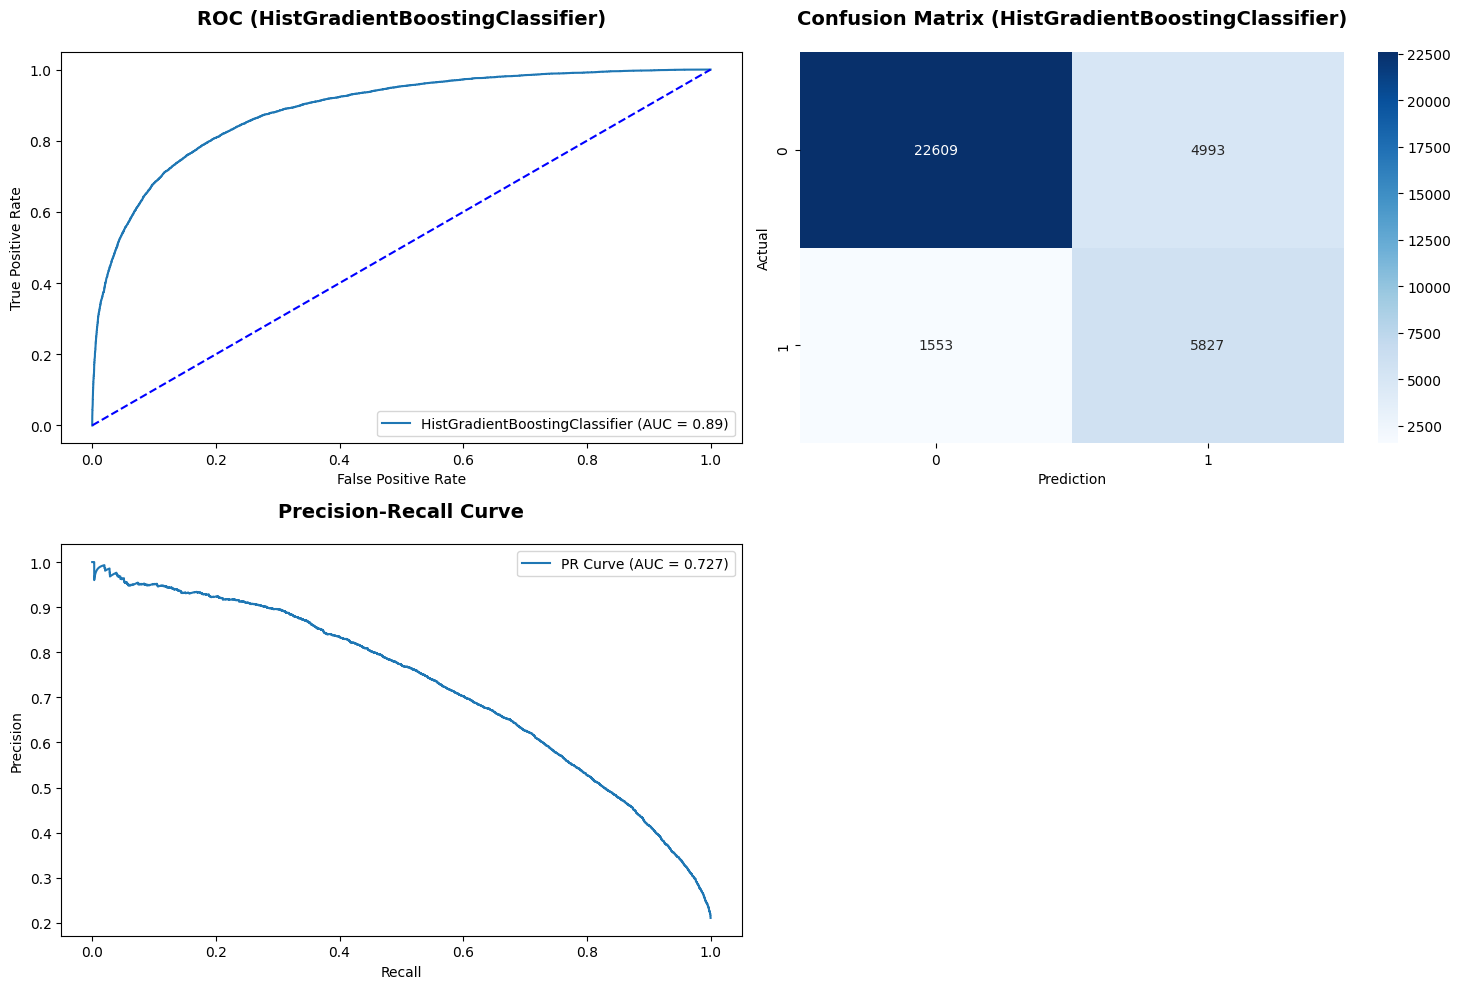

              precision    recall  f1-score   support

           0       0.94      0.82      0.87     27602
           1       0.54      0.79      0.64      7380

    accuracy                           0.81     34982
   macro avg       0.74      0.80      0.76     34982
weighted avg       0.85      0.81      0.82     34982



In [82]:
rocScore_hgb = evaluate_model(model = model_hgb, X_train=df_train_new_prepared, X_val=X_val_prepared,
                               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Prepare Final Submission File
    </h1>
</div>

In [83]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ("cb", model_cb),
        ("xgb", model_xgb),
        ("lgbm", model_lgbm),
        ("hgb", model_hgb)
    ],
    voting="soft",
    weights=[rocScore_cat, rocScore_xgb, rocScore_lgbm, rocScore_hgb],
    n_jobs=-1
)

In [84]:
df_test_prepared = preprocessor.transform(processed_test_df)

Evaluating VotingClassifier...


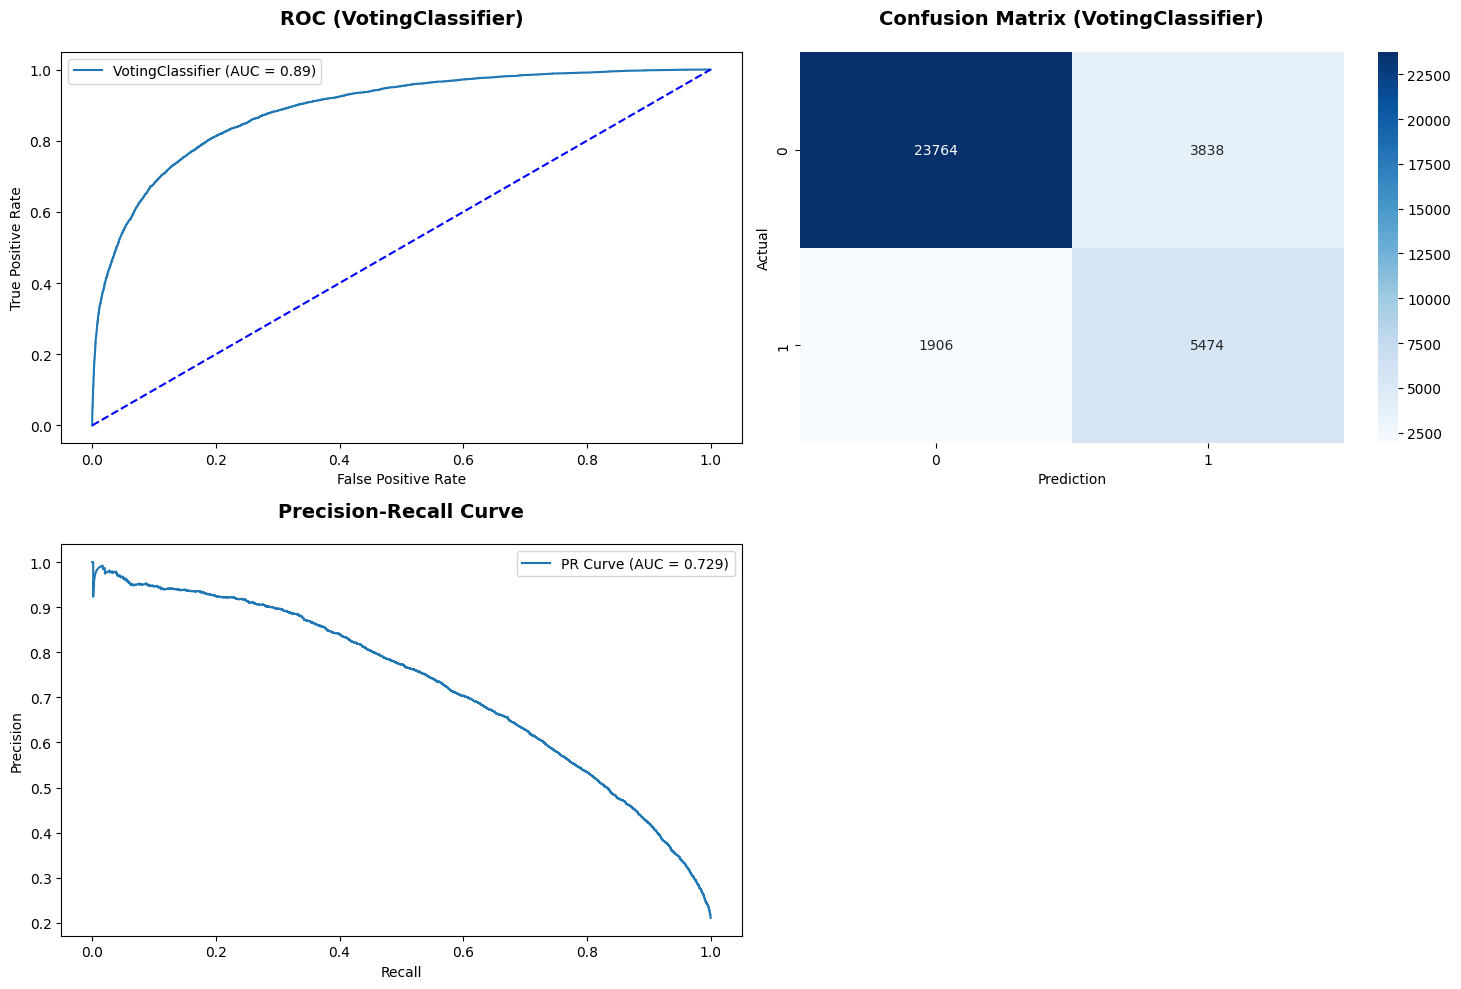

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     27602
           1       0.59      0.74      0.66      7380

    accuracy                           0.84     34982
   macro avg       0.76      0.80      0.77     34982
weighted avg       0.85      0.84      0.84     34982



In [85]:
rocScore_vc = evaluate_model(model = voting_clf_soft, X_train=df_train_new_prepared, X_val=X_val_prepared,
               y_train=df_train_label_new, y_val=y_val, figsize=(15, 10))

In [86]:
# Generate predicted probabilities for the test set
y_pred_test_prob_cat = voting_clf_soft.predict_proba(df_test_prepared)
exited = y_pred_test_prob_cat[:, 1]

# Prepare submission file
submission = pd.DataFrame({
    "id": df_test.index,
    "Exited": exited
})

submission.to_csv("submission.csv", index=False)
print("\nSubmission file saved!")
submission.head()


Submission file saved!


id    Exited
0  165034  0.075762
1  165035  0.907526
2  165036  0.080206
3  165037  0.484062
4  165038  0.579201

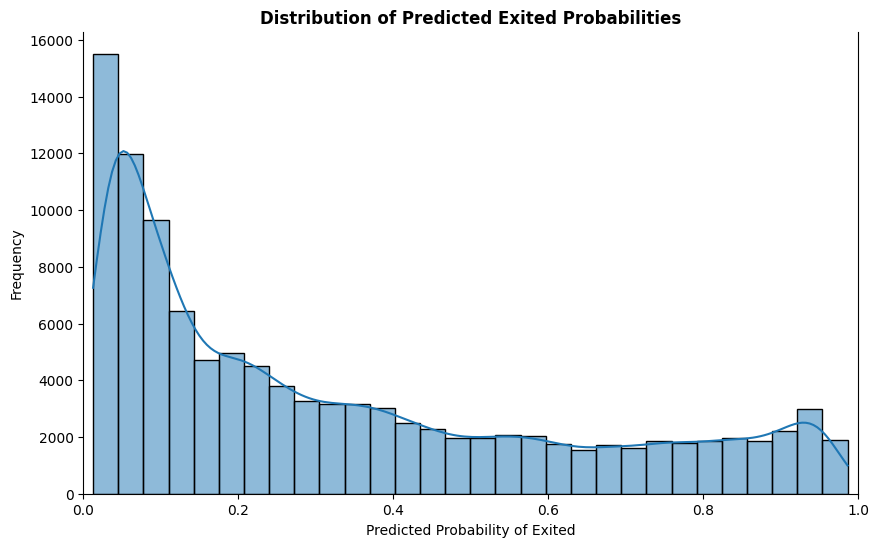

In [87]:
# Plot distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(exited, bins=30, kde=True)
plt.title("Distribution of Predicted Exited Probabilities", weight="bold")
plt.xlabel("Predicted Probability of Exited")
sns.despine(left=False, bottom=False, right=False)
plt.ylabel("Frequency")
plt.xlim(0, 1)  # Limit x-axis to [0, 1]
plt.show()

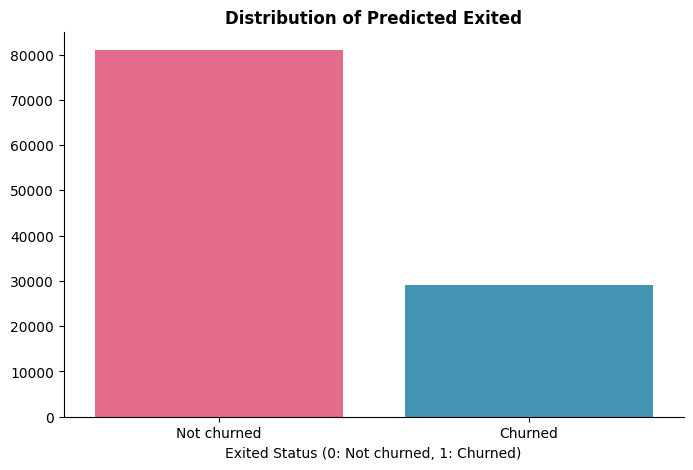

In [88]:
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
binary_predictions = (exited > 0.5).astype(int)

# Plot distribution of binary predictions
plt.figure(figsize=(8, 5))
sns.countplot(x=binary_predictions.flatten(), palette= color(n_colors=2))
plt.title("Distribution of Predicted Exited", weight="bold")
plt.xlabel("Exited Status (0: Not churned, 1: Churned)")
plt.ylabel("")
sns.despine(left=False, bottom=False)
plt.xticks(ticks=[0, 1], labels=["Not churned", "Churned"])
plt.show()

PermutationExplainer explainer: 201it [09:58,  3.01s/it]


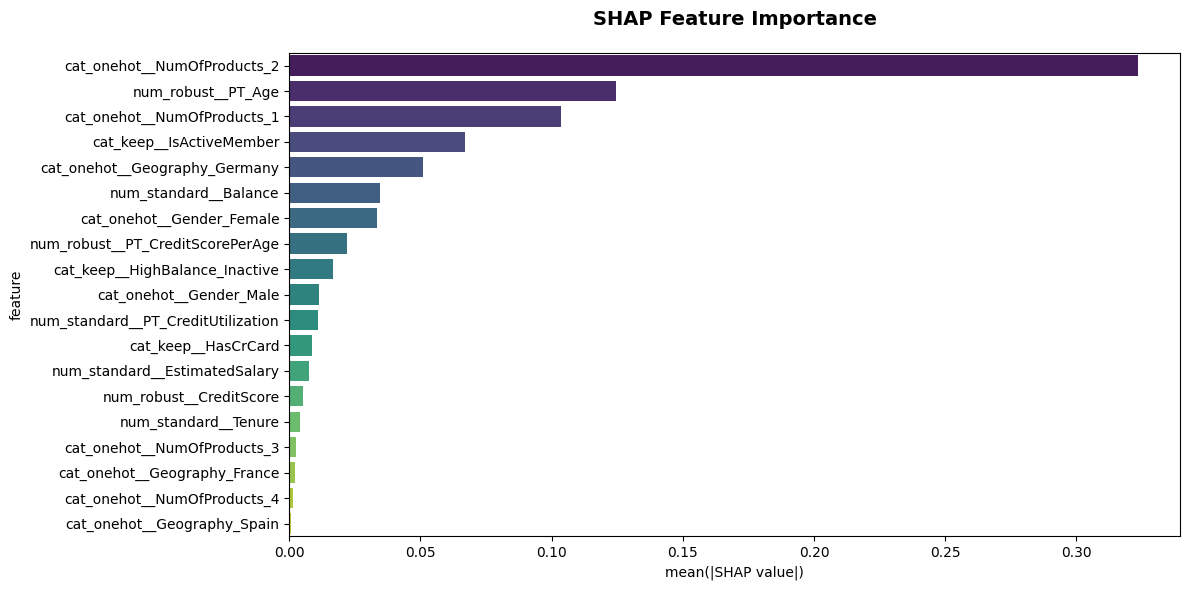

In [89]:
shap_plot(model=voting_clf_soft, X_test=df_test_prepared[:200], list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 201it [09:55,  3.02s/it]


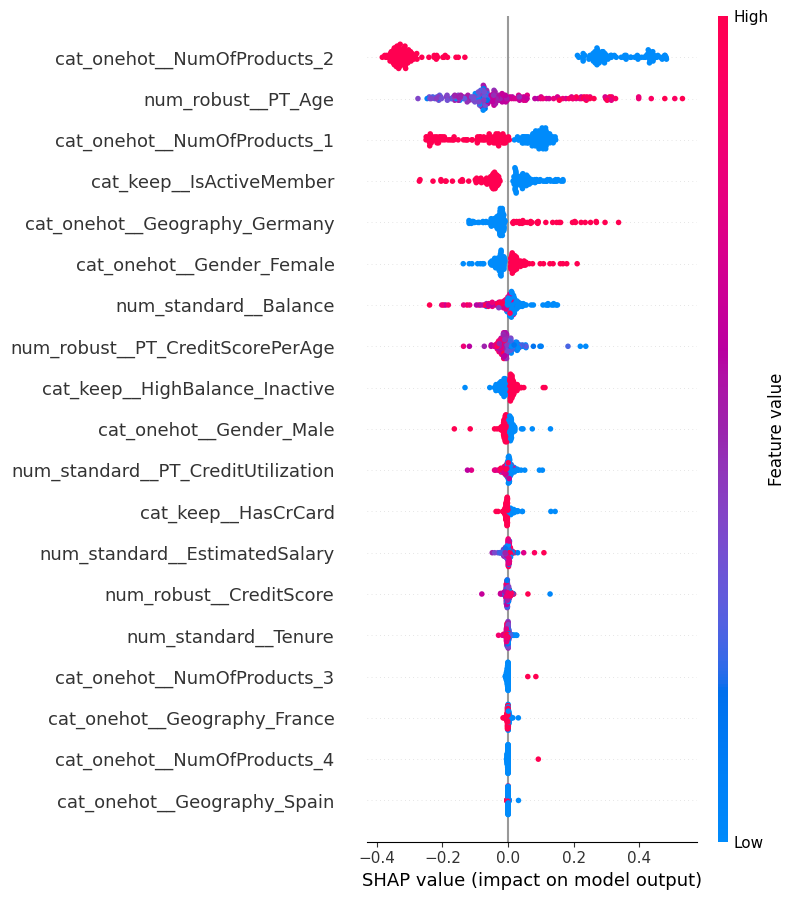

In [90]:
shap_plot(model=voting_clf_soft, X_test=df_test_prepared[:200], list_feature=list_feature_prepared)

**Most important features**

From top to bottom — decreasing influence:

1. **cat\_onehot\_\_NumOfProducts\_2**

   * High values (red) → negative SHAP → reduce churn.
   * Low values (blue, meaning the customer doesn’t have 2 products) → positive SHAP → increase churn.
   * Meaning: Customers with **2 products** are less likely to leave.

2. **num\_robust\_\_PT\_Age**

   * Older customers (red) → positive SHAP → more likely to churn.
   * Younger customers (blue) → negative SHAP → less likely to churn.
   * Meaning: Older customers have a higher risk of leaving.

3. **cat\_onehot\_\_NumOfProducts\_1**

   * High values (red) → positive SHAP → increase churn.
   * Meaning: Customers with **only 1 product** are at higher churn risk.

4. **cat\_keep\_\_IsActiveMember**

   * Active (red) → negative SHAP → reduce churn.
   * Inactive (blue) → positive SHAP → increase churn.
   * Meaning: Inactive customers are more likely to leave.

5. **cat\_onehot\_\_Geography\_Germany**

   * Located in Germany (red) → positive SHAP → higher churn risk.
   * Other locations → different impacts.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 10px;
        font-size: 36px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>

**Business insights**

* **Cross-sell additional products**: Moving customers from 1 product to 2 products can reduce churn.
* **Focus on older customer retention**: Improve experience, offer personalized perks.
* **Increase customer activity**: Run campaigns to encourage transactions, logins, and online service usage.
* **Monitor German customers**: Possibly due to competitive landscape or product fit — further investigation needed.
* **Balance** and **Credit Utilization ratio** show moderate impact but are still worth tracking.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #2e7d32;
    padding: 20px;
    background: linear-gradient(125deg, #1b5e20 5%, #43a047 40%, #81c784 75%, #c8e6c9 100%);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
